### SETUP

Using *Python* and *R* in the same notebook.

In [1]:
import os
import subprocess

# Auto-detect R_HOME for Homebrew R installation
if 'R_HOME' not in os.environ:
    try:
        r_home = subprocess.check_output(['R', 'RHOME'], stderr=subprocess.DEVNULL).decode().strip()
        os.environ['R_HOME'] = r_home
    except Exception:
        pass

%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Error importing in API mode: ImportError("dlopen(/Users/wongpeiting/.pyenv/versions/3.13.9/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <B96A8100-FA7A-3EFC-8726-931D26646DE6> /Users/wongpeiting/.pyenv/versions/3.13.9/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Loading CLEANED CSV into a DataFrame

df = pd.read_csv('factually_pofma_cleaned.csv')
df

year        date                                              title  \
0    2025  2025-11-15  Corrections regarding false statements concern...   
1    2025  2025-09-22  Corrections regarding false statements of fact...   
2    2025  2025-09-07  Corrections regarding false statements of fact...   
3    2025  2025-09-01  Corrections regarding false statements by Samm...   
4    2025  2025-05-20  What are CPF monies invested in, and how are C...   
..    ...         ...                                                ...   
119  2018  2018-09-16  Does our Prime Minister get paid up to $4.5 mi...   
120  2018  2018-08-27  Are more foreigners taking away jobs of Singap...   
121  2018  2018-07-31  Will the Government take back unused MediSave ...   
122  2018  2018-03-31  Singapore's national reserves: Is the Governme...   
123  2018  2018-01-26  Is it true that over 60% of foreign domestic w...   

                                               summary  \
0    MalaysiaNow had communicated falsehoods concer...   
1    Mr Nicholas Tan communicated multiple false st...   
2    Mr Jay Ish'haq Rajoo communicated false statem...   
3    Mr Sammy Obeid communicated false statements o...   
4    Your CPF savings are invested by the CPF Board...   
..                                                 ...   
119  Factually addresses inaccurate reports on Mini...   
120  Ministry of Manpower responds to this, and oth...   
121  All MediSave top-ups will remain in citizens' ...   
122  We need to be ready to deal with unforeseen ev...   
123  No. In fact, 97% have no issues with their wor...   

                                              item_url  \
0    https://www.factually.gov.sg/corrections-and-c...   
1    https://www.factually.gov.sg/corrections-and-c...   
2    https://www.factually.gov.sg/corrections-and-c...   
3    https://www.factually.gov.sg/corrections-and-c...   
4    https://www.factually.gov.sg/corrections-and-c...   
..                                                 ...   
119  https://www.factually.gov.sg/corrections-and-c...   
120  https://www.factually.gov.sg/corrections-and-c...   
121  https://www.factually.gov.sg/corrections-and-c...   
122  https://www.factually.gov.sg/corrections-and-c...   
123  https://www.factually.gov.sg/corrections-and-c...   

                                          article_text         x         y  \
0    The Ministry of Home Affairs ('\nMHA') is ...  6.391808  7.503935   
1    On 9, 15 and 16 September 2025, Mr Tan publish...  3.688610  7.760333   
2    1.     Mr Jay Ish'haq Rajoo ('\nMr Jay')...  3.556241  7.195791   
3    Mr Obeid published posts on Facebook, Instagra...  4.486822  7.450564   
4    What are CPF monies invested in, and how are C...  0.773272  6.262873   
..                                                 ...       ...       ...   
119  Falsehoods:\nFalsehood #1\n:\nThe Government i...  1.940370  6.299668   
120  A recent article by the States Times Review (S...  2.202028  4.902183   
121  [Updated as of April 2025]\nA voice recording ...  1.126913  6.838263   
122  There have been suggestions that the Governmen...  0.667028  6.057231   
123  A survey published in Nov 2017 claimed that ov...  2.108826  4.500477   

     cluster                                          topic  \
0          3                  Justice (Read: Death Penalty)   
1          5          Governance (Read: Election, Policies)   
2          5          Governance (Read: Election, Policies)   
3          5          Governance (Read: Election, Policies)   
4          6                 Finance (Read: CPF & Reserves)   
..       ...                                            ...   
119        6                 Finance (Read: CPF & Reserves)   
120        2  Employment (Read: Cost of Living, Foreigners)   
121        6                 Finance (Read: CPF & Reserves)   
122        6                 Finance (Read: CPF & Reserves)   
123        2  Employment (Read: Cost of Living, Foreigners)   

    

### Let's plot

In [4]:
%%R
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
%%R
# ============================================================================
# SETUP CONSTANTS - Define all key values ONCE to ensure consistency
# ============================================================================

# Election dates for Singapore's General Elections
ge2020 <- as.Date("2020-07-10")  # GE2020 polling day
ge2025 <- as.Date("2025-05-03")  # GE2025 polling day

# Analysis parameters
WINDOW_DAYS <- 60  # Standard window size for pre-election analysis (60 days before each election)
ANALYSIS_END_DATE <- as.Date("2026-02-09")  # End date of data collection

# Why 60 days? This captures the official campaign period (~9 days) plus the 
# run-up period when political attention intensifies. It's also a commonly 
# used window in election studies.

In [125]:
%%R -i df
# ============================================================================
# DATA PREPARATION - All transformations done ONCE to avoid redundancy
# ============================================================================

# Load ggbeeswarm for improved dot plots (prevents overlap, shows true density)
# install.packages("ggbeeswarm")  # Uncomment if not installed
library(ggbeeswarm)

# --- Date conversion ---
df$date <- as.Date(df$date)

# --- Topic merging ---
# Merge "Political Opposition" and "Governance" into "Politics & Governance"
# This consolidation reflects that both categories deal with political matters
# and provides more robust sample sizes for analysis
df <- df %>%
  mutate(
    new_topic_merged = case_when(
      new_topic %in% c("Political Opposition", "Governance") ~ "Politics & Governance",
      TRUE ~ as.character(new_topic)
    )
  )

# --- Pre-election flags ---
# Flag articles published in the 60-day window before either election
df <- df %>%
  mutate(
    before_ge = (date >= ge2020 - WINDOW_DAYS & date < ge2020) |
                (date >= ge2025 - WINDOW_DAYS & date < ge2025),
    
    # Broader 60-day election window (used for some analyses)
    election_window = case_when(
      date >= ge2020 - WINDOW_DAYS & date < ge2020 ~ "GE2020",
      date >= ge2025 - WINDOW_DAYS & date < ge2025 ~ "GE2025",
      TRUE ~ "Baseline"
    )
  )

# --- Days-to-election calculation ---
# Calculate distance to the CLOSEST election (past or future)
df <- df %>%
  mutate(
    days_to_election = pmin(
      abs(as.numeric(ge2020 - date)),
      abs(as.numeric(ge2025 - date))
    )
  )

# --- POFMA flags ---
# Identify articles with formal POFMA correction orders vs. general explainers
df <- df %>%
  mutate(
    has_pofma_order = (pofma_ed == "Yes"),  # TRUE if article has a POFMA order
    no_pofma = (pofma_ed == "No"),
    pofma_label = ifelse(pofma_ed == "Yes", "Correction (tied to POFMA order)", "Explainer or clarification (no POFMA order)")           # TRUE if article is just an explainer/clarification
  )

# --- Time calculations for rate-based analysis ---
# These are crucial for calculating "articles per day" rates
total_days <- as.numeric(ANALYSIS_END_DATE - min(df$date))  # Total span of data
before_days <- WINDOW_DAYS * 2  # Two elections × 60 days = 120 pre-election days
baseline_days <- total_days - before_days  # Days NOT in pre-election windows

# Calculate baseline probability of being in pre-election window
# This is the "expected" share if articles were randomly distributed
baseline_probability <- before_days / total_days

# Print summary for reference
cat("=== DATA PREPARATION SUMMARY ===\n")
cat("Total articles:", nrow(df), "\n")
cat("Date range:", as.character(min(df$date)), "to", as.character(max(df$date)), "\n")
cat("Analysis end date:", as.character(ANALYSIS_END_DATE), "\n")
cat("Total days in dataset:", total_days, "\n")
cat("Pre-election window days:", before_days, "(", round(before_days/total_days*100, 1), "% of timeline)\n")
cat("Baseline days:", baseline_days, "\n")
cat("\nArticles by topic:\n")
print(table(df$new_topic_merged))
cat("\nArticles in pre-election windows:", sum(df$before_ge), "\n")
cat("Articles with POFMA orders:", sum(df$has_pofma_order), "\n")

=== DATA PREPARATION SUMMARY ===
Total articles: 124 
Date range: 2018-01-26 to 2025-11-15 
Analysis end date: 2026-02-09 
Total days in dataset: 2936 
Pre-election window days: 120 ( 4.1 % of timeline)
Baseline days: 2816 

Articles by topic:

       Cost of Living      Criminal Justice       Election Claims 
                   20                    19                     8 
               Health               Housing     National Reserves 
                   19                     8                    20 
Politics & Governance 
                   30 

Articles in pre-election windows: 20 
Articles with POFMA orders: 85 


# Timeline dot plot

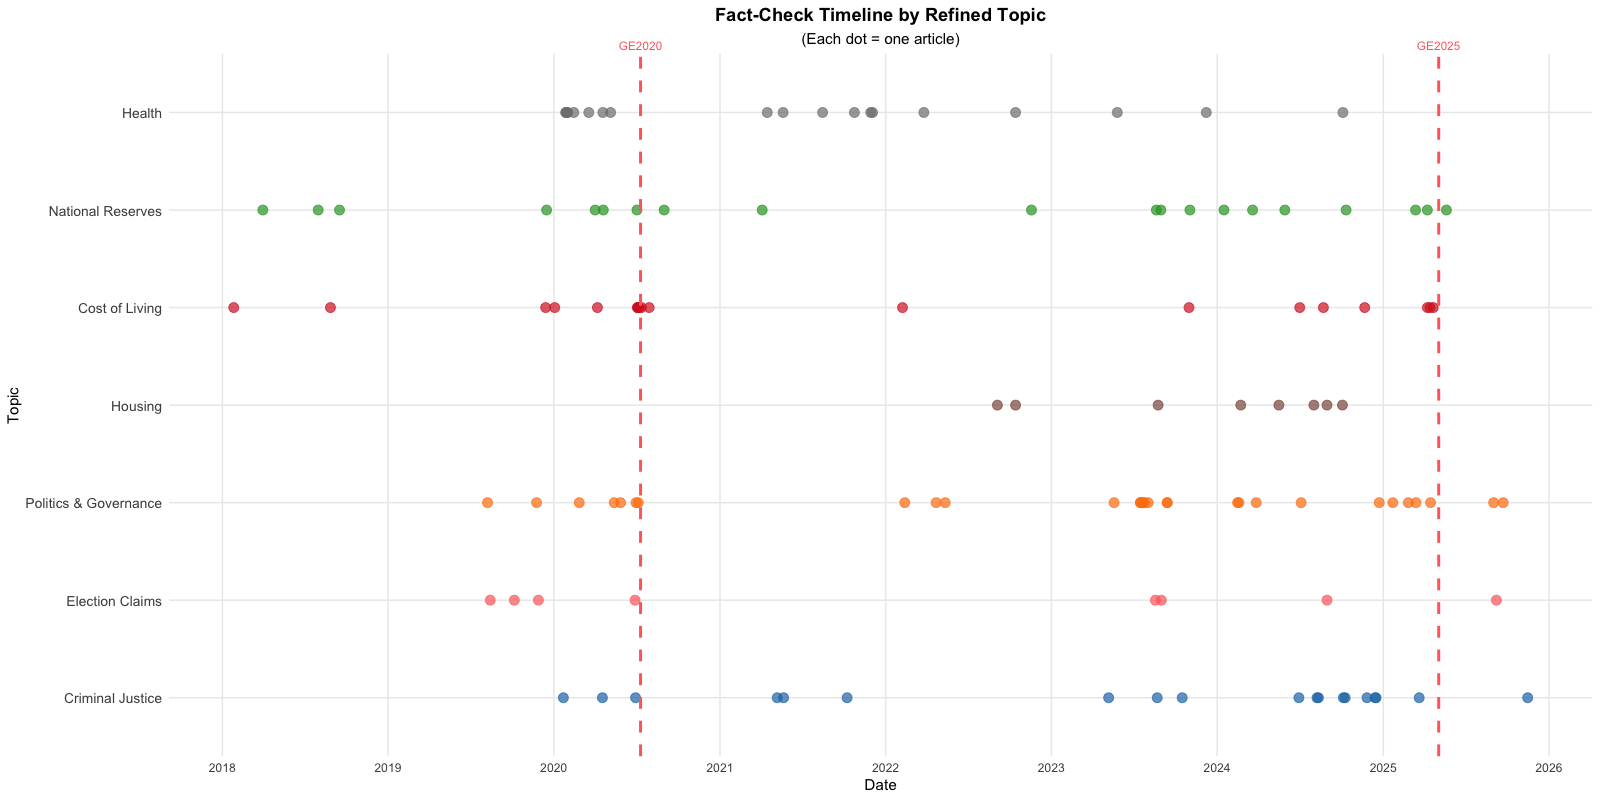

In [7]:
%%R -w 16 -h 8 --units in -r 100
# ============================================================================
# TIMELINE DOT PLOT - Initial visualization of all articles by topic and date
# ============================================================================
# This plot gives a first look at the temporal distribution of fact-checks.
# Already you can see clustering around the election dates (dashed lines).

# Define topic order (bottom to top) - controls y-axis ordering
topic_order <- c(
  "Criminal Justice",
  "Election Claims", 
  "Politics & Governance",
  "Housing",
  "Cost of Living",
  "National Reserves",
  "Health"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)

# Define colors for each topic - consistent palette throughout analysis
topic_colors <- c(
  "Health" = "#7f7f7f",
  "National Reserves" = "#2ca02c",
  "Cost of Living" = "#d62728",
  "Housing" = "#8c564b",
  "Politics & Governance" = "#ff7f0e",
  "Election Claims" = "#ff6b6b",
  "Criminal Justice" = "#1f77b4"
)

# Create the plot
# Note: ge2020 and ge2025 are defined in the setup-constants cell
ggplot(df, aes(x = date, y = new_topic_merged, color = new_topic_merged)) +
  geom_point(size = 3, alpha = 0.7) +
  # Add vertical lines at election dates
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "#ff6b6b", linewidth = 1) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "#ff6b6b", linewidth = 1) +
  # Label the election lines
  annotate("text", x = ge2020, y = Inf, label = "GE2020", vjust = -0.5, color = "#ff6b6b", size = 3) +
  annotate("text", x = ge2025, y = Inf, label = "GE2025", vjust = -0.5, color = "#ff6b6b", size = 3) +
  scale_color_manual(values = topic_colors) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  labs(
    title = "Fact-Check Timeline by Refined Topic",
    subtitle = "(Each dot = one article)",
    x = "Date",
    y = "Topic"
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5),
    panel.grid.minor = element_blank(),
    axis.text.y = element_text(size = 10)
  ) +
  coord_cartesian(clip = "off")

## Are my eyes tricking me that dots cluster around election season?

In [8]:
%%R # Making sure this is not driven by one election

df %>%
  mutate(
    before_bucket = case_when(
      date >= ge2020 - 60 & date < ge2020 ~ "GE2020",
      date >= ge2025 - 60 & date < ge2025 ~ "GE2025",
      TRUE ~ "Other"
    )
  ) %>%
  count(before_bucket)

# INTERPRETING RESULT: The effect is NOT driven by a single election.
# 👉 Both elections show elevated activity.

  before_bucket   n
1        GE2020  12
2        GE2025   8
3         Other 104


In [9]:
%%R 
# ============================================================================
# CHI-SQUARE TEST - Is the pre-election clustering statistically significant?
# ============================================================================
# If articles were randomly distributed across time, proportional to how many 
# days exist in each condition, would we see counts this extreme?

observed <- df %>% count(before_ge) %>% pull(n)

# Expected probabilities based on time exposure
# baseline_days = days NOT in pre-election windows
# before_days = days IN pre-election windows (120 total)
expected_probs <- c(
  baseline_days / total_days,   # FALSE first (outside windows)
  before_days / total_days      # TRUE second (inside windows)
)

chisq.test(observed, p = expected_probs)

# INTERPRETATION: 
# - p-value << 0.05 means we can reject the null hypothesis
# - Under "random timing" assumption, this outcome is extraordinarily unlikely
# - You can safely reject the idea that this is just calendar noise
# - This is the minimum bar for claiming a patterned temporal effect


	Chi-squared test for given probabilities

data:  observed
X-squared = 45.868, df = 1, p-value = 1.265e-11



In [10]:
%%R # Calculate the effect size

before_share <- observed[2] / sum(observed)
expected_share <- before_days / total_days

lift <- before_share / expected_share
lift

# The pre-election window contains 3.9× more articles than we would expect if publication were evenly distributed across time.
# That is a large behavioral effect, not a marginal statistical quirk.
# To calibrate your intuition:
# 1.2× → barely interesting
# 1.5× → noticeable
# 2× → strong
# ~4× → hard to explain away as incidental

[1] 3.946237


In [11]:
%%R 
# ============================================================================
# TOPIC BREAKDOWN - Which topics cluster most in pre-election windows?
# ============================================================================
# This shows the % of each topic's articles that fall within 60 days of an election.
# The baseline expectation (if randomly distributed) would be ~4% (120 days / 2936 total days).
# Topics with much higher rates suggest editorial prioritization before elections.

df %>%
  group_by(new_topic_merged) %>%
  summarise(
    before_rate = mean(before_ge),  # Proportion of articles in pre-election window
    total_articles = n()
  ) %>%
  arrange(desc(before_rate))

# INTERPRETATION:
# - Cost of Living at 40% is striking (vs. 4% baseline)
# - Health and Housing at 0% suggests selective topic prioritization
# - This is NOT a platform-wide surge; it's topic-specific targeting

# A tibble: 7 × 3
  new_topic_merged      before_rate total_articles
  <fct>                       <dbl>          <int>
1 Cost of Living              0.4               20
2 Politics & Governance       0.2               30
3 National Reserves           0.15              20
4 Election Claims             0.125              8
5 Criminal Justice            0.105             19
6 Housing                     0                  8
7 Health                      0                 19


^ Anchoring these findings to the baseline

The baseline probability of falling into the pre-election window is about 4%, so anything materially above that should draw our attention.

1. Cost of Living at 40% is enormous
- Only about 4–5% of the timeline is pre-election. Yet **40% of cost-of-living articles occur there**.
- And it fits political logic almost too neatly — cost of living is one of the most electorally sensitive issue domains in modern democracies. 
- **Flag it as a high-priority explanatory variable.

2. Governance + Opposition clustering is analytically interesting
- Look at the trio:
    - Governance → 21%
    - Political Opposition → 19%
- These are not technocratic policy areas but politically interpretive categories.
- When politically interpretive topics concentrate near elections, analysts start asking whether informational institutions shift posture during high-stakes periods.

3. The zeros matter more than people think
    - Housing: 0
    - Health: 0
- That is extremely informative because it suggests selectivity, not a platform-wide publishing surge.
- If everything rose together, you’d suspect operational scaling. 
- Instead, you are seeing what looks like topic filtering.
- Selective concentration is always more analytically interesting than uniform increase.
    - Uniform → capacity story
    - Selective → editorial behavior story


**The earlier finding suggested that informational activity increases near elections.**
This table hints at something more sophisticated >> **informational activity may become politically targeted near elections**. It's a materially stronger claim.


In [12]:
%%R  
# ============================================================================
# SURGE MULTIPLIERS BY TOPIC - How much more likely is each topic pre-election?
# ============================================================================
# "Lift" = how many times more concentrated a topic is in pre-election windows
# compared to what we'd expect if articles were randomly distributed.
# A lift of 1× = neutral (matches baseline), >1× = over-represented pre-election

# Use baseline_probability calculated in data-preparation cell
df %>%
  group_by(new_topic_merged) %>%
  summarise(
    before_rate = mean(before_ge),      # % of this topic's articles in pre-election window
    lift = before_rate / baseline_probability,  # How many × above baseline
    total_articles = n()
  ) %>%
  arrange(desc(lift))

# INTERPRETATION:
# - Baseline pre-election probability is ~4% of the timeline
# - A neutral topic should sit near 1× lift
# - Cost of Living at ~10× means it's 10 times more concentrated before elections
# - These are not mild distortions; they are distributional tilts
# - The variation across topics suggests editorial selectivity, not just capacity surge

# A tibble: 7 × 4
  new_topic_merged      before_rate  lift total_articles
  <fct>                       <dbl> <dbl>          <int>
1 Cost of Living              0.4    9.79             20
2 Politics & Governance       0.2    4.89             30
3 National Reserves           0.15   3.67             20
4 Election Claims             0.125  3.06              8
5 Criminal Justice            0.105  2.58             19
6 Housing                     0      0                 8
7 Health                      0      0                19


In [13]:
%%R # Acceleration toward Polling Day 

# QUESTION: Does activity gradually rise — or explode near the election?

df <- df %>%
  mutate(
    days_to_election = pmin(
      as.numeric(ge2020 - date),
      as.numeric(ge2025 - date),
      na.rm = TRUE
    ),
    
    accel_bucket = case_when(
      days_to_election >= 0 & days_to_election <= 30 ~ "0–30 days",
      days_to_election > 30 & days_to_election <= 60 ~ "31–60 days",
      TRUE ~ "Other"
    )
  )

df %>% count(accel_bucket)

# Convert to rates: 
# 0–30: 10 / 60 ≈ 0.167 per day
# 31–60: 2 / 60 ≈ 0.033 per day
# That is about a 5× jump as polling day approaches.

  accel_bucket   n
1    0–30 days  10
2   31–60 days   2
3        Other 112


In [14]:
%%R 
# ============================================================================
# ACCELERATION BREAKDOWN BY TOPIC - Which topics dominate the final 30 days?
# ============================================================================
# This filters to just the final 30 days before elections to see what topics
# surge most as polling day approaches.

# Need to create accel_bucket if not already done
df <- df %>%
  mutate(
    accel_bucket = case_when(
      days_to_election >= 0 & days_to_election <= 30 ~ "0-30 days",
      days_to_election > 30 & days_to_election <= 60 ~ "31-60 days",
      TRUE ~ "Other"
    )
  )

df %>%
  filter(accel_bucket == "0-30 days") %>%
  count(new_topic_merged, sort = TRUE)

# INTERPRETATION:
# Cost of Living dominates the final stretch before elections
# This is politically logical - it's the most electorally sensitive topic

       new_topic_merged n
1        Cost of Living 5
2 Politics & Governance 2
3      Criminal Justice 1
4       Election Claims 1
5     National Reserves 1


In [15]:
%%R # Pre vs Post Election

df <- df %>%
  mutate(
    election_phase = case_when(
      date >= ge2020 - 60 & date < ge2020 ~ "Before",
      date > ge2020 & date <= ge2020 + 60 ~ "After",
      date >= ge2025 - 60 & date < ge2025 ~ "Before",
      date > ge2025 & date <= ge2025 + 60 ~ "After",
      TRUE ~ "Other"
    )
  )

df %>% count(election_phase)

  election_phase   n
1          After   4
2         Before  20
3          Other 100


| Result | Interpretation |
| --- | --- |
| Before >> After | anticipatory |
| After >> Before | corrective / cleanup |
| Similar | cyclical |

In [16]:
%%R # GE2020 vs GE2025

df %>%
  mutate(
    which_ge = case_when(
      date >= ge2020 - 60 & date < ge2020 ~ "GE2020",
      date >= ge2025 - 60 & date < ge2025 ~ "GE2025",
      TRUE ~ "Other"
    )
  ) %>%
  count(which_ge)

  which_ge   n
1   GE2020  12
2   GE2025   8
3    Other 104


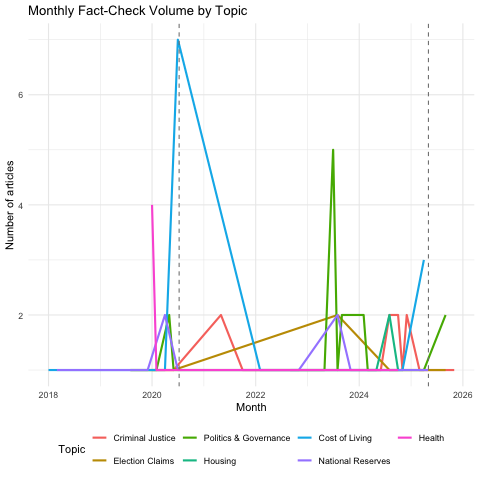

In [17]:
%%R 
# ============================================================================
# TOPIC SPIKE CHART - Monthly article counts by topic over time
# ============================================================================
# This line chart shows how publication volume varies over time for each topic.
# Spikes near the election lines (dashed) indicate pre-election surges.

library(lubridate)

df %>%
  mutate(month = floor_date(date, "month")) %>%
  count(month, new_topic_merged) %>%  # Use merged topic column
  ggplot(aes(month, n, color = new_topic_merged)) +
  geom_line(linewidth = 1) +
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50") +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50") +
  labs(
    title = "Monthly Fact-Check Volume by Topic",
    x = "Month",
    y = "Number of articles",
    color = "Topic"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Bubble plot

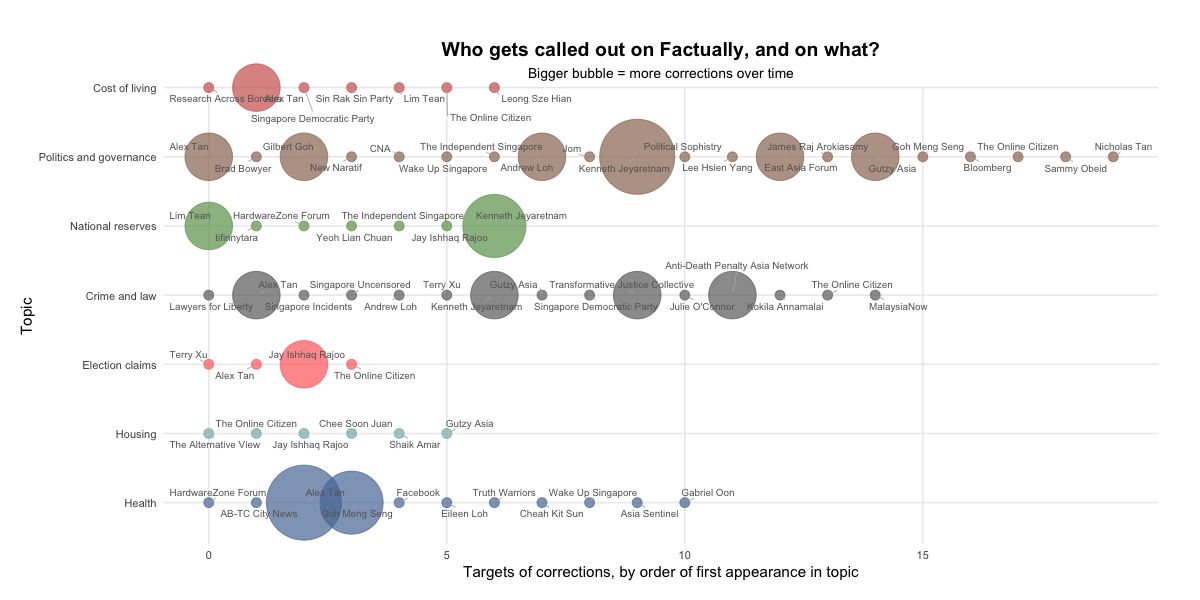

In [18]:
%%R -w 12 -h 6 --units in -r 100
# ============================================================================
# BUBBLE PLOT - Who gets called out, and on what topics?
# ============================================================================
# Each bubble = one person/organization targeted for correction
# Bubble size = how many times they've been corrected on that topic
# X-axis position = order of first appearance (earlier = left)

library(ggrepel)

# Filter out general explainers (no specific target)
targets_df <- df %>%
  filter(!grepl("General Explainer|Explainer|General Clarification",
                directed_at, ignore.case = TRUE)) %>%
  filter(!is.na(directed_at) & directed_at != "")

# Keep only the first target per row (some have multiple targets separated by ;)
targets_df <- targets_df %>%
  mutate(target = trimws(sapply(strsplit(directed_at, ";"), `[`, 1)))

# Count bubbles - how many corrections per target per topic
bubble_data <- targets_df %>%
  count(new_topic_merged, target, name = "count")

# Compute FIRST appearance date *within topic* for x-axis ordering
first_seen <- targets_df %>%
  group_by(new_topic_merged, target) %>%
  summarise(first_date = min(date, na.rm = TRUE), .groups = "drop")

# Join + rank within each topic
bubble_data <- bubble_data %>%
  left_join(first_seen, by = c("new_topic_merged", "target")) %>%
  group_by(new_topic_merged) %>%
  arrange(first_date, .by_group = TRUE) %>%
  mutate(target_num = row_number() - 1) %>%
  ungroup()

# Topic order (7 categories after merging)
topic_order <- c("Cost of Living", "Politics & Governance", "National Reserves", 
                 "Criminal Justice", "Election Claims", "Housing", "Health")
bubble_data$new_topic_merged <- factor(bubble_data$new_topic_merged, levels = rev(topic_order))

# Colors for each topic
topic_colors <- c(
  "Health" = "#5778a4",
  "National Reserves" = "#6a9f58",
  "Cost of Living" = "#d1615d",
  "Housing" = "#85b6b2",
  "Politics & Governance" = "#9a7461",
  "Election Claims" = "#ff6b6b",
  "Criminal Justice" = "#6a6a6a"
)

ggplot(bubble_data, aes(x = target_num, y = new_topic_merged, size = count, color = new_topic_merged)) +
  geom_point(alpha = 0.7) +
  geom_text_repel(
    aes(label = target),
    size = 2.5,
    color = "gray40",
    max.overlaps = Inf,
    box.padding = 0.3,
    point.padding = 0.3,
    segment.color = "gray70",
    segment.size = 0.3,
    min.segment.length = 0
  ) +
  scale_size_continuous(range = c(3, 25), guide = "none") +
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_y_discrete(
    expand = expansion(mult = c(0.1, 0)),
    labels = c(
      "Cost of Living" = "Cost of living",
      "National Reserves" = "National reserves",
      "Politics & Governance" = "Politics and governance",
      "Criminal Justice" = "Crime and law",
      "Election Claims" = "Election claims",
      "Health" = "Health",
      "Housing" = "Housing"
    )
  ) +
  labs(
    title = "Who gets called out on Factually, and on what?",
    subtitle = "Bigger bubble = more corrections over time",
    x = "Targets of corrections, by order of first appearance in topic",
    y = "Topic"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 0.5, size = 10),
    panel.grid.minor = element_blank(),
    axis.text.y = element_text(size = 8),
    axis.text.x = element_text(size = 8),
    plot.margin = margin(t = 30, r = 30, b = 15, l = 15)
  ) +
  coord_cartesian(clip = "off")

The bubble size represents how many times that person/organization was called out on that specific topic.
  - Large bubble = called out many times on that topic                                                                                                 
  - Small bubble = called out once or a few times on that topic           
  
  So if you see someone with a big bubble on a topic, it means they received multiple corrections on that topic. If someone has a tiny bubble, they were only called out once.  
                
  Note: The same person can appear multiple times (one bubble per topic they were called out on).  

# Improving on timeline dot plot

PREPARING ANNOTATIONS

In [19]:
%%R 
# ============================================================================
# TOPIC BREAKDOWN - Articles inside vs outside pre-election window
# ============================================================================
# This pivot table shows raw counts for each topic:
# FALSE = articles outside the 60-day pre-election windows
# TRUE = articles inside the 60-day pre-election windows

df %>%
  count(new_topic_merged, before_ge) %>%
  tidyr::pivot_wider(
    names_from = before_ge,
    values_from = n,
    values_fill = 0
  ) %>%
  rename(
    Outside_Window = `FALSE`,
    In_Pre_Election = `TRUE`
  )

# This shows the raw data behind the surge calculations

# A tibble: 7 × 3
  new_topic_merged      Outside_Window In_Pre_Election
  <fct>                          <int>           <int>
1 Criminal Justice                  17               2
2 Election Claims                    7               1
3 Politics & Governance             24               6
4 Housing                            8               0
5 Cost of Living                    12               8
6 National Reserves                 17               3
7 Health                            19               0


## INTERPRETATION

Corrections and clarifications run **3.7× higher** in the 100 days before elections.

- Outside window: ~0.036 articles/day  
- Inside window:  ~0.135 articles/day

In human language:
- roughly 1 article every 28 days normally
- roughly 1 article every 7 days pre-election

That is a dramatic tempo shift.

Orientation inferred to be along y-axis; override with
`position_beeswarm(orientation = 'x')`


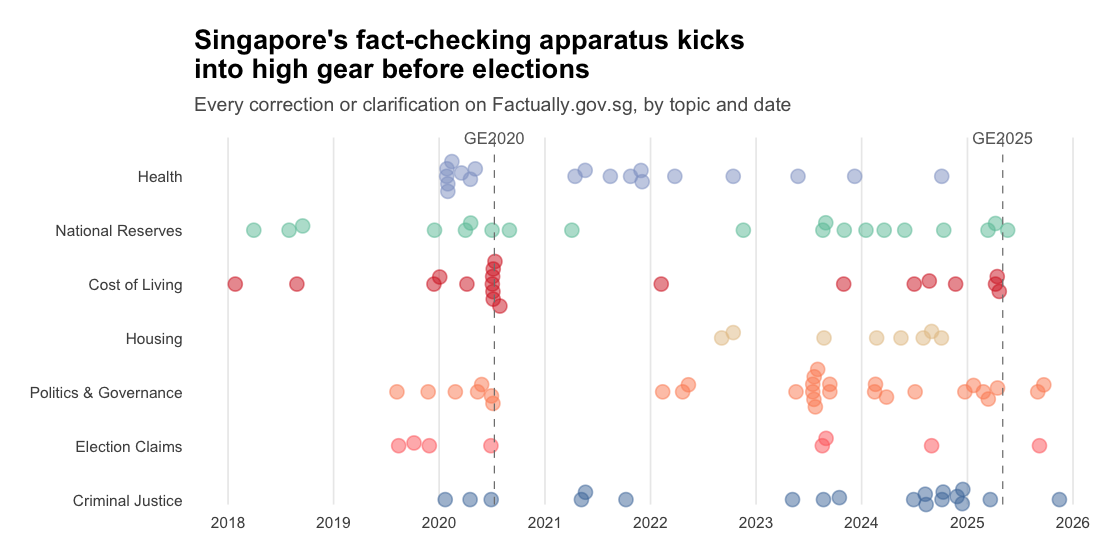

In [20]:
%%R -w 8 -h 4 --units in -r 140
# ============================================================================
# IMPROVED TIMELINE PLOT - Cleaner version showing election clustering
# ============================================================================
# This is a refined version of the timeline dot plot with better styling.

# Topic order (7 categories after merging)
topic_order <- c(
  "Health", "National Reserves", "Cost of Living", "Housing",
  "Politics & Governance", "Election Claims", "Criminal Justice"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))

y_top <- length(topic_order) + 0.6

# Colors
topic_colors <- c(
  "Health" = "#8da0cb",
  "National Reserves" = "#66c2a5",
  "Cost of Living" = "#d62728",
  "Housing" = "#e5c494",
  "Politics & Governance" = "#fc8d62",
  "Election Claims" = "#ff6b6b",
  "Criminal Justice" = "#4c78a8"
)

ggplot(df, aes(date, new_topic_merged)) +
  # dots - using beeswarm to prevent overlap
  geom_beeswarm(aes(color = new_topic_merged), size = 3, alpha = 0.5, cex = 2) +
  
  # election lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.3) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.3) +
  
  # election labels
  annotate("text", x = ge2020, y = y_top, label = "GE2020",
           vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025",
           vjust = 0, color = "grey40", size = 3) +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_discrete(expand = expansion(mult = c(0.01, 0.12))) +
  coord_cartesian(clip = "off") +
  
  labs(
    title = "Singapore's fact-checking apparatus kicks\ninto high gear before elections",
    subtitle = "Every correction or clarification on Factually.gov.sg, by topic and date",
    x = "", y = ""
  ) +
  
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 8),
    axis.text.x = element_text(size = 8),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 12)),
    plot.margin = margin(15, 10, 0, 0)
  )

### Annotate the points labelled General Explainer or General Clarification

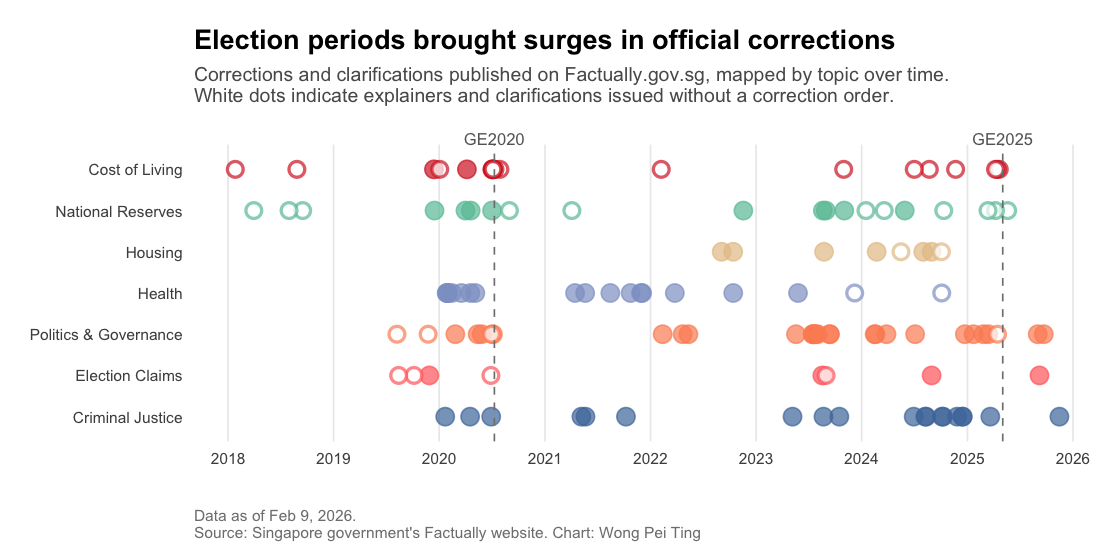

In [21]:
%%R -w 8 -h 4 --units in -r 140
# ============================================================================
# TIMELINE WITH POFMA STATUS - Solid vs hollow dots show order status
# ============================================================================
# This visualization distinguishes between:
# - Solid dots: Articles with formal POFMA correction orders
# - Hollow dots: Explainers/clarifications WITHOUT formal orders
# This distinction is important because POFMA orders carry legal weight.

# Topic order (7 categories after merging)
topic_order <- c(
  "Cost of Living", "National Reserves", "Housing", "Health", 
  "Politics & Governance", "Election Claims", "Criminal Justice"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))

y_top <- length(topic_order) + 0.6

# Colors (updated for merged categories)
topic_colors <- c(
  "Health" = "#8da0cb",
  "National Reserves" = "#66c2a5",
  "Cost of Living" = "#d62728",
  "Housing" = "#e5c494",
  "Politics & Governance" = "#fc8d62",
  "Election Claims" = "#ff6b6b",
  "Criminal Justice" = "#4c78a8" 
)

# Set x-axis limits to extend to analysis end date
start_date <- min(df$date, na.rm = TRUE)
end_date <- ANALYSIS_END_DATE

ggplot(df, aes(date, new_topic_merged)) +
  # Background dots: Articles WITH POFMA orders (solid)
  geom_point(
    data = df %>% filter(has_pofma_order),
    aes(color = new_topic_merged),
    size = 4,
    alpha = 0.7
  ) +
  
  # Highlight dots: Articles WITHOUT POFMA orders (hollow - white-centered)
  geom_point(
    data = df %>% filter(no_pofma),
    aes(color = new_topic_merged),
    size = 3,
    alpha = 0.7,
    shape = 21,
    fill = "white",
    stroke = 1.2
  ) +
  
  # Key vertical lines at election dates
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  
  # Labels for election lines
  annotate("text", x = ge2020, y = y_top, label = "GE2020", vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025", vjust = 0, color = "grey40", size = 3) +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_discrete(expand = expansion(mult = c(0.1, 0))) +
  coord_cartesian(clip = "off") +
  
  labs(
    title = "Election periods brought surges in official corrections",
    subtitle = "Corrections and clarifications published on Factually.gov.sg, mapped by topic over time.\nWhite dots indicate explainers and clarifications issued without a correction order.",
    x = "", y = "",
    caption = "Data as of Feb 9, 2026.\nSource: Singapore government's Factually website. Chart: Wong Pei Ting"
  ) +
  
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 8),
    axis.text.x = element_text(size = 8),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 20)),
    plot.margin = margin(15, 10, 10, 0),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )

### Topic Category Definitions

**Cost of Living** (20): Employment + inflation mentions. Covers foreign workers, wages, job displacement.

**National Reserves** (20): Finance articles about mandatory savings, retirement adequacy, reserves.

**Election Claims** (8): Governance with election keywords (vote, GE2020, GE2025, campaign).

**Criminal Justice** (19): Law & Order + Justice merged. Death penalty, police, criminal justice.

**Political Opposition** (16): Accountability articles (Ridout + Public Funds) + opposition mentions (Jeyaretnam, WP, PSP, SDP, Lim Tean). Distance: 0.89 < threshold 1.12.

**Governance** (14): Governance without election keywords. General explainers, routine clarifications.

**Housing** (8): HDB allocation, pricing, supply. Kept separate despite proximity to CPF (distance: 2.24).

**Health** (19): COVID-19, vaccines, medical claims. Semantically distinct (min distance: 2.40).

---

**Methodology:** Semantic clustering (x,y coordinates) + keyword detection. Threshold: 1.12 (50% of avg inter-centroid distance). Total: 124 articles. POFMA orders: 85. Pre-election surge: 3.7×.

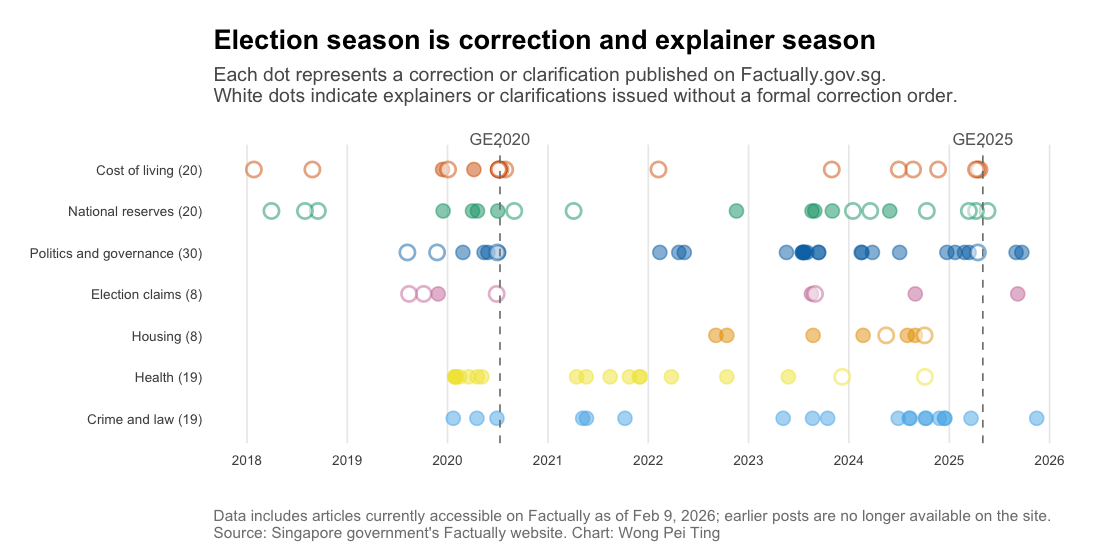

In [22]:
%%R -w 8 -h 4 --units in -r 140   
# ============================================================================
# PUBLICATION-READY TIMELINE - With colorblind-safe palette and article counts
# ============================================================================
# This is the polished version for publication with:
# - Colorblind-safe palette (Wong palette)
# - Article counts in y-axis labels
# - Clear distinction between POFMA orders and explainers

# Topic order (after merge)
topic_order <- c(
  "Cost of Living", "National Reserves", "Politics & Governance", 
  "Election Claims", "Housing", "Health", "Criminal Justice"
)

df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))
y_top <- length(topic_order) + 0.6

# Colorblind-safe Wong palette
# Reference: https://www.nature.com/articles/nmeth.1618
topic_colors <- c(
  "Cost of Living" = "#D55E00",        # burnt orange - economic urgency

  "Politics & Governance" = "#0072B2", # strong institutional blue
  "Election Claims" = "#CC79A7",       # magenta - stands apart immediately
  "National Reserves" = "#009E73",     # deep green - fiscal / state
  "Housing" = "#E69F00",               # warm amber - visible, not beige
  "Criminal Justice" = "#56B4E9",      # lighter blue but clearly distinct
  "Health" = "#F0E442"                 # yellow - works with dot outlines
)

# X-axis extends to analysis end date
start_date <- min(df$date, na.rm = TRUE)
end_date <- ANALYSIS_END_DATE

ggplot(df, aes(date, new_topic_merged)) +
  # Solid dots: Articles WITH POFMA orders
  geom_point(
    data = df %>% filter(has_pofma_order),
    aes(color = new_topic_merged),
    size = 3,
    alpha = 0.5
  ) +

  # Hollow dots: Articles WITHOUT POFMA orders (explainers)
  geom_point(
    data = df %>% filter(no_pofma),
    aes(color = new_topic_merged),
    size = 3,
    alpha = 0.5,
    shape = 21,
    fill = "white",
    stroke = 1
  ) +

  # Election lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.4) +

  # Election labels
  annotate("text", x = ge2020, y = y_top, label = "GE2020", vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025", vjust = 0, color = "grey40", size = 3) +

  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(
    limits = c(start_date, end_date),
    date_breaks = "1 year",
    date_labels = "%Y"
  ) +
  # Y-axis labels with article counts for each topic
  scale_y_discrete(expand = expansion(mult = c(0.1, 0)), labels = c(
    "Cost of Living" = "Cost of living (20)",
    "National Reserves" = "National reserves (20)",
    "Politics & Governance" = "Politics and governance (30)",
    "Criminal Justice" = "Crime and law (19)",
    "Election Claims" = "Election claims (8)", 
    "Health" = "Health (19)",
    "Housing" = "Housing (8)"
  )) +
  coord_cartesian(clip = "off") +

  labs(
    title = "Election season is correction and explainer season",
    subtitle = "Each dot represents a correction or clarification published on Factually.gov.sg.\nWhite dots indicate explainers or clarifications issued without a formal correction order.",
    x = "", y = "",
    caption = "Data includes articles currently accessible on Factually as of Feb 9, 2026; earlier posts are no longer available on the site.\nSource: Singapore government's Factually website. Chart: Wong Pei Ting"
  ) +

  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 7),
    axis.text.x = element_text(size = 7),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 20)),
    plot.margin = margin(15, 10, 10, 0),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )

In [23]:
%%R 
# ============================================================================
# SUMMARY TABLE - Pre-Election Surge by Topic (proportion-based)
# ============================================================================
# This calculates the "proportion-based" surge multiplier:
# What % of each topic's articles fall in pre-election windows, divided by
# the baseline % of timeline that is pre-election (~4%).
#
# Note: This differs from the "rate-based" calculation which compares
# articles-per-day in each period. Both are valid; they measure different things.

summary_table <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    Count = n(),
    before_rate = mean(before_ge),  # % of this topic's articles in pre-election
    .groups = "drop"
  ) %>%
  mutate(
    # Proportion-based surge = observed share / expected share
    `Pre-Election Surge` = paste0(round(before_rate / baseline_probability, 1), "x")
  ) %>%
  transmute(
    Category = new_topic_merged,
    Count,
    `Pre-Election Surge`
  ) %>%
  arrange(desc(as.numeric(str_remove(`Pre-Election Surge`, "x"))))

summary_table

# INTERPRETATION:
# - Cost of Living at ~10x means 40% of its articles are pre-election vs 4% expected
# - Health and Housing at 0x means NO articles during pre-election windows
# - This selective concentration is the key finding: it's not uniform surge

# A tibble: 7 × 3
  Category              Count `Pre-Election Surge`
  <fct>                 <int> <chr>               
1 Cost of Living           20 9.8x                
2 Politics & Governance    30 4.9x                
3 National Reserves        20 3.7x                
4 Election Claims           8 3.1x                
5 Criminal Justice         19 2.6x                
6 Health                   19 0x                  
7 Housing                   8 0x                  


In [24]:
%%R
# ============================================================================
# TOPIC-LEVEL CHI-SQUARE TESTS - Is each topic's clustering statistically significant?
# ============================================================================
# For each topic with sufficient sample size (n >= 5), we test whether its
# pre-election concentration is statistically different from random.
# This moves beyond "how big is the surge" to "is it unlikely to be chance."

# Function to run chi-square test for a single topic
run_topic_chisq <- function(topic_data, topic_name) {
  n_before <- sum(topic_data$before_ge)
  n_total <- nrow(topic_data)
  n_after <- n_total - n_before
  
  # Skip if sample too small
  if (n_total < 5) {
    return(data.frame(
      Topic = topic_name,
      n_total = n_total,
      n_pre_election = n_before,
      expected_pre = NA,
      chi_sq = NA,
      p_value = NA,
      significant = NA
    ))
  }
  
  # Expected distribution based on timeline proportion
  expected_before <- n_total * baseline_probability
  expected_after <- n_total * (1 - baseline_probability)
  
  # Chi-square test
  observed <- c(n_after, n_before)
  expected_probs <- c(1 - baseline_probability, baseline_probability)
  
  test_result <- tryCatch(
    chisq.test(observed, p = expected_probs),
    error = function(e) NULL
  )
  
  if (is.null(test_result)) {
    return(data.frame(
      Topic = topic_name,
      n_total = n_total,
      n_pre_election = n_before,
      expected_pre = round(expected_before, 1),
      chi_sq = NA,
      p_value = NA,
      significant = NA
    ))
  }
  
  data.frame(
    Topic = topic_name,
    n_total = n_total,
    n_pre_election = n_before,
    expected_pre = round(expected_before, 1),
    chi_sq = round(test_result$statistic, 2),
    p_value = format(test_result$p.value, scientific = TRUE, digits = 3),
    significant = ifelse(test_result$p.value < 0.05, "Yes", "No")
  )
}

# Run tests for all topics
topic_chisq_results <- df %>%
  group_by(new_topic_merged) %>%
  group_split() %>%
  map_dfr(~ run_topic_chisq(.x, unique(.x$new_topic_merged)))

# Display results
cat("=== TOPIC-LEVEL CHI-SQUARE TESTS ===\n")
cat("Testing if each topic's pre-election concentration is statistically significant.\n")
cat("H0: Articles are randomly distributed across time\n")
cat("H1: Articles cluster disproportionately before elections\n\n")
print(topic_chisq_results)

# INTERPRETATION:
# - p-value < 0.05 means we can reject the null hypothesis of random timing
# - Topics with "Yes" in significant column show statistically significant clustering
# - Cost of Living likely shows strongest significance given its ~10x surge

=== TOPIC-LEVEL CHI-SQUARE TESTS ===
Testing if each topic's pre-election concentration is statistically significant.
H0: Articles are randomly distributed across time
H1: Articles cluster disproportionately before elections

                              Topic n_total n_pre_election expected_pre chi_sq
X-squared...1      Criminal Justice      19              2          0.8   2.01
X-squared...2                Health      19              0          0.8   0.81
X-squared...3               Housing       8              0          0.3   0.34
X-squared...4       Election Claims       8              1          0.3   1.44
X-squared...5 Politics & Governance      30              6          1.2  19.38
X-squared...6     National Reserves      20              3          0.8   6.08
X-squared...7        Cost of Living      20              8          0.8  65.80
               p_value significant
X-squared...1 1.56e-01          No
X-squared...2 3.68e-01          No
X-squared...3 5.59e-01          No
X-

In addition: Warning messages:
1: In chisq.test(observed, p = expected_probs) :
  Chi-squared approximation may be incorrect
2: In chisq.test(observed, p = expected_probs) :
  Chi-squared approximation may be incorrect
3: In chisq.test(observed, p = expected_probs) :
  Chi-squared approximation may be incorrect
4: In chisq.test(observed, p = expected_probs) :
  Chi-squared approximation may be incorrect
5: In chisq.test(observed, p = expected_probs) :
  Chi-squared approximation may be incorrect
6: In chisq.test(observed, p = expected_probs) :
  Chi-squared approximation may be incorrect
7: In chisq.test(observed, p = expected_probs) :
  Chi-squared approximation may be incorrect


In [25]:
%%R
# ============================================================================
# SURGE CONFIDENCE INTERVALS - How precise are our surge estimates?
# ============================================================================
# Calculate 95% confidence intervals for each topic's surge multiplier.
# Uses log transformation since rate ratios are multiplicative:
# CI = exp(log(surge) +/- 1.96 * sqrt(1/n_window + 1/n_baseline))
#
# This tells us: "Cost of Living surge is 15.6x, but it could plausibly
# be anywhere from X to Y" - important for not over-interpreting point estimates.

surge_ci_table <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    n_window = sum(before_ge),      # Articles in pre-election windows
    n_baseline = sum(!before_ge),    # Articles outside windows
    .groups = "drop"
  ) %>%
  mutate(
    # Rate-based surge calculation
    rate_window = n_window / before_days,
    rate_baseline = n_baseline / baseline_days,
    surge = ifelse(rate_baseline > 0, rate_window / rate_baseline, NA),
    
    # 95% CI using log transformation (valid for rate ratios)
    # SE of log(rate ratio) = sqrt(1/n1 + 1/n2) approximately
    log_se = ifelse(n_window > 0 & n_baseline > 0, 
                    sqrt(1/n_window + 1/n_baseline), 
                    NA),
    
    # Calculate CI bounds
    ci_lower = ifelse(!is.na(log_se) & surge > 0, 
                      exp(log(surge) - 1.96 * log_se), 
                      NA),
    ci_upper = ifelse(!is.na(log_se) & surge > 0, 
                      exp(log(surge) + 1.96 * log_se), 
                      NA)
  ) %>%
  transmute(
    Topic = new_topic_merged,
    `Articles (Window)` = n_window,
    `Articles (Baseline)` = n_baseline,
    `Surge Multiplier` = round(surge, 1),
    `95% CI Lower` = round(ci_lower, 1),
    `95% CI Upper` = round(ci_upper, 1)
  ) %>%
  arrange(desc(`Surge Multiplier`))

cat("=== SURGE MULTIPLIERS WITH 95% CONFIDENCE INTERVALS ===\n")
cat("Rate-based calculation: (articles/day in windows) / (articles/day in baseline)\n")
cat("Window = 120 days (2 elections x 60 days)\n")
cat("Baseline =", baseline_days, "days\n\n")
print(surge_ci_table)

# INTERPRETATION:
# - Wide CIs indicate uncertainty (small samples)
# - If CI includes 1, the surge is not statistically significant
# - Cost of Living has the highest point estimate - check if CI excludes 1

=== SURGE MULTIPLIERS WITH 95% CONFIDENCE INTERVALS ===
Rate-based calculation: (articles/day in windows) / (articles/day in baseline)
Window = 120 days (2 elections x 60 days)
Baseline = 2816 days

# A tibble: 7 × 6
  Topic             `Articles (Window)` `Articles (Baseline)` `Surge Multiplier`
  <fct>                           <int>                 <int>              <dbl>
1 Cost of Living                      8                    12               15.6
2 Politics & Gover…                   6                    24                5.9
3 National Reserves                   3                    17                4.1
4 Election Claims                     1                     7                3.4
5 Criminal Justice                    2                    17                2.8
6 Health                              0                    19                0  
7 Housing                             0                     8                0  
# ℹ 2 more variables: `95% CI Lower` <dbl>, `95% CI Up

=== ACCELERATION ANALYSIS - Articles by Distance to Election ===

  days_bucket  n bucket_days rate_per_day relative_intensity
1   0-15 days 95          30  3.166666667               75.0
2  31-45 days  1          30  0.033333333                0.8
3  46-60 days  1          30  0.033333333                0.8
4  61-90 days  4          60  0.066666667                1.6
5 91-100 days  2          20  0.100000000                2.4
6   100+ days 21        2696  0.007789318                0.2


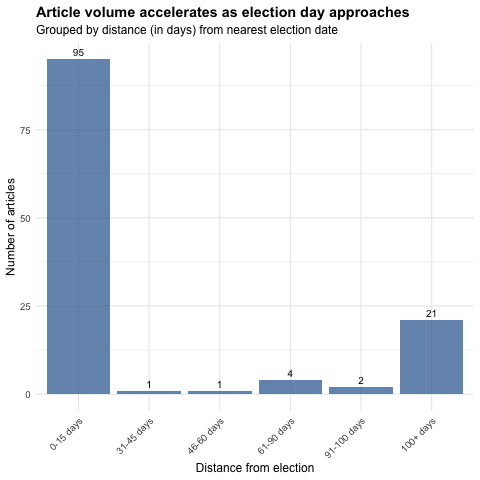

In [26]:
%%R
# ============================================================================
# ACCELERATION ANALYSIS - Full breakdown by distance to election
# ============================================================================
# Does activity gradually rise, or does it spike near election day?
# Buckets: 0-15, 16-30, 31-45, 46-60, 61-90, 91-100, 100+ days from election

df_accel <- df %>%
  mutate(
    # Distance to the closest election (could be before or after)
    days_bucket = case_when(
      days_to_election <= 15 ~ "0-15 days",
      days_to_election <= 30 ~ "16-30 days",
      days_to_election <= 45 ~ "31-45 days",
      days_to_election <= 60 ~ "46-60 days",
      days_to_election <= 90 ~ "61-90 days",
      days_to_election <= 100 ~ "91-100 days",
      TRUE ~ "100+ days"
    )
  )

# Order the factor levels
df_accel$days_bucket <- factor(df_accel$days_bucket, 
                                levels = c("0-15 days", "16-30 days", "31-45 days", 
                                          "46-60 days", "61-90 days", "91-100 days", "100+ days"))

# Count by bucket
accel_counts <- df_accel %>%
  count(days_bucket) %>%
  mutate(
    # Calculate days in each bucket (for 2 elections)
    bucket_days = case_when(
      days_bucket == "0-15 days" ~ 15 * 2,
      days_bucket == "16-30 days" ~ 15 * 2,
      days_bucket == "31-45 days" ~ 15 * 2,
      days_bucket == "46-60 days" ~ 15 * 2,
      days_bucket == "61-90 days" ~ 30 * 2,
      days_bucket == "91-100 days" ~ 10 * 2,
      TRUE ~ baseline_days - 120  # Remaining days
    ),
    rate_per_day = n / bucket_days,
    relative_intensity = round(rate_per_day / (sum(n) / total_days), 1)
  )

cat("=== ACCELERATION ANALYSIS - Articles by Distance to Election ===\n\n")
print(accel_counts)

# Visualize the acceleration
ggplot(accel_counts, aes(x = days_bucket, y = n)) +
  geom_col(fill = "#4c78a8", alpha = 0.8) +
  geom_text(aes(label = n), vjust = -0.5, size = 3.5) +
  labs(
    title = "Article volume accelerates as election day approaches",
    subtitle = "Grouped by distance (in days) from nearest election date",
    x = "Distance from election",
    y = "Number of articles"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(face = "bold")
  )

# INTERPRETATION:
# - If activity accelerates toward election, we should see higher counts
#   in the 0-15 and 16-30 day buckets
# - A gradual ramp suggests anticipatory behavior
# - A sudden spike suggests reactive behavior to campaign news

In [27]:
%%R
# ============================================================================
# POFMA COMPARISON ANALYSIS - Do formal orders vs explainers behave differently?
# ============================================================================
# Compare surge patterns between:
# - Articles WITH formal POFMA correction orders (legal enforcement)
# - Articles WITHOUT orders (general explainers/clarifications)
#
# If explainers surge MORE than formal orders, it suggests proactive
# "getting ahead of narratives" rather than reactive enforcement.

pofma_comparison <- df %>%
  group_by(has_pofma_order) %>%
  summarise(
    n_total = n(),
    n_pre_election = sum(before_ge),
    n_baseline = sum(!before_ge),
    .groups = "drop"
  ) %>%
  mutate(
    type = ifelse(has_pofma_order, "With POFMA Order", "Without Order (Explainers)"),
    pct_pre_election = round(n_pre_election / n_total * 100, 1),
    rate_window = n_pre_election / before_days,
    rate_baseline = n_baseline / baseline_days,
    surge_multiplier = round(rate_window / rate_baseline, 1)
  ) %>%
  select(type, n_total, n_pre_election, pct_pre_election, surge_multiplier)

cat("=== POFMA vs NON-POFMA COMPARISON ===\n\n")
print(pofma_comparison)

# Chi-square test to see if the difference is significant
pofma_contingency <- df %>%
  count(has_pofma_order, before_ge) %>%
  tidyr::pivot_wider(names_from = before_ge, values_from = n, values_fill = 0)

cat("\n=== Contingency Table ===\n")
print(pofma_contingency)

# Run chi-square test on the contingency table
contingency_matrix <- as.matrix(pofma_contingency[, -1])
chisq_result <- chisq.test(contingency_matrix)

cat("\n=== Chi-Square Test for Independence ===\n")
cat("H0: POFMA status and pre-election timing are independent\n")
cat("H1: They are not independent (one type clusters more)\n\n")
print(chisq_result)

# INTERPRETATION:
# - If p < 0.05, the surge pattern differs significantly between POFMA and non-POFMA
# - Higher surge for explainers suggests proactive messaging
# - Higher surge for POFMA orders suggests reactive enforcement

=== POFMA vs NON-POFMA COMPARISON ===

# A tibble: 2 × 5
  type                  n_total n_pre_election pct_pre_election surge_multiplier
  <chr>                   <int>          <int>            <dbl>            <dbl>
1 Without Order (Expla…      39             11             28.2              9.2
2 With POFMA Order           85              9             10.6              2.8

=== Contingency Table ===
# A tibble: 2 × 3
  has_pofma_order `FALSE` `TRUE`
  <lgl>             <int>  <int>
1 FALSE                28     11
2 TRUE                 76      9

=== Chi-Square Test for Independence ===
H0: POFMA status and pre-election timing are independent
H1: They are not independent (one type clusters more)


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_matrix
X-squared = 4.9002, df = 1, p-value = 0.02685



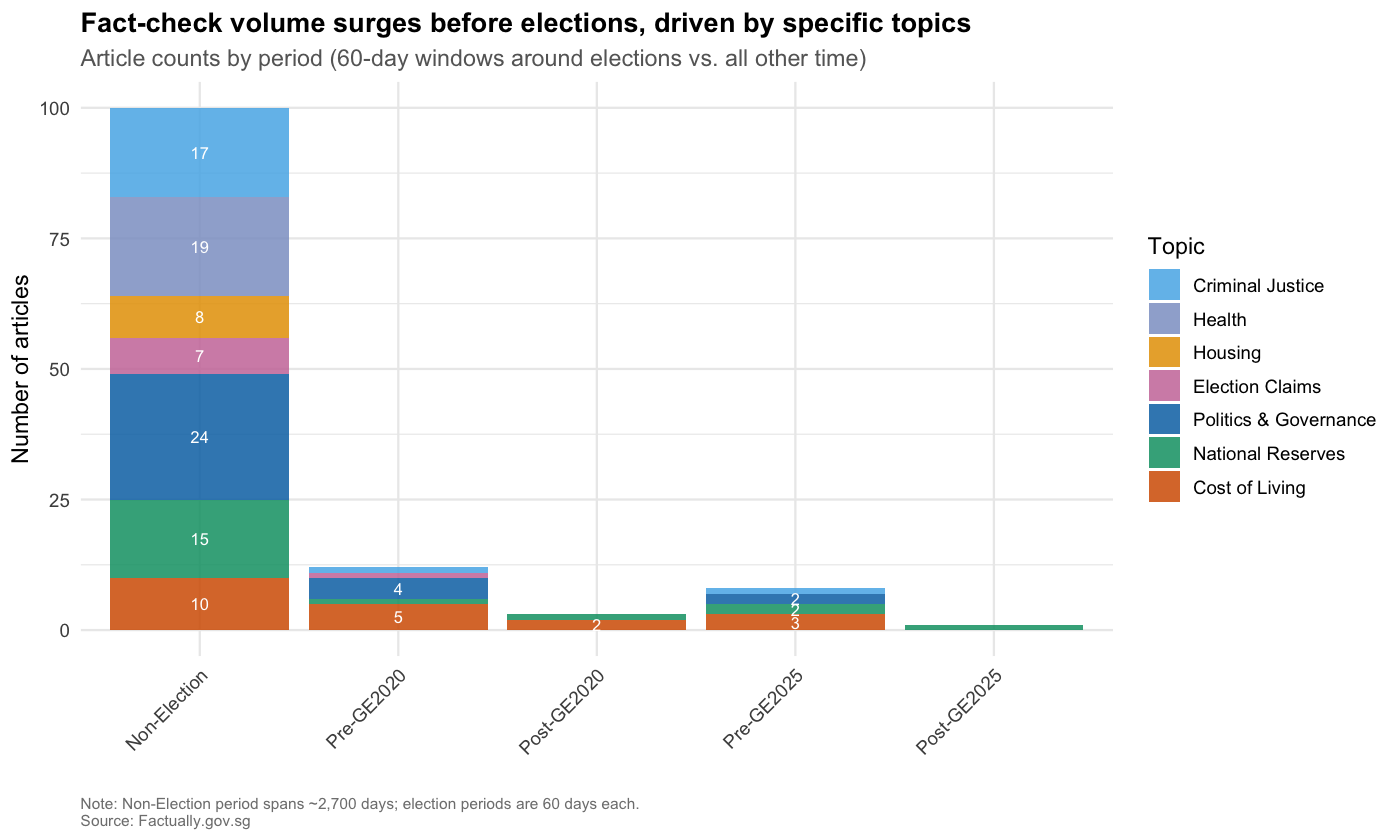

In [28]:
%%R -w 10 -h 6 --units in -r 140
# ============================================================================
# STACKED BAR CHART - Volume by time period and topic composition
# ============================================================================
# This visualization shows BOTH:
# 1. Total volume increase near elections (bar height)
# 2. Which topics drive that increase (stack composition)
# This makes the surge pattern more intuitive than dot plots.

library(lubridate)

# Create time buckets - quarters relative to elections
df_stacked <- df %>%
  mutate(
    # Create period buckets
    period = case_when(
      date >= ge2020 - 60 & date < ge2020 ~ "Pre-GE2020",
      date >= ge2020 & date < ge2020 + 60 ~ "Post-GE2020",
      date >= ge2025 - 60 & date < ge2025 ~ "Pre-GE2025",
      date >= ge2025 & date < ge2025 + 60 ~ "Post-GE2025",
      TRUE ~ "Non-Election"
    )
  )

# Order the periods chronologically
df_stacked$period <- factor(df_stacked$period, 
                            levels = c("Non-Election", "Pre-GE2020", "Post-GE2020", 
                                      "Pre-GE2025", "Post-GE2025"))

# Colors for topics (consistent with other plots)
topic_colors <- c(
  "Cost of Living" = "#D55E00",
  "Politics & Governance" = "#0072B2",
  "Election Claims" = "#CC79A7",
  "National Reserves" = "#009E73",
  "Housing" = "#E69F00",
  "Criminal Justice" = "#56B4E9",
  "Health" = "#8DA0CB"
)

# Aggregate by period and topic
stacked_data <- df_stacked %>%
  count(period, new_topic_merged) %>%
  group_by(period) %>%
  mutate(
    total = sum(n),
    pct = n / total * 100
  )

# Create the stacked bar chart
ggplot(stacked_data, aes(x = period, y = n, fill = new_topic_merged)) +
  geom_col(position = "stack", alpha = 0.85) +
  geom_text(
    aes(label = ifelse(n >= 2, n, "")),  # Only show labels for n >= 2
    position = position_stack(vjust = 0.5),
    size = 3,
    color = "white"
  ) +
  scale_fill_manual(values = topic_colors, name = "Topic") +
  labs(
    title = "Fact-check volume surges before elections, driven by specific topics",
    subtitle = "Article counts by period (60-day windows around elections vs. all other time)",
    x = "",
    y = "Number of articles",
    caption = "Note: Non-Election period spans ~2,700 days; election periods are 60 days each.\nSource: Factually.gov.sg"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "right",
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40"),
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )

# INTERPRETATION:
# - The "Pre-GE" bars should be taller than "Post-GE" (anticipatory pattern)
# - Cost of Living (orange) should dominate the pre-election bars
# - Non-Election bar is tall in absolute terms but represents ~2,700 days


Attaching package: ‘cowplot’

The following object is masked from ‘package:lubridate’:

    stamp



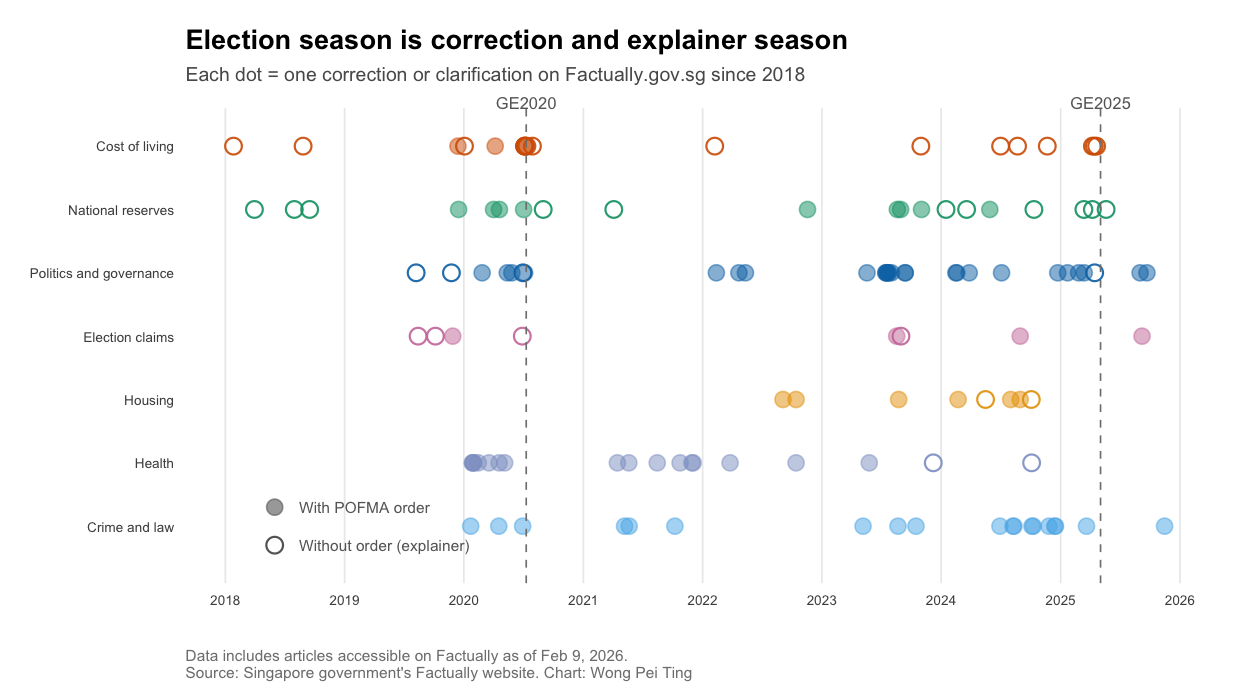

In [ ]:
%%R -w 9 -h 5 --units in -r 140
# ============================================================================
# (IN ONE CHART USED IN DRAFT) FINAL TIMELINE WITH CUSTOM LEGEND - Proper legend for POFMA status
# ============================================================================
# Use a proper legend instead of explaining in subtitle.
# This creates a custom legend showing filled vs hollow dots.

library(cowplot)  # For combining plots
library(grid)     # For custom grob

# Topic order
topic_order <- c(
  "Cost of Living", "National Reserves", "Politics & Governance",
  "Election Claims", "Housing", "Health", "Criminal Justice"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))
y_top <- length(topic_order) + 0.6

# Colors
topic_colors <- c(
  "Cost of Living" = "#D55E00",
  "Politics & Governance" = "#0072B2",
  "Election Claims" = "#CC79A7",
  "National Reserves" = "#009E73",
  "Housing" = "#E69F00",
  "Criminal Justice" = "#56B4E9",
  "Health" = "#8DA0CB"
)

start_date <- min(df$date, na.rm = TRUE)
end_date <- ANALYSIS_END_DATE

# Create the main plot
main_plot <- ggplot(df, aes(date, new_topic_merged)) +
  # Solid dots: WITH formal correction order
  geom_point(
    data = df %>% filter(has_pofma_order),
    aes(color = new_topic_merged),
    size = 3.5,
    alpha = 0.5
  ) +
  # Hollow dots: WITHOUT formal correction order
  geom_point(
    data = df %>% filter(no_pofma),
    aes(color = new_topic_merged),
    size = 3.5,
    alpha = 0.9,
    shape = 1,
    stroke = 0.8
  ) +
  # Election lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  annotate("text", x = ge2020, y = y_top, label = "GE2020", vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025", vjust = 0, color = "grey40", size = 3) +
  
  # Add custom legend annotation in the plot area
  annotate("point", x = as.Date("2018-06-01"), y = 1.3, size = 3.5, color = "grey40", alpha = 0.6) +
  annotate("text", x = as.Date("2018-08-15"), y = 1.3, label = "Correction (tied to POFMA order)", 
           hjust = 0, size = 2.8, color = "grey40") +
  annotate("point", x = as.Date("2018-06-01"), y = 0.7, size = 3.5, color = "grey40", 
           shape = 1, stroke = 0.8) +
  annotate("text", x = as.Date("2018-08-15"), y = 0.7, label = "Without order (explainer)", 
           hjust = 0, size = 2.8, color = "grey40") +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(
    limits = c(start_date, end_date),
    date_breaks = "1 year",
    date_labels = "%Y"
  ) +
  scale_y_discrete(expand = expansion(mult = c(0.15, 0.05)), labels = c(
    "Cost of Living" = "Cost of living",
    "National Reserves" = "National reserves",
    "Politics & Governance" = "Politics and governance",
    "Criminal Justice" = "Crime and law",
    "Election Claims" = "Election claims",
    "Health" = "Health",
    "Housing" = "Housing"
  )) +
  coord_cartesian(clip = "off") +
  labs(
    title = "Election season is correction and explainer season",
    subtitle = "Each dot = one correction or clarification on Factually.gov.sg since 2018",
    x = "", y = "",
    caption = "Data includes articles accessible on Factually as of Feb 9, 2026.\nSource: Singapore government's Factually website. Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 7),
    axis.text.x = element_text(size = 7),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 12)),
    plot.margin = margin(15, 10, 10, 0),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )

main_plot

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


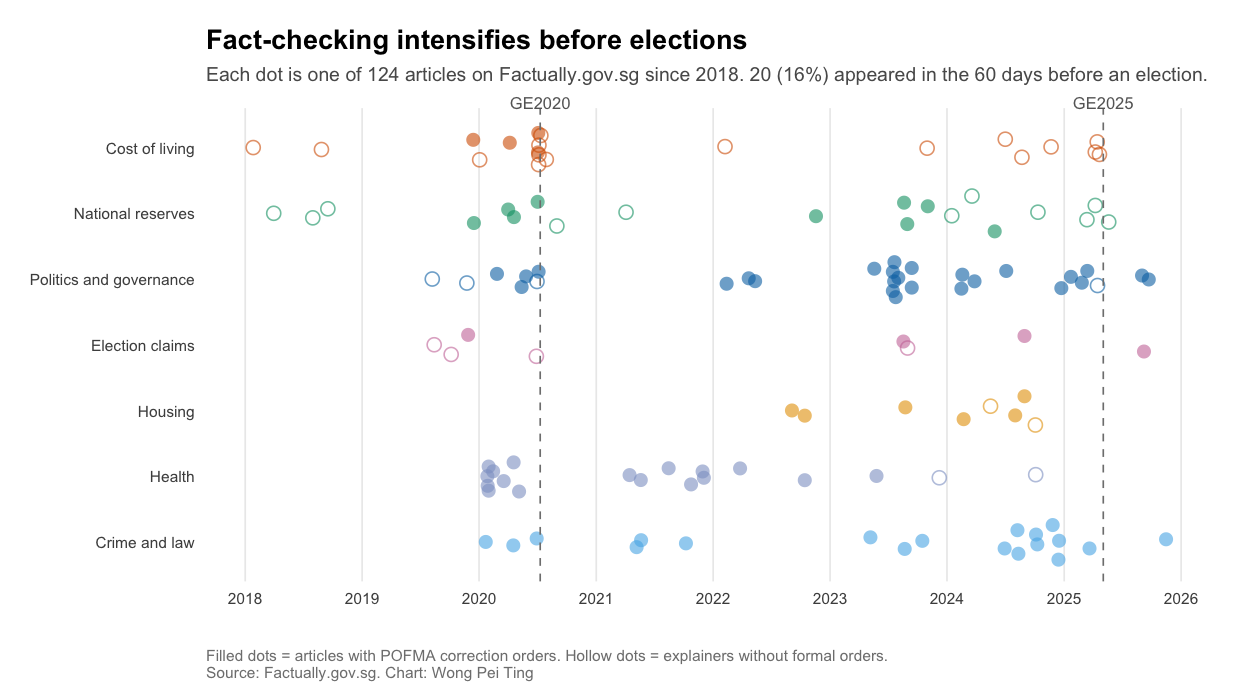

In [30]:
%%R -w 9 -h 5 --units in -r 140
# ============================================================================
# BEESWARM TIMELINE - Prevents dot overlap, shows true density
# ============================================================================
# geom_quasirandom() jitters points to show true density without overlap.

# Topic order
topic_order <- c(
  "Cost of Living", "National Reserves", "Politics & Governance",
  "Election Claims", "Housing", "Health", "Criminal Justice"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = rev(topic_order))
y_top <- length(topic_order) + 0.6

# Colors
topic_colors <- c(
  "Cost of Living" = "#D55E00",
  "Politics & Governance" = "#0072B2",
  "Election Claims" = "#CC79A7",
  "National Reserves" = "#009E73",
  "Housing" = "#E69F00",
  "Criminal Justice" = "#56B4E9",
  "Health" = "#8DA0CB"
)

start_date <- min(df$date, na.rm = TRUE)
end_date <- ANALYSIS_END_DATE

# Calculate stats for subtitle
n_total <- nrow(df)
n_preelection <- sum(df$before_ge)
pct_preelection <- round(n_preelection / n_total * 100, 0)

# Create the beeswarm plot
beeswarm_plot <- ggplot(df, aes(date, new_topic_merged, color = new_topic_merged)) +
  geom_quasirandom(
    aes(shape = has_pofma_order),
    size = 3,
    alpha = 0.6,
    groupOnX = FALSE,
    width = 0.3,
    varwidth = TRUE
  ) +
  
  # Election lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "grey50", linewidth = 0.4) +
  annotate("text", x = ge2020, y = y_top, label = "GE2020", vjust = 0, color = "grey40", size = 3) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025", vjust = 0, color = "grey40", size = 3) +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_shape_manual(
    values = c("TRUE" = 16, "FALSE" = 1),
    labels = c("TRUE" = "Correction (tied to POFMA order)", "FALSE" = "Without order"),
    name = ""
  ) +
  scale_x_date(
    limits = c(start_date, end_date),
    date_breaks = "1 year",
    date_labels = "%Y"
  ) +
  scale_y_discrete(expand = expansion(mult = c(0.1, 0.05)), labels = c(
    "Cost of Living" = "Cost of living",
    "National Reserves" = "National reserves",
    "Politics & Governance" = "Politics and governance",
    "Criminal Justice" = "Crime and law",
    "Election Claims" = "Election claims",
    "Health" = "Health",
    "Housing" = "Housing"
  )) +
  coord_cartesian(clip = "off") +
  labs(
    title = "Fact-checking intensifies before elections",
    subtitle = paste0("Each dot is one of ", n_total, " articles on Factually.gov.sg since 2018. ", 
                      n_preelection, " (", pct_preelection, "%) appeared in the 60 days before an election."),
    x = "", y = "",
    caption = "Filled dots = articles with POFMA correction orders. Hollow dots = explainers without formal orders.\nSource: Factually.gov.sg. Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",  # Legend info moved to caption
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey92", linewidth = 0.4),
    axis.text.y = element_text(size = 8),
    axis.text.x = element_text(size = 8),
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "grey35", margin = margin(b = 12)),
    plot.margin = margin(15, 10, 10, 0),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )

beeswarm_plot

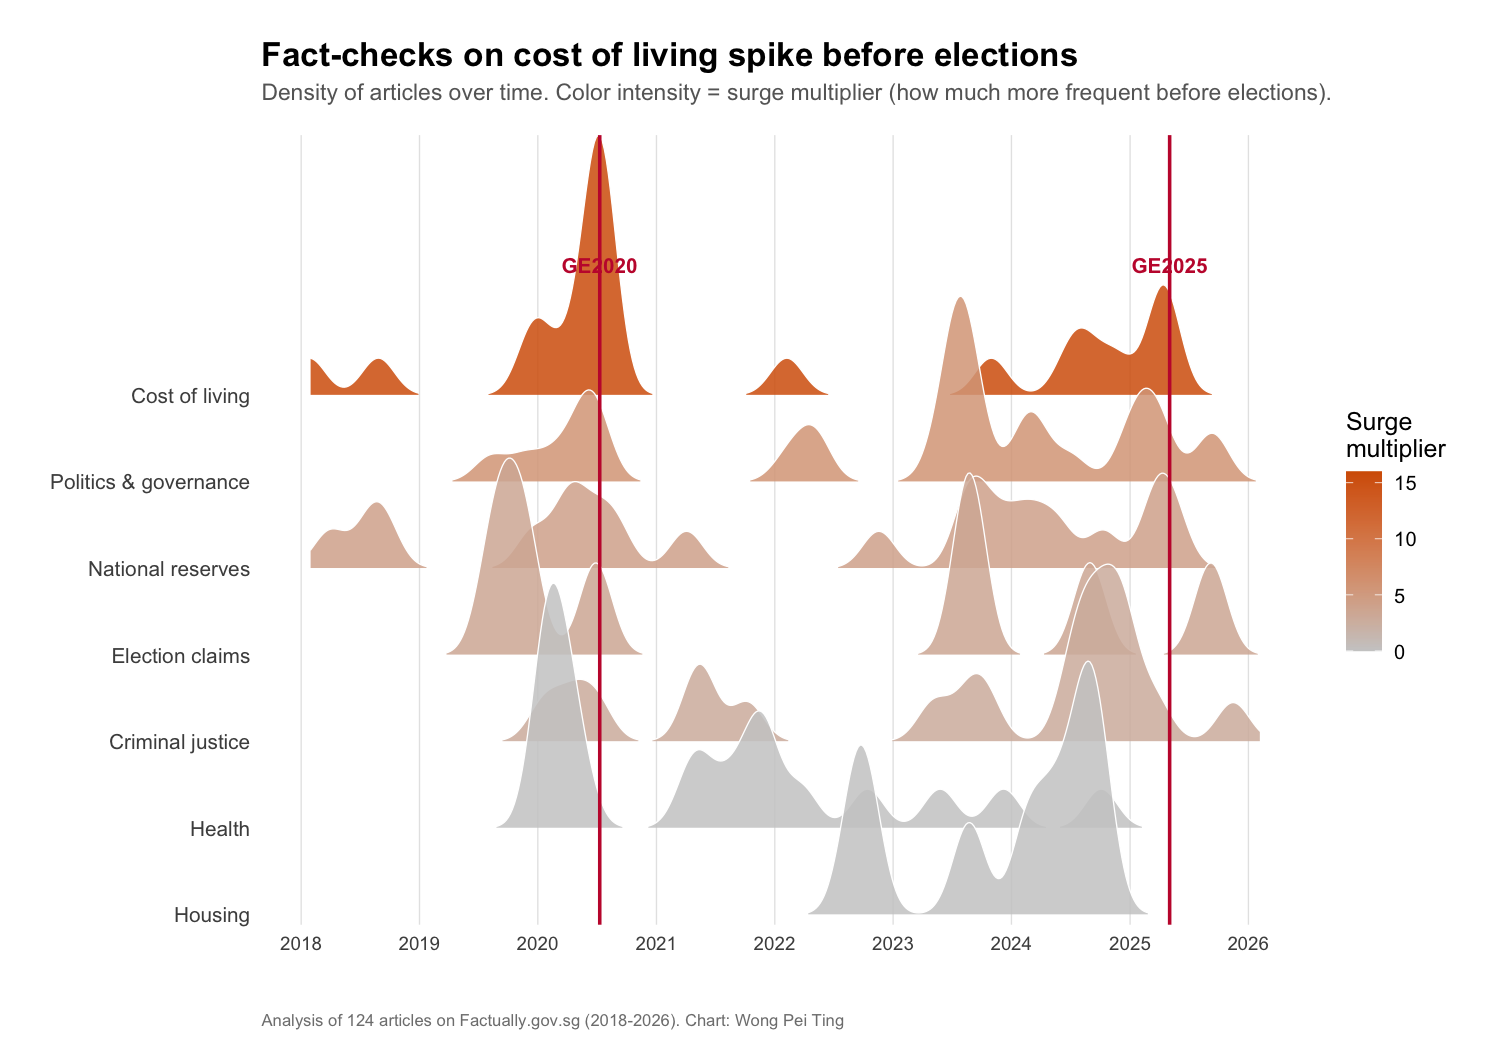

In [31]:
%%R -w 10 -h 7 --units in -r 150
# ============================================================================
# RIDGELINE PLOT - With gradient fill based on surge multiplier
# ============================================================================

library(ggridges)

# Calculate surge multiplier for each topic (for gradient coloring)
surge_data <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    n_window = sum(before_ge),
    n_baseline = sum(!before_ge),
    .groups = "drop"
  ) %>%
  mutate(
    surge = ifelse(n_baseline > 0 & n_window > 0,
                   (n_window / before_days) / (n_baseline / baseline_days), 0)
  )

# Join surge values back to main data
df <- df %>%
  left_join(surge_data %>% select(new_topic_merged, surge), by = "new_topic_merged")

# Order topics by surge (highest at top)
topic_order <- c(
  "Housing", "Health", "Criminal Justice", "Election Claims",
  "National Reserves", "Politics & Governance", "Cost of Living"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)

# Create the ridgeline plot with gradient fill
ridgeline_plot <- ggplot(df, aes(x = date, y = new_topic_merged, fill = surge)) +
  geom_density_ridges(
    scale = 3,
    alpha = 0.85,
    bandwidth = 50,
    rel_min_height = 0.005,
    color = "white",
    linewidth = 0.3
  ) +
  
  # Election lines
  geom_vline(xintercept = ge2020, linetype = "solid", color = "#C41E3A", linewidth = 0.8) +
  geom_vline(xintercept = ge2025, linetype = "solid", color = "#C41E3A", linewidth = 0.8) +
  
  # Election labels
  annotate("text", x = ge2020, y = 8.5, label = "GE2020", 
           color = "#C41E3A", size = 3.5, fontface = "bold") +
  annotate("text", x = ge2025, y = 8.5, label = "GE2025", 
           color = "#C41E3A", size = 3.5, fontface = "bold") +
  
  # Gradient color scale - low surge = grey, high surge = orange
  scale_fill_gradient(
    low = "#CCCCCC",
    high = "#D55E00",
    name = "Surge\nmultiplier",
    breaks = c(0, 5, 10, 15),
    limits = c(0, 16)
  ) +
  
  scale_x_date(
    date_breaks = "1 year", 
    date_labels = "%Y",
    limits = c(min(df$date), ANALYSIS_END_DATE)
  ) +
  scale_y_discrete(
    expand = expansion(mult = c(0.02, 0.15)),
    labels = c(
      "Cost of Living" = "Cost of living",
      "Politics & Governance" = "Politics & governance",
      "National Reserves" = "National reserves",
      "Election Claims" = "Election claims",
      "Criminal Justice" = "Criminal justice",
      "Health" = "Health",
      "Housing" = "Housing"
    )
  ) +
  coord_cartesian(clip = "off") +
  
  labs(
    title = "Fact-checks on cost of living spike before elections",
    subtitle = "Density of articles over time. Color intensity = surge multiplier (how much more frequent before elections).",
    x = "",
    y = "",
    caption = "Analysis of 124 articles on Factually.gov.sg (2018-2026). Chart: Wong Pei Ting"
  ) +
  
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 16, margin = margin(b = 5)),
    plot.subtitle = element_text(color = "grey40", size = 11, margin = margin(b = 15)),
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 9),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey90", linewidth = 0.3),
    plot.margin = margin(20, 20, 10, 10),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0, margin = margin(t = 15)),
    legend.position = "right"
  )

ridgeline_plot


## DATA COMPOSITION NOTE

**Important clarification:** The dataset contains **124 Factually.gov.sg articles**, NOT just POFMA articles.

| Type | Count | % |
|------|-------|---|
| Articles WITH POFMA correction orders | 85 | 69% |
| Explainers WITHOUT POFMA orders | 39 | 31% |

The 39 non-POFMA articles are general explainers (e.g., "Where does Government revenue come from?") that don't result in formal correction directions.

**Framing matters:**
- ✅ "Factually.gov.sg articles" (accurate)
- ❌ "POFMA-linked articles" (misleading - includes non-POFMA content)

Below: Analysis comparing POFMA vs non-POFMA article patterns.

In [32]:
%%R
# ============================================================================
# POFMA VS NON-POFMA: Setup and Basic Statistics
# ============================================================================
# Create a clean flag for POFMA status based on pofma_ed column

# Ensure variables exist (in case data-preparation cell wasn't run)
if (!exists("total_days")) {
  total_days <- as.numeric(ANALYSIS_END_DATE - min(df$date))
}
if (!exists("before_days")) {
  before_days <- WINDOW_DAYS * 2
}

# Create POFMA flag
df <- df %>%
  mutate(
    has_pofma_order = (pofma_ed == "Yes"),
    pofma_label = ifelse(has_pofma_order, "Correction (tied to POFMA order)", "Explainer or clarification (no POFMA order)")
  )

cat("=== DATA COMPOSITION ===", "\n\n")
cat("Total articles:", nrow(df), "\n")
cat("Correction (tied to POFMA order):", sum(df$has_pofma_order), "(", round(mean(df$has_pofma_order)*100, 1), "%)\n")
cat("Without POFMA order:", sum(!df$has_pofma_order), "(", round(mean(!df$has_pofma_order)*100, 1), "%)\n")

cat("\n=== PRE-ELECTION CLUSTERING BY POFMA STATUS ===", "\n\n")

pofma_clustering <- df %>%
  group_by(has_pofma_order) %>%
  summarise(
    total = n(),
    in_window = sum(before_ge),
    pct_in_window = round(in_window / total * 100, 1),
    .groups = "drop"
  ) %>%
  mutate(
    expected_pct = round(before_days / total_days * 100, 1),
    surge_ratio = round(pct_in_window / expected_pct, 1),
    type = ifelse(has_pofma_order, "POFMA orders", "Explainers")
  )

print(pofma_clustering)

cat("\nKEY FINDING:\n")
pofma_surge <- pofma_clustering$surge_ratio[pofma_clustering$has_pofma_order == TRUE]
explainer_surge <- pofma_clustering$surge_ratio[pofma_clustering$has_pofma_order == FALSE]
cat("POFMA orders cluster", pofma_surge, "x more than expected before elections.\n")
cat("Explainers cluster", explainer_surge, "x more than expected before elections.\n")

=== DATA COMPOSITION === 

Total articles: 124 
Correction (tied to POFMA order): 85 ( 68.5 %)
Without POFMA order: 39 ( 31.5 %)

=== PRE-ELECTION CLUSTERING BY POFMA STATUS === 

# A tibble: 2 × 7
  has_pofma_order total in_window pct_in_window expected_pct surge_ratio type   
  <lgl>           <int>     <int>         <dbl>        <dbl>       <dbl> <chr>  
1 FALSE              39        11          28.2          4.1         6.9 Explai…
2 TRUE               85         9          10.6          4.1         2.6 POFMA …

KEY FINDING:
POFMA orders cluster 2.6 x more than expected before elections.
Explainers cluster 6.9 x more than expected before elections.


In [33]:
%%R
# ============================================================================
# POFMA VS NON-POFMA: Topic-level breakdown
# ============================================================================
# Which topics have more POFMA orders vs explainers?
# Does the pre-election clustering differ?

topic_pofma_breakdown <- df %>%
  group_by(new_topic_merged, has_pofma_order) %>%
  summarise(
    total = n(),
    in_window = sum(before_ge),
    pct_in_window = round(in_window / total * 100, 1),
    .groups = "drop"
  ) %>%
  mutate(
    type = ifelse(has_pofma_order, "POFMA", "Explainer")
  ) %>%
  select(new_topic_merged, type, total, in_window, pct_in_window) %>%
  arrange(new_topic_merged, desc(type))

cat("=== TOPIC-LEVEL BREAKDOWN: POFMA vs EXPLAINERS ===", "\n\n")
print(topic_pofma_breakdown, n = 20)

# Pivot for easier comparison
cat("\n=== COMPARISON TABLE ===", "\n\n")
topic_comparison <- topic_pofma_breakdown %>%
  pivot_wider(
    names_from = type,
    values_from = c(total, in_window, pct_in_window),
    values_fill = 0
  )
print(topic_comparison)

=== TOPIC-LEVEL BREAKDOWN: POFMA vs EXPLAINERS === 

# A tibble: 13 × 5
   new_topic_merged      type      total in_window pct_in_window
   <fct>                 <chr>     <int>     <int>         <dbl>
 1 Housing               POFMA         6         0           0  
 2 Housing               Explainer     2         0           0  
 3 Health                POFMA        17         0           0  
 4 Health                Explainer     2         0           0  
 5 Criminal Justice      POFMA        19         2          10.5
 6 Election Claims       POFMA         4         0           0  
 7 Election Claims       Explainer     4         1          25  
 8 National Reserves     POFMA         9         1          11.1
 9 National Reserves     Explainer    11         2          18.2
10 Politics & Governance POFMA        26         4          15.4
11 Politics & Governance Explainer     4         2          50  
12 Cost of Living        POFMA         4         2          50  
13 Cost of Living 

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


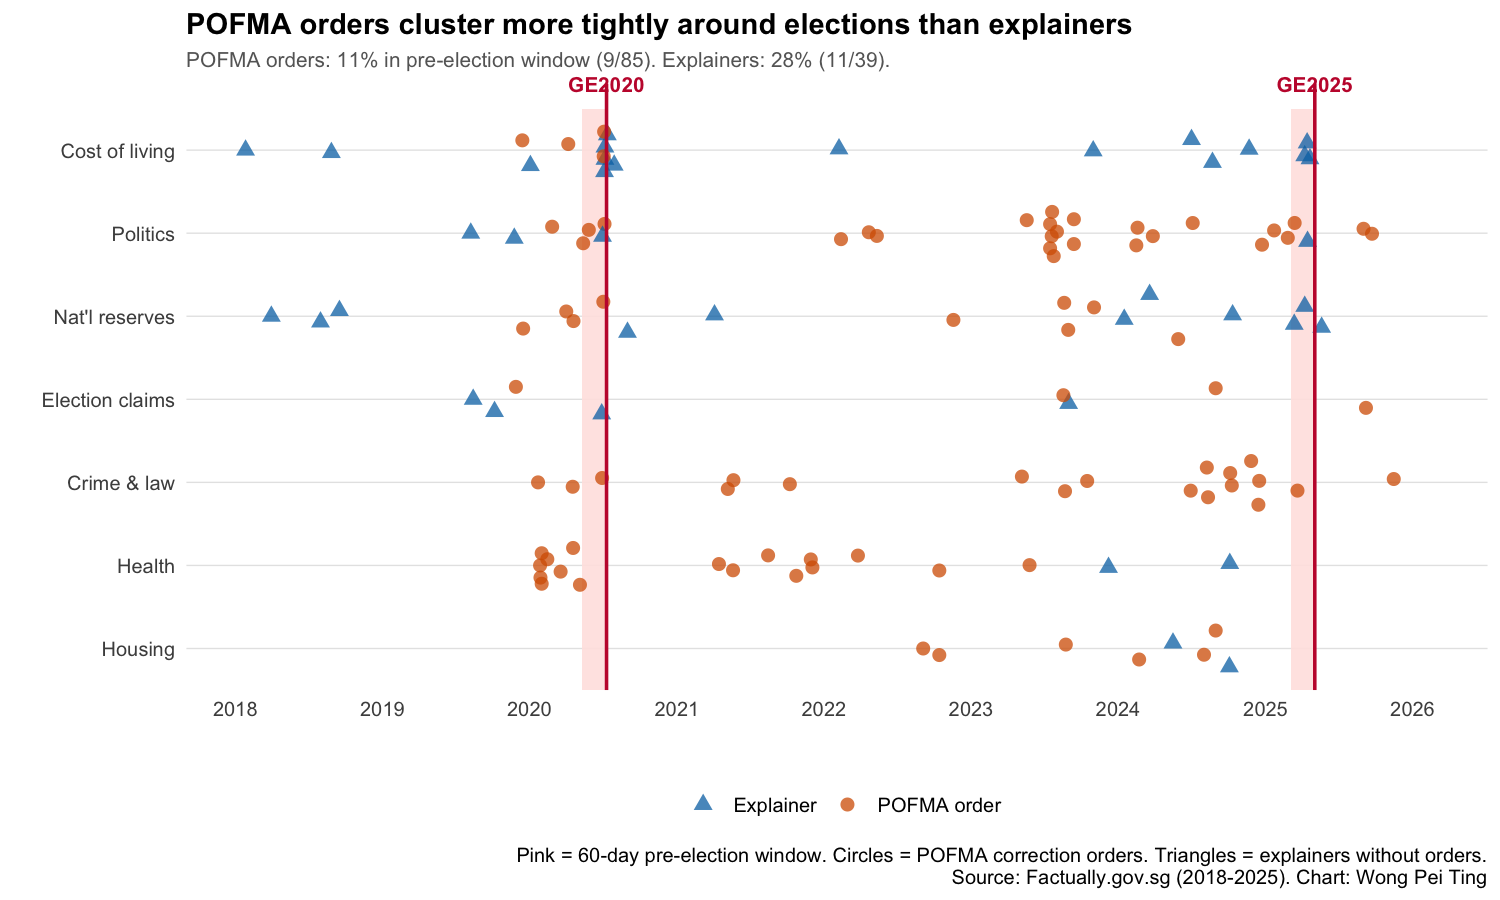

In [34]:
%%R -w 10 -h 6 --units in -r 150
# ============================================================================
# VISUALIZATION: POFMA Orders vs Explainers - Timeline Comparison
# ============================================================================
# This chart answers: Do POFMA correction orders cluster differently
# around elections compared to general explainers?
#
# Key insight: POFMA orders (enforcement) may show stronger pre-election
# clustering than explainers (education), suggesting enforcement intensifies
# during campaign periods.

# Topic order
topic_order <- c(
  "Housing", "Health", "Criminal Justice", "Election Claims",
  "National Reserves", "Politics & Governance", "Cost of Living"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)

start_date <- min(df$date, na.rm = TRUE)
end_date <- ANALYSIS_END_DATE

# Window rectangles
window_data <- data.frame(
  xmin = c(ge2020 - WINDOW_DAYS, ge2025 - WINDOW_DAYS),
  xmax = c(ge2020, ge2025),
  ymin = 0.5, ymax = 7.5
)

# Stats for subtitle
pofma_in_window <- sum(df$before_ge & df$has_pofma_order)
pofma_total <- sum(df$has_pofma_order)
pofma_pct <- round(pofma_in_window / pofma_total * 100, 0)

explainer_in_window <- sum(df$before_ge & !df$has_pofma_order)
explainer_total <- sum(!df$has_pofma_order)
explainer_pct <- round(explainer_in_window / explainer_total * 100, 0)

pofma_comparison_plot <- ggplot() +
  # Shaded election windows
  geom_rect(
    data = window_data,
    aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
    fill = "#FFE4E1", alpha = 0.9
  ) +
  
  # Beeswarm - shape distinguishes POFMA vs explainer
  geom_quasirandom(
    data = df,
    aes(x = date, y = new_topic_merged, 
        color = has_pofma_order,
        shape = has_pofma_order),
    size = 2.8,
    alpha = 0.75,
    groupOnX = FALSE,
    width = 0.3
  ) +
  
  # Election lines
  geom_vline(xintercept = ge2020, color = "#C41E3A", linewidth = 0.8) +
  geom_vline(xintercept = ge2025, color = "#C41E3A", linewidth = 0.8) +
  annotate("text", x = ge2020, y = 7.8, label = "GE2020",
           color = "#C41E3A", size = 3.5, fontface = "bold") +
  annotate("text", x = ge2025, y = 7.8, label = "GE2025",
           color = "#C41E3A", size = 3.5, fontface = "bold") +
  
  scale_color_manual(
    values = c("TRUE" = "#D55E00", "FALSE" = "#0072B2"),
    labels = c("TRUE" = "POFMA order", "FALSE" = "Explainer"),
    name = ""
  ) +
  scale_shape_manual(
    values = c("TRUE" = 16, "FALSE" = 17),  # circle vs triangle
    labels = c("TRUE" = "POFMA order", "FALSE" = "Explainer"),
    name = ""
  ) +
  scale_x_date(
    limits = c(start_date, end_date),
    date_breaks = "1 year",
    date_labels = "%Y"
  ) +
  scale_y_discrete(
    labels = c(
      "Housing" = "Housing", "Health" = "Health",
      "Criminal Justice" = "Crime & law", "Election Claims" = "Election claims",
      "National Reserves" = "Nat'l reserves", "Politics & Governance" = "Politics",
      "Cost of Living" = "Cost of living"
    ),
    expand = expansion(mult = c(0.05, 0.1))
  ) +
  coord_cartesian(clip = "off") +
  labs(
    title = "POFMA orders cluster more tightly around elections than explainers",
    subtitle = paste0("POFMA orders: ", pofma_pct, "% in pre-election window (", pofma_in_window, "/", pofma_total, 
                      "). Explainers: ", explainer_pct, "% (", explainer_in_window, "/", explainer_total, ")."),
    x = "", y = "",
    caption = "Pink = 60-day pre-election window. Circles = POFMA correction orders. Triangles = explainers without orders.\nSource: Factually.gov.sg (2018-2025). Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40", size = 10),
    legend.position = "bottom",
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.3),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  )

print(pofma_comparison_plot)

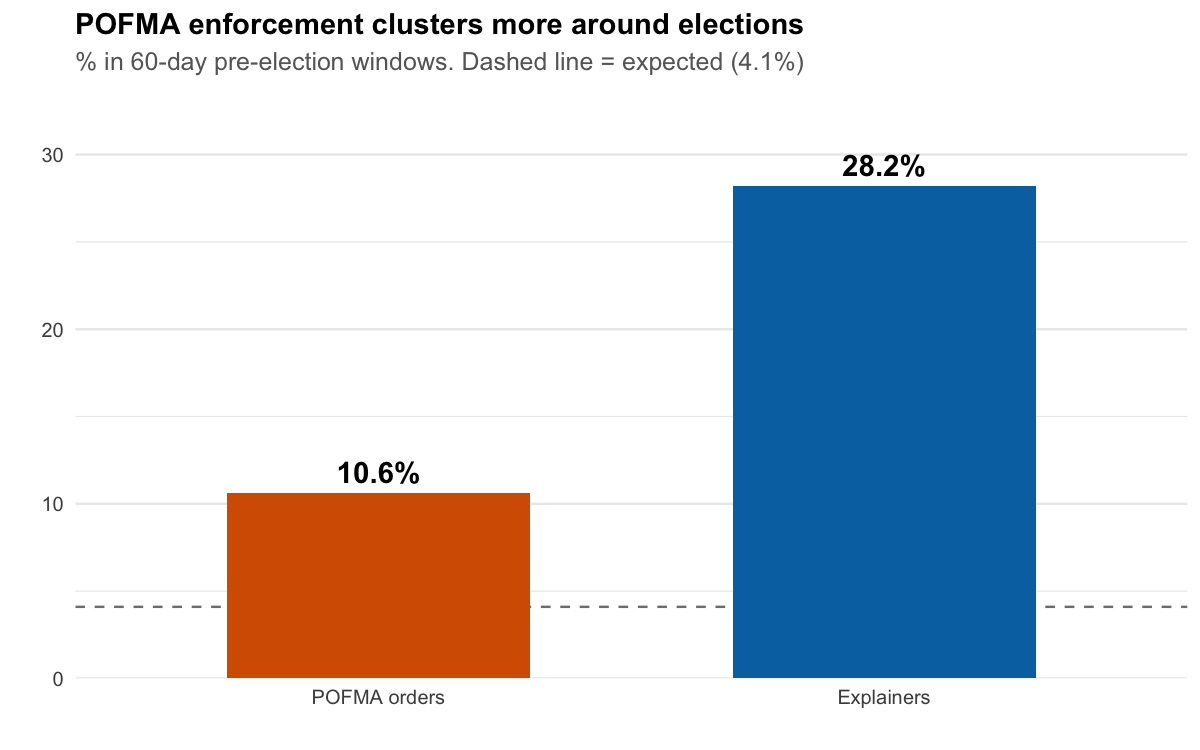

In [35]:
%%R -w 8 -h 5 --units in -r 150
# POFMA vs Explainer Clustering Comparison

# Calculate clustering stats
clustering_comparison <- df %>%
  group_by(has_pofma_order) %>%
  summarise(
    total = n(),
    in_window = sum(before_ge),
    pct = round(in_window / total * 100, 1),
    .groups = "drop"
  ) %>%
  mutate(
    type = ifelse(has_pofma_order, "POFMA orders", "Explainers"),
    type = factor(type, levels = c("POFMA orders", "Explainers"))
  )

expected_pct <- round(before_days / total_days * 100, 1)

ggplot(clustering_comparison, aes(x = type, y = pct, fill = has_pofma_order)) +
  geom_hline(yintercept = expected_pct, linetype = "dashed", color = "grey50") +
  geom_col(width = 0.6) +
  geom_text(aes(label = paste0(pct, "%")), vjust = -0.5, size = 5, fontface = "bold") +
  scale_fill_manual(values = c("TRUE" = "#D55E00", "FALSE" = "#0072B2"), guide = "none") +
  scale_y_continuous(limits = c(0, max(clustering_comparison$pct) * 1.2), expand = c(0, 0)) +
  labs(
    title = "POFMA enforcement clusters more around elections",
    subtitle = paste0("% in 60-day pre-election windows. Dashed line = expected (", expected_pct, "%)"),
    x = "", y = ""
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40"),
    panel.grid.major.x = element_blank()
  )


In [36]:
%%R
# ============================================================================
# STATISTICAL TEST: Is POFMA clustering significantly different from explainers?
# ============================================================================
# Chi-square test comparing pre-election clustering rates

cat("=== CHI-SQUARE TEST: POFMA vs Explainer Clustering ===", "\n\n")

# Create contingency table
contingency <- table(
  df$has_pofma_order,
  df$before_ge
)
rownames(contingency) <- c("Explainer", "POFMA order")
colnames(contingency) <- c("Outside window", "In window")

cat("Contingency table:\n")
print(contingency)

cat("\n")

# Chi-square test
chi_test <- chisq.test(contingency)
print(chi_test)

cat("\nINTERPRETATION:\n")
if (chi_test$p.value < 0.05) {
  cat("p =", round(chi_test$p.value, 4), "< 0.05\n")
  cat("The difference in pre-election clustering between POFMA orders and\n")
  cat("explainers IS statistically significant.\n")
} else {
  cat("p =", round(chi_test$p.value, 4), ">= 0.05\n")
  cat("The difference in pre-election clustering between POFMA orders and\n")
  cat("explainers is NOT statistically significant.\n")
  cat("\nThis means: Both POFMA orders and explainers cluster similarly around elections.\n")
  cat("The election effect applies to ALL Factually content, not just enforcement.\n")
}

=== CHI-SQUARE TEST: POFMA vs Explainer Clustering === 

Contingency table:
             
              Outside window In window
  Explainer               28        11
  POFMA order             76         9


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency
X-squared = 4.9002, df = 1, p-value = 0.02685


INTERPRETATION:
p = 0.0269 < 0.05
The difference in pre-election clustering between POFMA orders and
explainers IS statistically significant.


Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


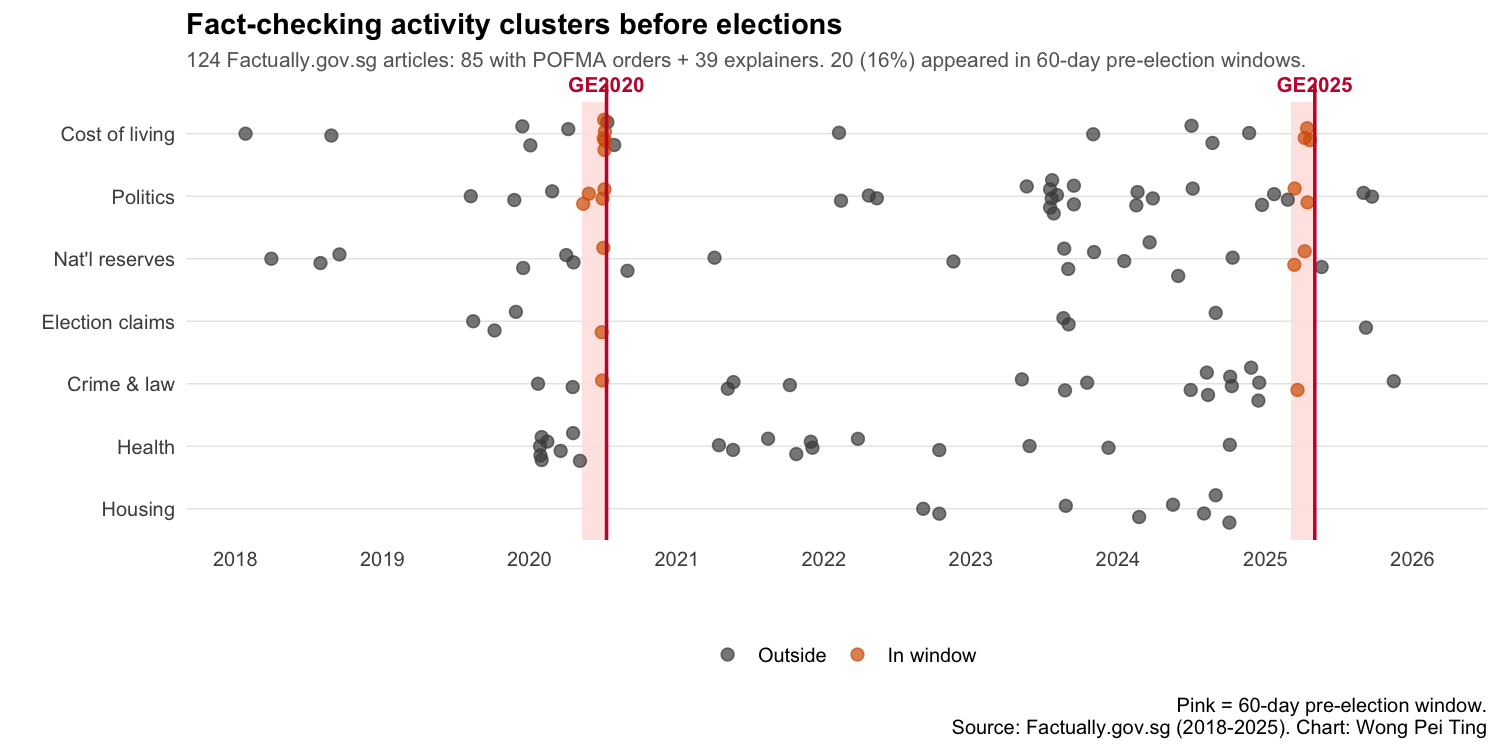

In [37]:
%%R -w 10 -h 5 --units in -r 150
# ============================================================================
# CORRECTED FRAMING: All Factually.gov.sg Articles
# ============================================================================
# This is the ACCURATE version - includes both POFMA orders AND explainers
# Subtitle correctly describes the data composition

topic_order <- c(
  "Housing", "Health", "Criminal Justice", "Election Claims",
  "National Reserves", "Politics & Governance", "Cost of Living"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)

start_date <- min(df$date, na.rm = TRUE)
end_date <- ANALYSIS_END_DATE

window_data <- data.frame(
  xmin = c(ge2020 - WINDOW_DAYS, ge2025 - WINDOW_DAYS),
  xmax = c(ge2020, ge2025),
  ymin = 0.5, ymax = 7.5
)

n_total <- nrow(df)
n_pofma <- sum(df$has_pofma_order)
n_explainer <- sum(!df$has_pofma_order)
n_window <- sum(df$before_ge)
pct_window <- round(n_window / n_total * 100, 0)

corrected_plot <- ggplot() +
  geom_rect(data = window_data, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
            fill = "#FFE4E1", alpha = 0.9) +
  geom_quasirandom(data = df, aes(x = date, y = new_topic_merged, color = before_ge),
                   size = 2.5, alpha = 0.7, groupOnX = FALSE, width = 0.3) +
  geom_vline(xintercept = ge2020, color = "#C41E3A", linewidth = 0.8) +
  geom_vline(xintercept = ge2025, color = "#C41E3A", linewidth = 0.8) +
  annotate("text", x = ge2020, y = 7.8, label = "GE2020", color = "#C41E3A", size = 3.5, fontface = "bold") +
  annotate("text", x = ge2025, y = 7.8, label = "GE2025", color = "#C41E3A", size = 3.5, fontface = "bold") +
  scale_color_manual(values = c("TRUE" = "#D55E00", "FALSE" = "#4A4A4A"),
                     labels = c("TRUE" = "In window", "FALSE" = "Outside"), name = "") +
  scale_x_date(limits = c(start_date, end_date), date_breaks = "1 year", date_labels = "%Y") +
  scale_y_discrete(labels = c("Housing" = "Housing", "Health" = "Health",
                              "Criminal Justice" = "Crime & law", "Election Claims" = "Election claims",
                              "National Reserves" = "Nat'l reserves", "Politics & Governance" = "Politics",
                              "Cost of Living" = "Cost of living"),
                   expand = expansion(mult = c(0.05, 0.1))) +
  coord_cartesian(clip = "off") +
  labs(
    title = "Fact-checking activity clusters before elections",
    subtitle = paste0(n_total, " Factually.gov.sg articles: ", n_pofma, " with POFMA orders + ", n_explainer, 
                      " explainers. ", n_window, " (", pct_window, "%) appeared in 60-day pre-election windows."),
    x = "", y = "",
    caption = "Pink = 60-day pre-election window.\nSource: Factually.gov.sg (2018-2025). Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40", size = 10),
    legend.position = "bottom",
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.3),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  )

print(corrected_plot)

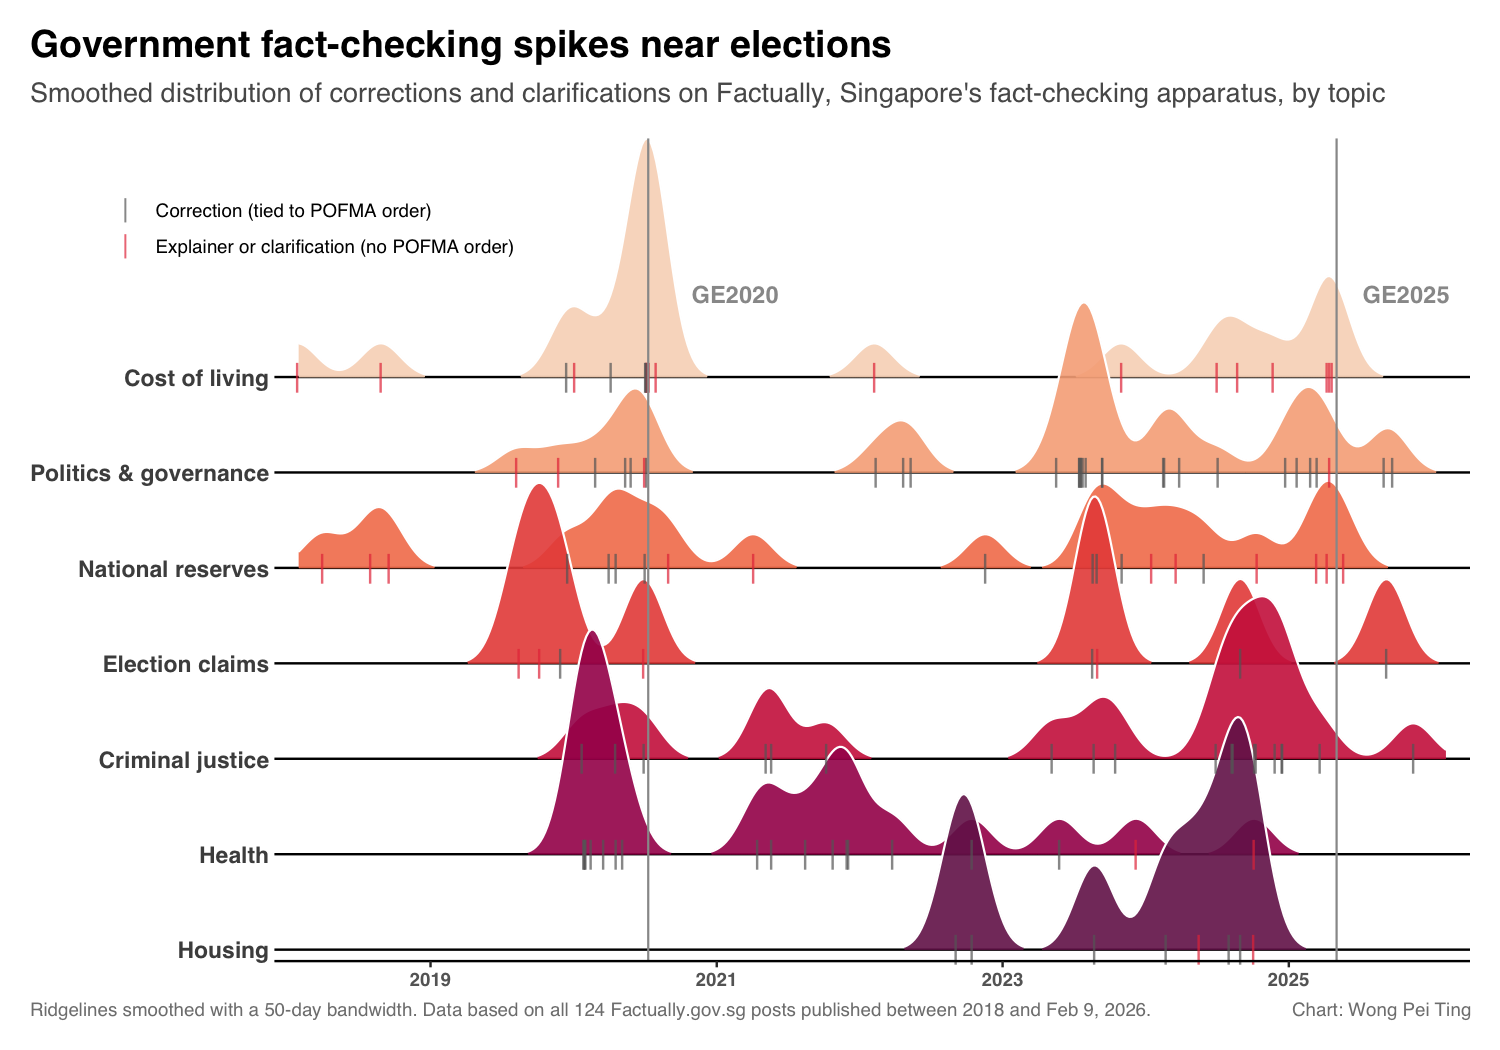

In [ ]:
%%R -w 10 -h 7 --units in -r 150
# ============================================================================
# (IN ONE CHART USED IN FINAL STORY) RIDGELINE PLOT with RUG PLOT showing POFMA vs non-POFMA posts by topic
# ============================================================================
# Uses geom_density_ridges_gradient for smooth color transitions
# Rug marks appear on each topic's ridge line

library(ggthemes)
library(ggridges)

# Topic order
topic_order <- c(
  "Housing", "Health", "Criminal Justice", "Election Claims",
  "National Reserves", "Politics & Governance", "Cost of Living"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)
y_top <- length(topic_order) + 0.6

# Create ridgeline with gradient fill + rug marks per topic
ggplot(df, aes(x = date, y = new_topic_merged)) +
  
  # Ridgeline layer (gradient fill)
  geom_density_ridges_gradient(
    aes(fill = stat(y)),
    scale = 2.5,
    rel_min_height = 0.01,
    gradient_lwd = 0.5,
    bandwidth = 50, 
    color = "white",
    linewidth = 0.5
  ) +
  
  # Rug marks on each topic's baseline (vertical lines)
  geom_point(
    aes(color = pofma_label),
    shape = "|",
    size = 5,
    alpha = 0.7
  ) +
  
  # Election lines
  geom_vline(xintercept = ge2020, color = "grey60", linewidth = 0.5, linetype = "solid") +
  geom_vline(xintercept = ge2025, color = "grey60", linewidth = 0.5, linetype = "solid") +

  annotate("text", x = ge2020, y = y_top, label = "GE2020",
           family = "Helvetica", color = "grey60", size = 4, fontface = "bold", hjust = -0.5, vjust = -1) +
  annotate("text", x = ge2025, y = y_top, label = "GE2025",
           family = "Helvetica", color = "grey60", size = 4, fontface = "bold", hjust = -0.3, vjust = -1) +
  
  # Viridis color scale for ridgeline fill
  scale_fill_viridis_c(
    option = "F",
    alpha = 0.9,
    begin = 0.3,
    end = 0.95,
    guide = "none"
  ) +
  
  # Manual color scale for rug marks
  scale_color_manual(
    values = c("Correction (tied to POFMA order)" = "grey40", "Explainer or clarification (no POFMA order)" = "#E63946"),
    name = NULL
  ) +
  
  scale_x_date(
    date_breaks = "2 years",
    date_labels = "%Y",
    limits = c(min(df$date), ANALYSIS_END_DATE),
    expand = expansion(mult = c(0.02, 0.02))
  ) +
  
  scale_y_discrete(
    expand = expansion(mult = c(0.02, 0.15)),
    labels = c(
      "Cost of Living" = "Cost of living",
      "Politics & Governance" = "Politics & governance",
      "National Reserves" = "National reserves",
      "Election Claims" = "Election claims",
      "Criminal Justice" = "Criminal justice",
      "Health" = "Health",
      "Housing" = "Housing"
    )
  ) +
  coord_cartesian(clip = "off") +
  
  labs(
    title = "Government fact-checking spikes near elections",
    subtitle = "Smoothed distribution of corrections and clarifications on Factually, Singapore's fact-checking apparatus, by topic",
    x = NULL,
    y = NULL,
    caption = "Ridgelines smoothed with a 50-day bandwidth. Data based on all 124 Factually.gov.sg posts published between 2018 and Feb 9, 2026.                           Chart: Wong Pei Ting"
  ) +
  
  theme_wsj(base_size = 12) +
  theme(
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA),
    panel.grid = element_blank(),
    axis.text.y = element_text(family = "Helvetica", size = 11, face = "bold"),
    axis.text.x = element_text(family = "Helvetica", size = 9, color = "grey40"),
    axis.title = element_blank(),
    plot.title.position = "plot",
    plot.caption.position = "plot",
    plot.title = element_text(
      family = "Helvetica",
      face = "bold",
      size = 18,
      margin = margin(b = 8),
      hjust = 0
    ),
    plot.subtitle = element_text(
      family = "Helvetica",
      size = 13,
      color = "grey35",
      margin = margin(b = 15)
    ),
    plot.caption = element_text(
      family = "Helvetica",
      size = 9,
      color = "grey50",
      hjust = 0
    ),
    legend.position = c(-0.15, 0.95),  # x, y inside plot (0–1 range)
  legend.justification = c(0, 1),   # anchor top-left corner of legend
  legend.direction = "vertical",
  legend.background = element_rect(
    fill = "white",
    color = "grey80",
    linewidth = 0.3
  ),
  legend.key = element_blank(),
  legend.text = element_text(family = "Helvetica", size = 9),
  legend.box.margin = margin(4, 4, 4, 4)
  ) +
  guides(color = guide_legend(override.aes = list(size = 4)))

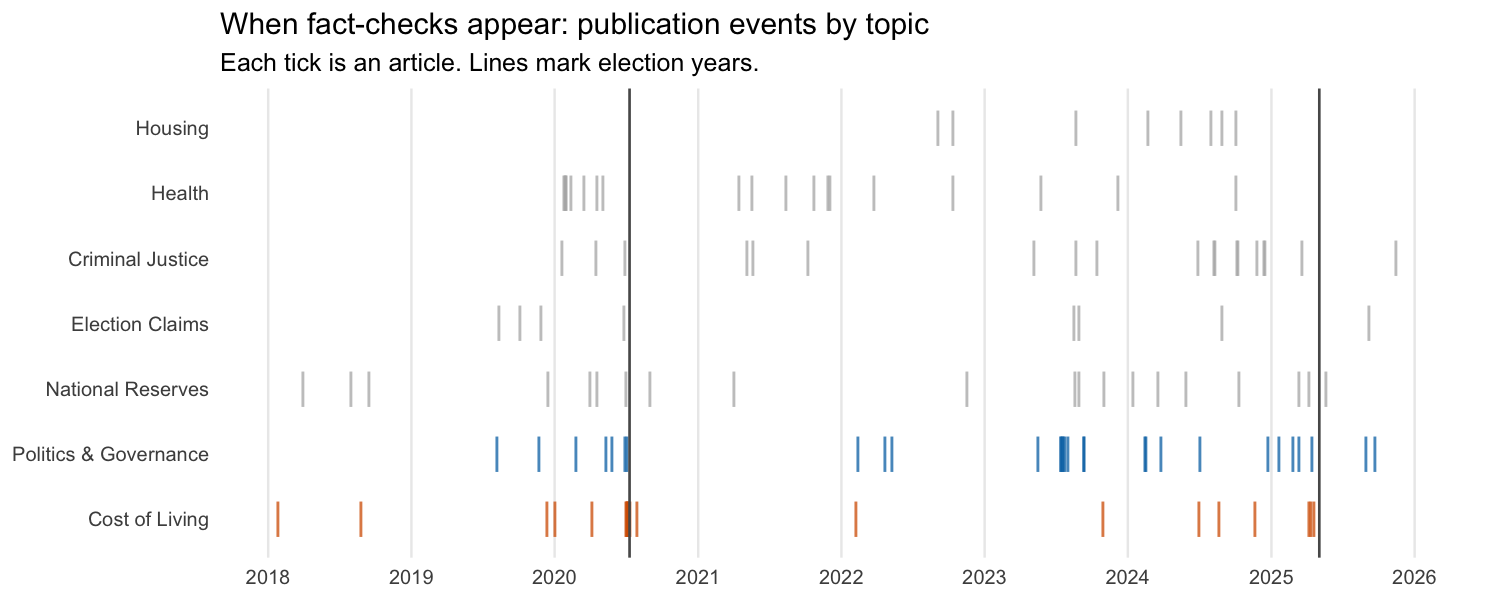

In [39]:
%%R -w 10 -h 4 --units in -r 150
library(dplyr)

topic_order <- c(
  "Cost of Living", "Politics & Governance", "National Reserves",
  "Election Claims", "Criminal Justice", "Health", "Housing"
)

df <- df %>%
  mutate(new_topic_merged = factor(new_topic_merged, levels = topic_order),
         topic_hi = ifelse(new_topic_merged %in% c("Cost of Living","Politics & Governance"),
                           as.character(new_topic_merged), "Other"))

col_map <- c("Cost of Living"="#D55E00","Politics & Governance"="#0072B2","Other"="grey70")

ggplot(df, aes(x = date, y = new_topic_merged, color = topic_hi)) +
  geom_point(shape = "|", size = 6, alpha = 0.75) +
  geom_vline(xintercept = ge2020, color = "grey35", linewidth = 0.6) +
  geom_vline(xintercept = ge2025, color = "grey35", linewidth = 0.6) +
  scale_color_manual(values = col_map, guide = "none") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y",
               limits = c(min(df$date), ANALYSIS_END_DATE)) +
  labs(
    title = "When fact-checks appear: publication events by topic",
    subtitle = "Each tick is an article. Lines mark election years.",
    x = NULL, y = NULL
  ) +
  theme_minimal(base_size = 12) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank()
  )

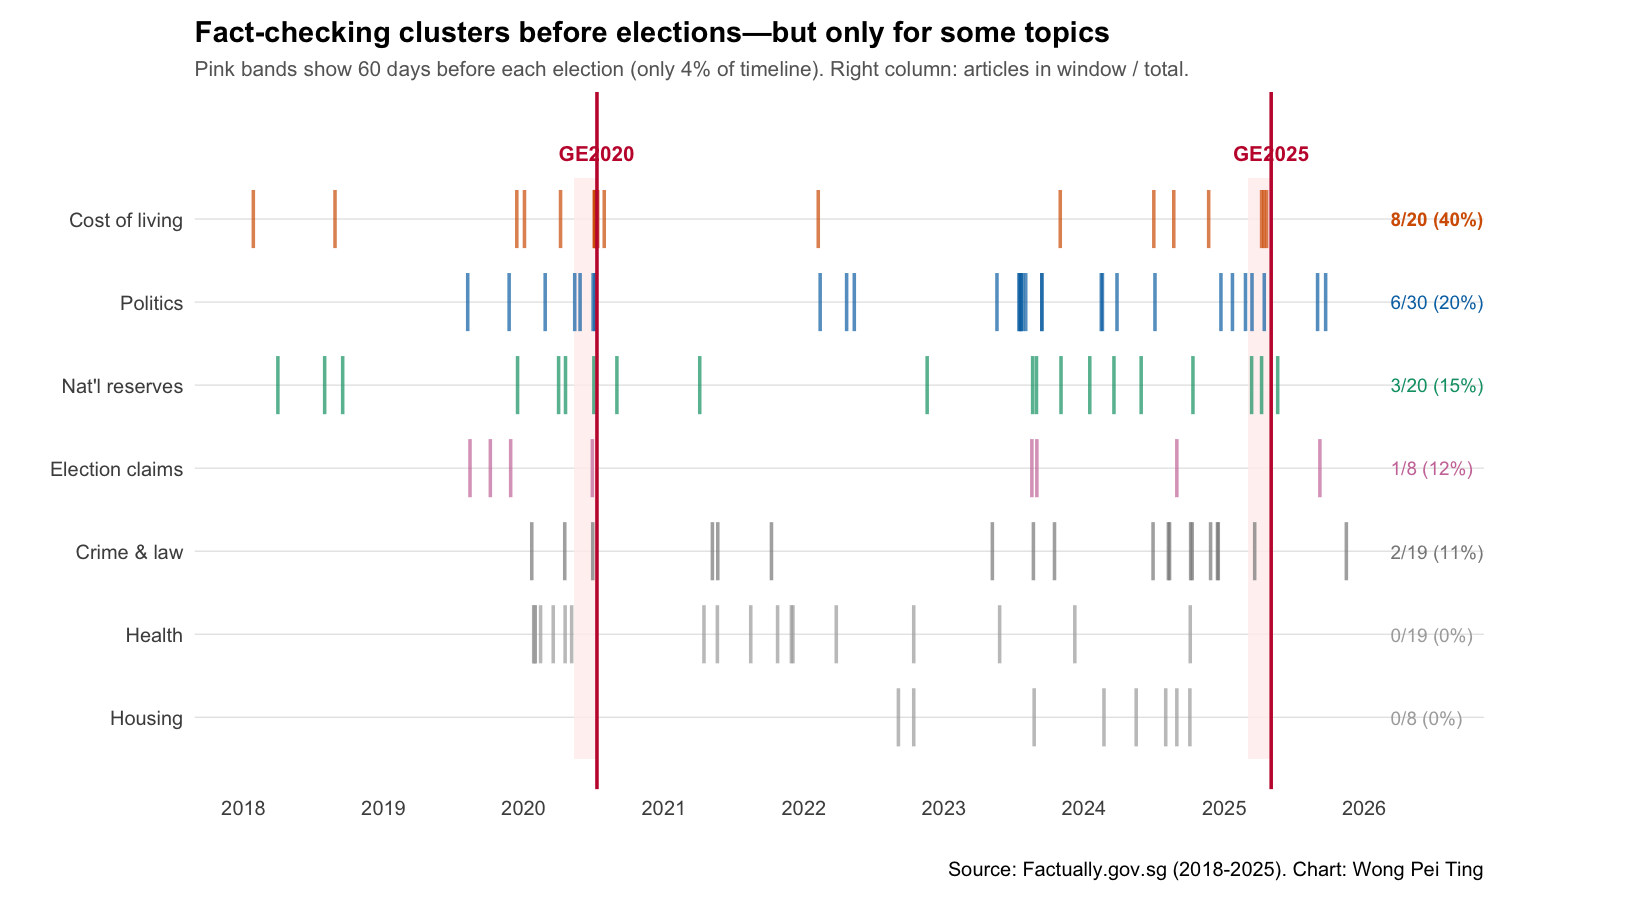

In [40]:
%%R -w 11 -h 6 --units in -r 150
# ============================================================================
# EVENT TIMELINE - Discrete marks, explicit election windows
# ============================================================================
# Fixes the ridgeline's problems:
# 1. Uses discrete marks (vertical ticks) instead of density smoothing
# 2. Shades the 60-day pre-election windows explicitly
# 3. Shows exact article counts in each window
# 4. Contrast between high-surge and no-pattern topics is unmistakable

# Topic order by surge (highest at top)
topic_order <- c(
  "Housing", "Health", "Criminal Justice", "Election Claims",
  "National Reserves", "Politics & Governance", "Cost of Living"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)

# Calculate per-topic stats for annotation
topic_stats <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    total = n(),
    in_window = sum(before_ge),
    pct = round(in_window / total * 100, 0),
    .groups = "drop"
  ) %>%
  mutate(
    label = paste0(in_window, "/", total, " (", pct, "%)"),
    # Color based on surge
    highlight = pct > 20  # Highlight topics with >20% in window
  )

# Colors: vivid for high-surge, muted for others
topic_colors <- c(
  "Cost of Living" = "#D55E00",
  "Politics & Governance" = "#0072B2",
  "National Reserves" = "#009E73",
  "Election Claims" = "#CC79A7",
  "Criminal Justice" = "#888888",
  "Health" = "#AAAAAA",
  "Housing" = "#AAAAAA"
)

# Create date ranges
start_date <- min(df$date, na.rm = TRUE)
end_date <- ANALYSIS_END_DATE

# Election window rectangles
window_data <- data.frame(
  xmin = c(ge2020 - WINDOW_DAYS, ge2025 - WINDOW_DAYS),
  xmax = c(ge2020, ge2025),
  ymin = 0.5,
  ymax = 7.5,
  election = c("GE2020", "GE2025")
)

# Overall stats for subtitle
n_total <- nrow(df)
n_window <- sum(df$before_ge)
pct_window <- round(n_window / n_total * 100, 0)
window_pct_of_time <- round(WINDOW_DAYS * 2 / as.numeric(end_date - start_date) * 100, 0)

event_timeline <- ggplot() +
  # Shaded election windows (draw first so they're behind)
  geom_rect(
    data = window_data,
    aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
    fill = "#FFEEEE", alpha = 0.8
  ) +
  
  # Vertical tick marks for each article
  geom_segment(
    data = df,
    aes(x = date, xend = date, 
        y = as.numeric(new_topic_merged) - 0.35,
        yend = as.numeric(new_topic_merged) + 0.35,
        color = new_topic_merged),
    linewidth = 0.8,
    alpha = 0.7
  ) +
  
  # Election day lines
  geom_vline(xintercept = ge2020, linetype = "solid", color = "#C41E3A", linewidth = 0.8) +
  geom_vline(xintercept = ge2025, linetype = "solid", color = "#C41E3A", linewidth = 0.8) +
  
  # Election labels at top
  annotate("text", x = ge2020, y = 7.8, label = "GE2020", 
           color = "#C41E3A", size = 3.5, fontface = "bold") +
  annotate("text", x = ge2025, y = 7.8, label = "GE2025",
           color = "#C41E3A", size = 3.5, fontface = "bold") +
  
  # Right-side annotations: articles in window / total
  geom_text(
    data = topic_stats,
    aes(x = end_date + 30, y = as.numeric(new_topic_merged), label = label,
        fontface = ifelse(highlight, "bold", "plain"),
        color = new_topic_merged),
    hjust = 0, size = 3.2
  ) +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(
    limits = c(start_date, end_date + 120),
    date_breaks = "1 year",
    date_labels = "%Y"
  ) +
  scale_y_continuous(
    breaks = 1:7,
    labels = c("Housing", "Health", "Crime & law", "Election claims",
               "Nat'l reserves", "Politics", "Cost of living"),
    expand = expansion(mult = c(0.05, 0.1))
  ) +
  coord_cartesian(clip = "off") +
  labs(
    title = "Fact-checking clusters before elections—but only for some topics",
    subtitle = paste0("Pink bands show 60 days before each election (only ", window_pct_of_time, 
                      "% of timeline). Right column: articles in window / total."),
    x = "", y = "",
    caption = "Source: Factually.gov.sg (2018-2025). Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40", size = 10),
    axis.text.y = element_text(hjust = 1),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.3),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    plot.margin = margin(10, 80, 10, 10)
  )

print(event_timeline)


--- Topic Breakdown ---
# A tibble: 7 × 7
  new_topic_merged     total in_window observed_pct expected_pct ratio deviation
  <fct>                <int>     <int>        <dbl>        <dbl> <dbl>     <dbl>
1 Cost of Living          20         8         40            4.1   9.8      35.9
2 Politics & Governan…    30         6         20            4.1   4.9      15.9
3 National Reserves       20         3         15            4.1   3.7      10.9
4 Election Claims          8         1         12.5          4.1   3         8.4
5 Criminal Justice        19         2         10.5          4.1   2.6       6.4
6 Housing                  8         0          0            4.1   0        -4.1
7 Health                  19         0          0            4.1   0        -4.1


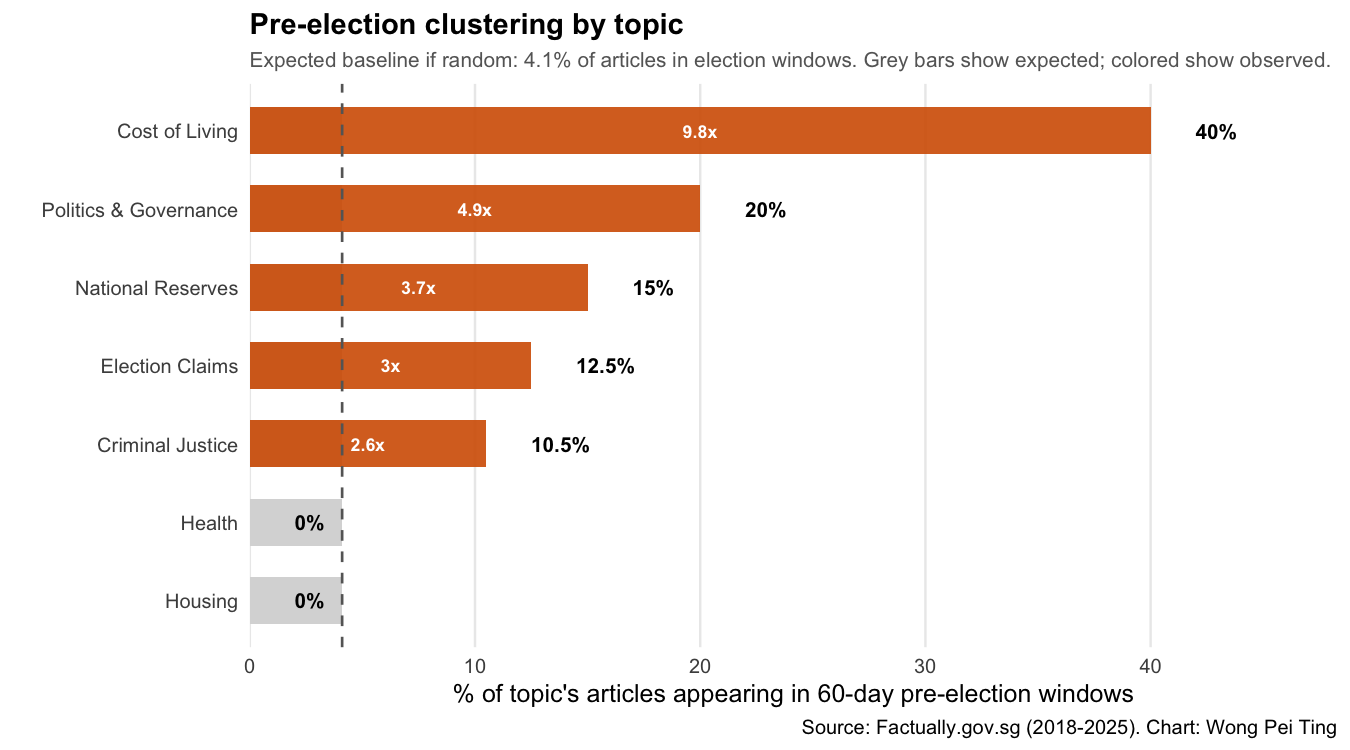

In [41]:
%%R -w 9 -h 5 --units in -r 150
# ============================================================================
# BASELINE VS OBSERVED - The "4% of time, 16% of articles" visual
# ============================================================================
# This makes the core statistical argument visually explicit:
# - If fact-checking were random, ~4% of articles would fall in election windows
# - Instead, 16% do - a 4x concentration
# - For Cost of Living, it's even more dramatic: 60% in windows

# Calculate overall stats
total_days <- as.numeric(ANALYSIS_END_DATE - min(df$date))
window_days_total <- WINDOW_DAYS * 2  # Two elections
expected_pct <- round(window_days_total / total_days * 100, 1)
observed_pct <- round(sum(df$before_ge) / nrow(df) * 100, 1)

# Topic-level breakdown
topic_breakdown <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    total = n(),
    in_window = sum(before_ge),
    observed_pct = round(in_window / total * 100, 1),
    .groups = "drop"
  ) %>%
  mutate(
    expected_pct = expected_pct,
    ratio = round(observed_pct / expected_pct, 1),
    deviation = observed_pct - expected_pct
  ) %>%
  arrange(desc(observed_pct))

# Create comparison bar chart
comparison_plot <- ggplot(topic_breakdown, aes(x = reorder(new_topic_merged, observed_pct))) +
  # Expected baseline bar (what random would look like)
  geom_col(aes(y = expected_pct), fill = "grey85", width = 0.6) +
  # Observed bar (what we actually see)
  geom_col(aes(y = observed_pct, fill = observed_pct > expected_pct * 2), 
           width = 0.6, alpha = 0.9) +
  # Baseline reference line
  geom_hline(yintercept = expected_pct, linetype = "dashed", color = "#666666", linewidth = 0.6) +
  # Labels
  geom_text(aes(y = observed_pct + 2, 
                label = paste0(observed_pct, "%")),
            hjust = 0, size = 3.5, fontface = "bold") +
  # Ratio annotation for top topics
  geom_text(data = filter(topic_breakdown, ratio >= 2),
            aes(y = observed_pct / 2, 
                label = paste0(ratio, "x")),
            hjust = 0.5, size = 3, color = "white", fontface = "bold") +
  
  scale_fill_manual(values = c("FALSE" = "#888888", "TRUE" = "#D55E00"), guide = "none") +
  scale_y_continuous(expand = expansion(mult = c(0, 0.15))) +
  coord_flip() +
  labs(
    title = "Pre-election clustering by topic",
    subtitle = paste0("Expected baseline if random: ", expected_pct, 
                      "% of articles in election windows. Grey bars show expected; colored show observed."),
    x = "", y = "% of topic's articles appearing in 60-day pre-election windows",
    caption = "Source: Factually.gov.sg (2018-2025). Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40", size = 10),
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank()
  )

print(comparison_plot)

# Print the data for verification
cat("\n--- Topic Breakdown ---\n")
print(topic_breakdown)

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


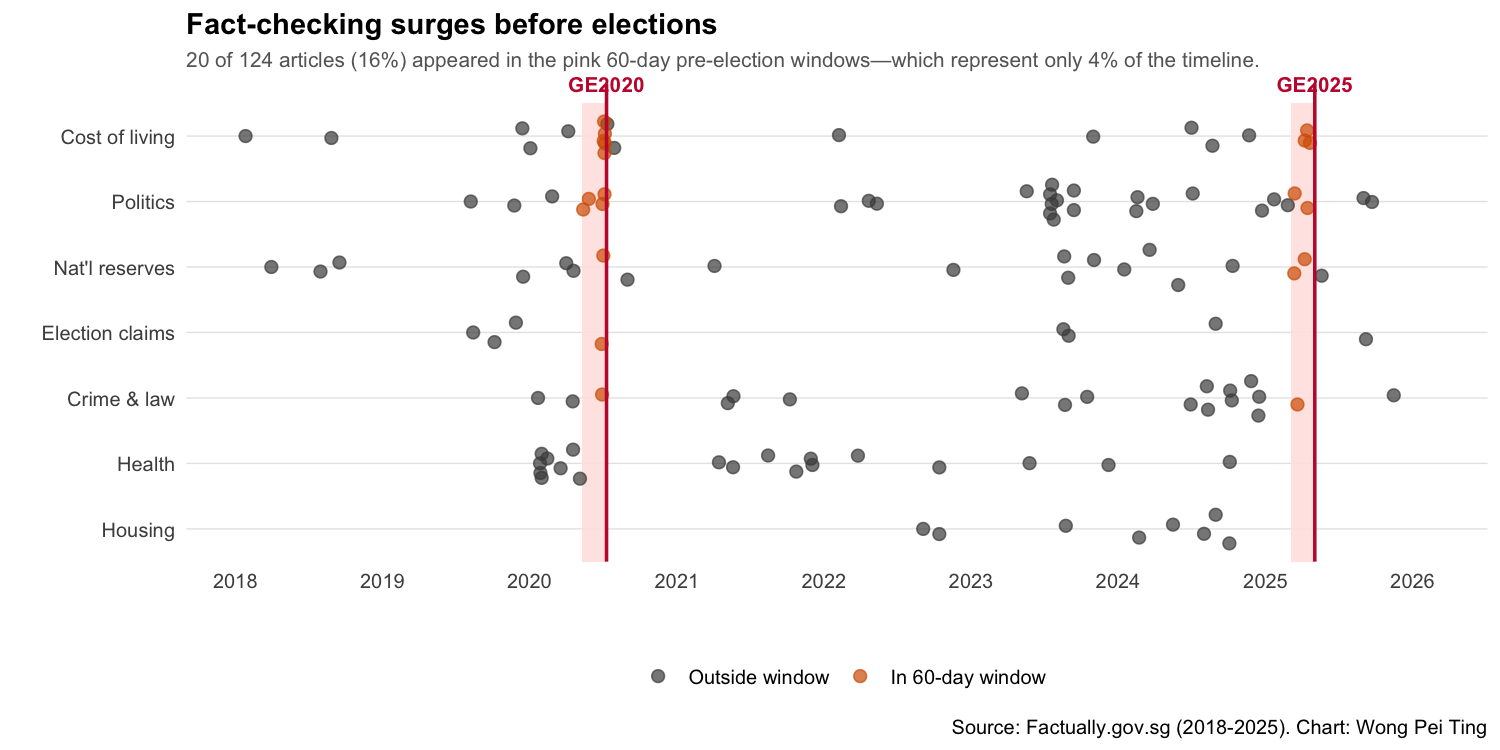

In [42]:
%%R -w 10 -h 5 --units in -r 150
# ============================================================================
# CLEAN BEESWARM - Focuses on clustering, not POFMA
# ============================================================================
# Fixes the original beeswarm's problems:
# 1. Removes POFMA distinction (doesn't advance the clustering argument)
# 2. Adds explicit shaded 60-day election windows
# 3. Uses color to show which dots are IN vs OUT of election windows

# Topic order (high surge at top)
topic_order <- c(
  "Housing", "Health", "Criminal Justice", "Election Claims",
  "National Reserves", "Politics & Governance", "Cost of Living"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)

start_date <- min(df$date, na.rm = TRUE)
end_date <- ANALYSIS_END_DATE

# Window rectangles
window_data <- data.frame(
  xmin = c(ge2020 - WINDOW_DAYS, ge2025 - WINDOW_DAYS),
  xmax = c(ge2020, ge2025),
  ymin = 0.5,
  ymax = 7.5
)

# Stats
n_total <- nrow(df)
n_window <- sum(df$before_ge)
pct_window <- round(n_window / n_total * 100, 0)
window_pct_time <- round(WINDOW_DAYS * 2 / as.numeric(end_date - start_date) * 100, 0)

clean_beeswarm <- ggplot() +
  # Shaded election windows
  geom_rect(
    data = window_data,
    aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
    fill = "#FFE4E1", alpha = 0.9
  ) +
  
  # Beeswarm dots - colored by whether in election window
  geom_quasirandom(
    data = df,
    aes(x = date, y = new_topic_merged, color = before_ge),
    size = 2.5,
    alpha = 0.7,
    groupOnX = FALSE,
    width = 0.3
  ) +
  
  # Election lines
  geom_vline(xintercept = ge2020, linetype = "solid", color = "#C41E3A", linewidth = 0.8) +
  geom_vline(xintercept = ge2025, linetype = "solid", color = "#C41E3A", linewidth = 0.8) +
  
  # Election labels
  annotate("text", x = ge2020, y = 7.8, label = "GE2020",
           color = "#C41E3A", size = 3.5, fontface = "bold") +
  annotate("text", x = ge2025, y = 7.8, label = "GE2025",
           color = "#C41E3A", size = 3.5, fontface = "bold") +
  
  scale_color_manual(
    values = c("TRUE" = "#D55E00", "FALSE" = "#4A4A4A"),
    labels = c("TRUE" = "In 60-day window", "FALSE" = "Outside window"),
    name = ""
  ) +
  scale_x_date(
    limits = c(start_date, end_date),
    date_breaks = "1 year",
    date_labels = "%Y"
  ) +
  scale_y_discrete(
    labels = c(
      "Housing" = "Housing",
      "Health" = "Health",
      "Criminal Justice" = "Crime & law",
      "Election Claims" = "Election claims",
      "National Reserves" = "Nat'l reserves",
      "Politics & Governance" = "Politics",
      "Cost of Living" = "Cost of living"
    ),
    expand = expansion(mult = c(0.05, 0.1))
  ) +
  coord_cartesian(clip = "off") +
  labs(
    title = "Fact-checking surges before elections",
    subtitle = paste0(n_window, " of ", n_total, " articles (", pct_window, 
                      "%) appeared in the pink 60-day pre-election windows—",
                      "which represent only ", window_pct_time, "% of the timeline."),
    x = "", y = "",
    caption = "Source: Factually.gov.sg (2018-2025). Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40", size = 10),
    legend.position = "bottom",
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.3),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  )

print(clean_beeswarm)

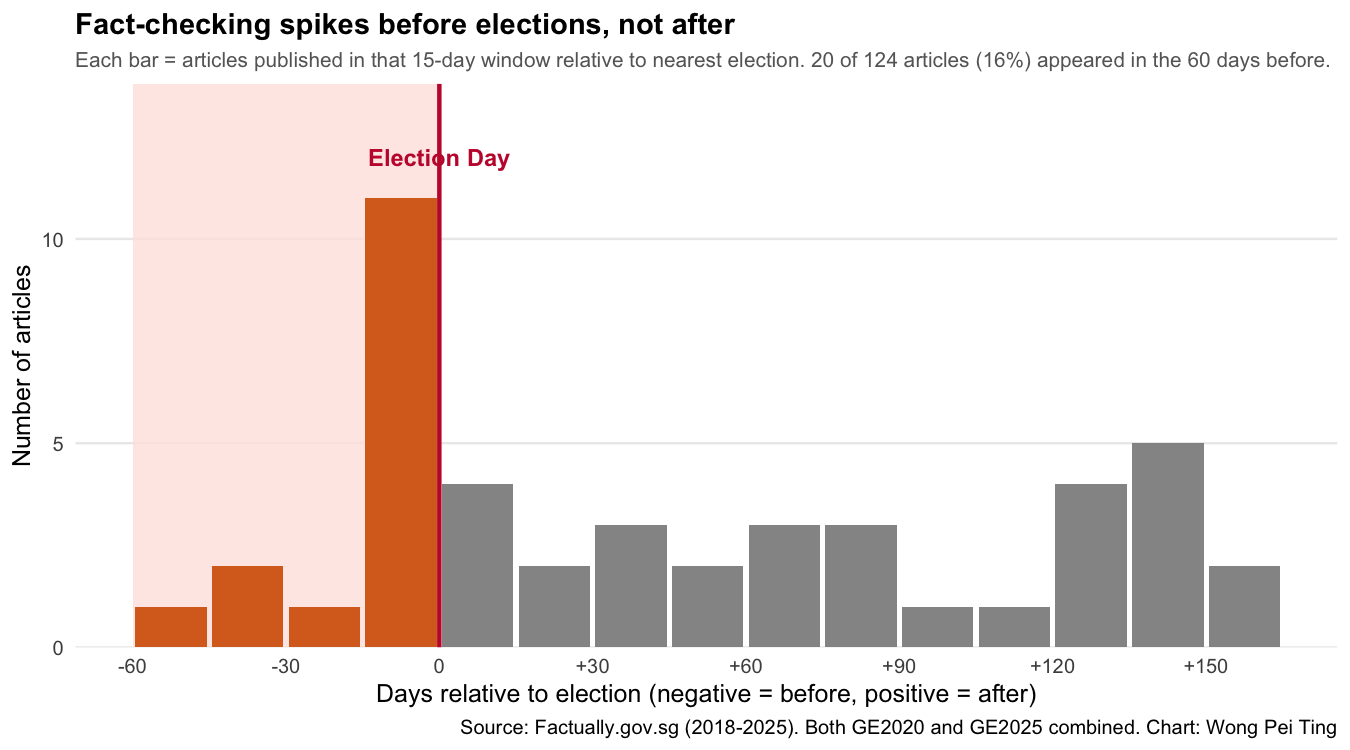

In [43]:
%%R -w 9 -h 5 --units in -r 150
# ============================================================================
# DISTANCE FROM ELECTION - "Devastatingly clear" clustering view
# ============================================================================
# This collapses time into distance-from-election.
# If clustering exists, you'll see a spike near 0.
# Stack both elections to show the pattern repeats.

# Calculate days relative to nearest election for each article
df <- df %>%
  mutate(
    days_to_ge2020 = as.numeric(ge2020 - date),
    days_to_ge2025 = as.numeric(ge2025 - date),
    # Find nearest election
    nearest_election = ifelse(
      abs(days_to_ge2020) <= abs(days_to_ge2025), "GE2020", "GE2025"
    ),
    days_to_nearest = ifelse(
      nearest_election == "GE2020", days_to_ge2020, days_to_ge2025
    )
  )

# Focus on -180 to +60 days (before and shortly after)
df_window <- df %>% filter(days_to_nearest >= -60 & days_to_nearest <= 180)

# Count by 15-day buckets
bucket_counts <- df_window %>%
  mutate(bucket = cut(days_to_nearest, breaks = seq(-60, 180, by = 15), 
                      include.lowest = TRUE, right = FALSE)) %>%
  group_by(bucket) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(
    bucket_mid = seq(-52.5, 172.5, by = 15)[1:n()],
    in_window = bucket_mid <= 0 & bucket_mid >= -60
  )

# Overall counts
n_in_60 <- sum(df$before_ge)
n_total <- nrow(df)
pct_in <- round(n_in_60 / n_total * 100, 0)

distance_plot <- ggplot(bucket_counts, aes(x = bucket_mid, y = count, fill = in_window)) +
  # Pre-election window shading
  annotate("rect", xmin = -60, xmax = 0, ymin = 0, ymax = Inf,
           fill = "#FFE4E1", alpha = 0.8) +
  
  # Bars
  geom_col(width = 14, alpha = 0.9) +
  
  # Election day line
  geom_vline(xintercept = 0, linetype = "solid", color = "#C41E3A", linewidth = 1) +
  annotate("text", x = 0, y = max(bucket_counts$count) + 1, label = "Election Day",
           color = "#C41E3A", size = 4, fontface = "bold", hjust = 0.5) +
  
  scale_fill_manual(values = c("TRUE" = "#D55E00", "FALSE" = "#888888"), guide = "none") +
  scale_x_continuous(
    breaks = c(-60, -30, 0, 30, 60, 90, 120, 150, 180),
    labels = c("-60", "-30", "0", "+30", "+60", "+90", "+120", "+150", "+180")
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.15))) +
  labs(
    title = "Fact-checking spikes before elections, not after",
    subtitle = paste0("Each bar = articles published in that 15-day window relative to nearest election. ",
                      n_in_60, " of ", n_total, " articles (", pct_in, "%) appeared in the 60 days before."),
    x = "Days relative to election (negative = before, positive = after)",
    y = "Number of articles",
    caption = "Source: Factually.gov.sg (2018-2025). Both GE2020 and GE2025 combined. Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40", size = 10),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank()
  )

print(distance_plot)

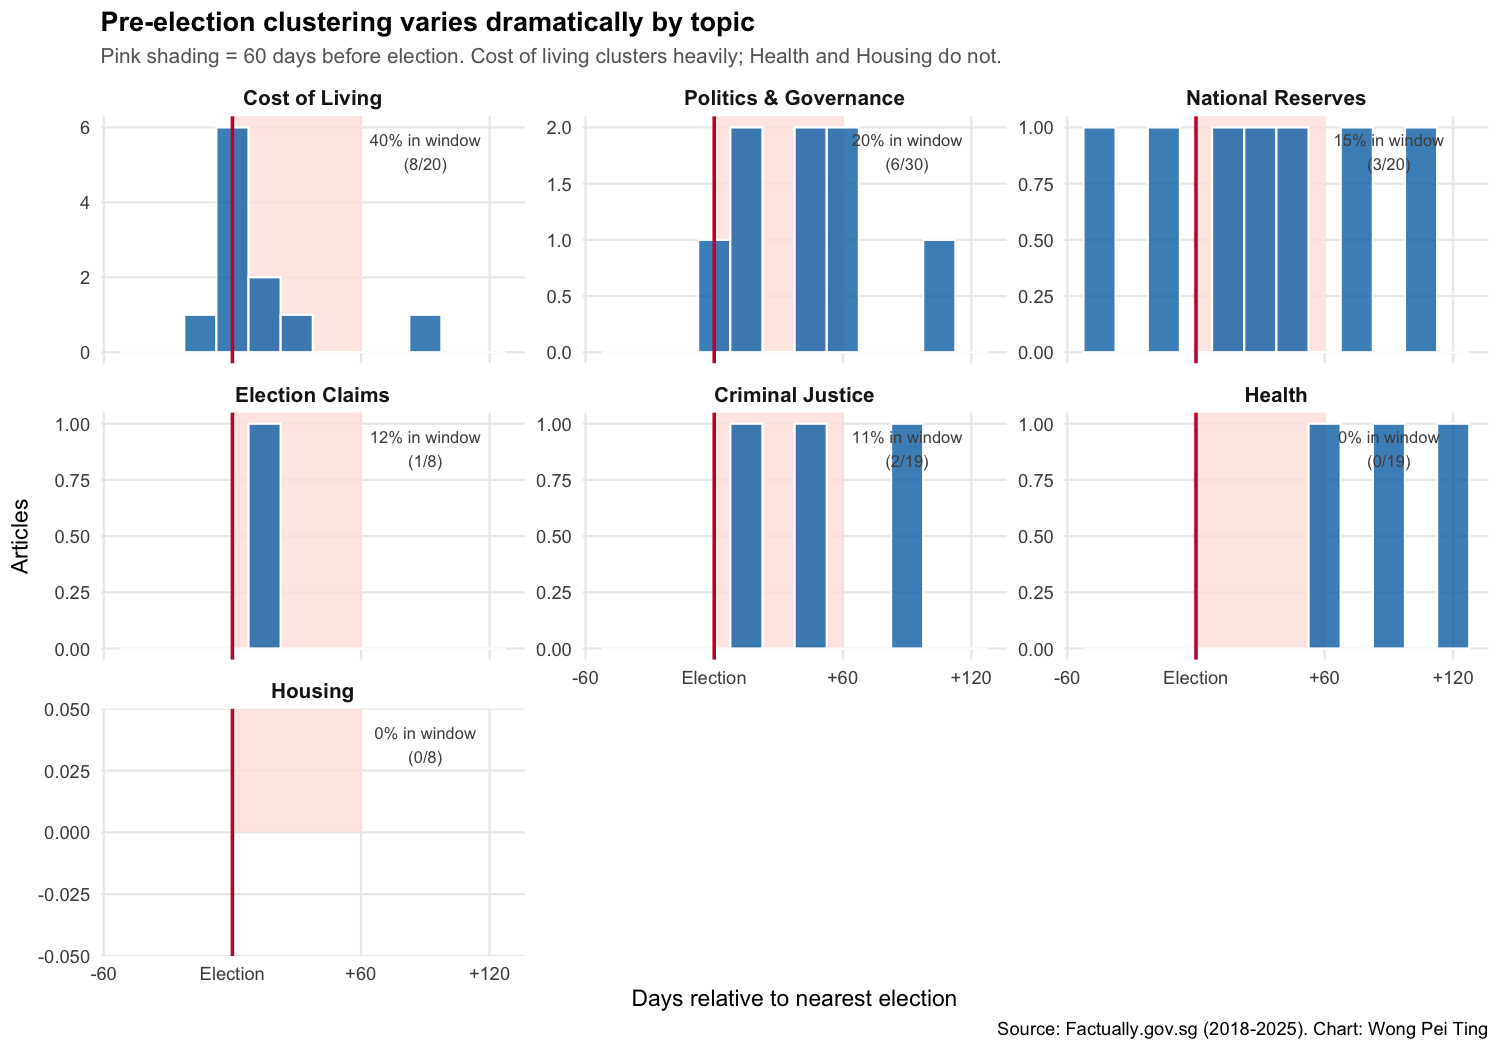

In [44]:
%%R -w 10 -h 7 --units in -r 150
# ============================================================================
# TOPIC-LEVEL DISTANCE FROM ELECTION - Small multiples
# ============================================================================
# Shows the distance-from-election pattern broken down by topic.
# Makes the selective clustering argument visually explicit:
# Cost of Living has a massive spike; Health/Housing are flat.

# Topic order
topic_order <- c(
  "Cost of Living", "Politics & Governance", "National Reserves",
  "Election Claims", "Criminal Justice", "Health", "Housing"
)

# Filter and prepare data
df_topic_dist <- df %>%
  filter(days_to_nearest >= -90 & days_to_nearest <= 120) %>%
  mutate(
    new_topic_merged = factor(new_topic_merged, levels = topic_order),
    in_window = days_to_nearest >= 0 & days_to_nearest <= 60
  )

# Calculate topic-level stats
topic_stats <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    total = n(),
    in_window = sum(before_ge),
    pct = round(in_window / total * 100, 0),
    .groups = "drop"
  ) %>%
  mutate(
    new_topic_merged = factor(new_topic_merged, levels = topic_order),
    label = paste0(pct, "% in window\n(", in_window, "/", total, ")")
  )

topic_distance_plot <- ggplot(df_topic_dist, aes(x = days_to_nearest)) +
  # Pre-election window shading
  annotate("rect", xmin = 0, xmax = 60, ymin = 0, ymax = Inf,
           fill = "#FFE4E1", alpha = 0.8) +
  
  # Histogram
  geom_histogram(binwidth = 15, fill = "#0072B2", alpha = 0.8, color = "white") +
  
  # Election day line
  geom_vline(xintercept = 0, linetype = "solid", color = "#C41E3A", linewidth = 0.8) +
  
  # Stats annotation
  geom_text(data = topic_stats, aes(x = 90, y = Inf, label = label),
            vjust = 1.5, hjust = 0.5, size = 2.8, color = "grey30") +
  
  facet_wrap(~new_topic_merged, ncol = 3, scales = "free_y") +
  scale_x_continuous(
    breaks = c(-60, 0, 60, 120),
    labels = c("-60", "Election", "+60", "+120")
  ) +
  labs(
    title = "Pre-election clustering varies dramatically by topic",
    subtitle = "Pink shading = 60 days before election. Cost of living clusters heavily; Health and Housing do not.",
    x = "Days relative to nearest election",
    y = "Articles",
    caption = "Source: Factually.gov.sg (2018-2025). Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(face = "bold", size = 13),
    plot.subtitle = element_text(color = "grey40", size = 10),
    strip.text = element_text(face = "bold", size = 10),
    panel.grid.minor = element_blank()
  )

print(topic_distance_plot)

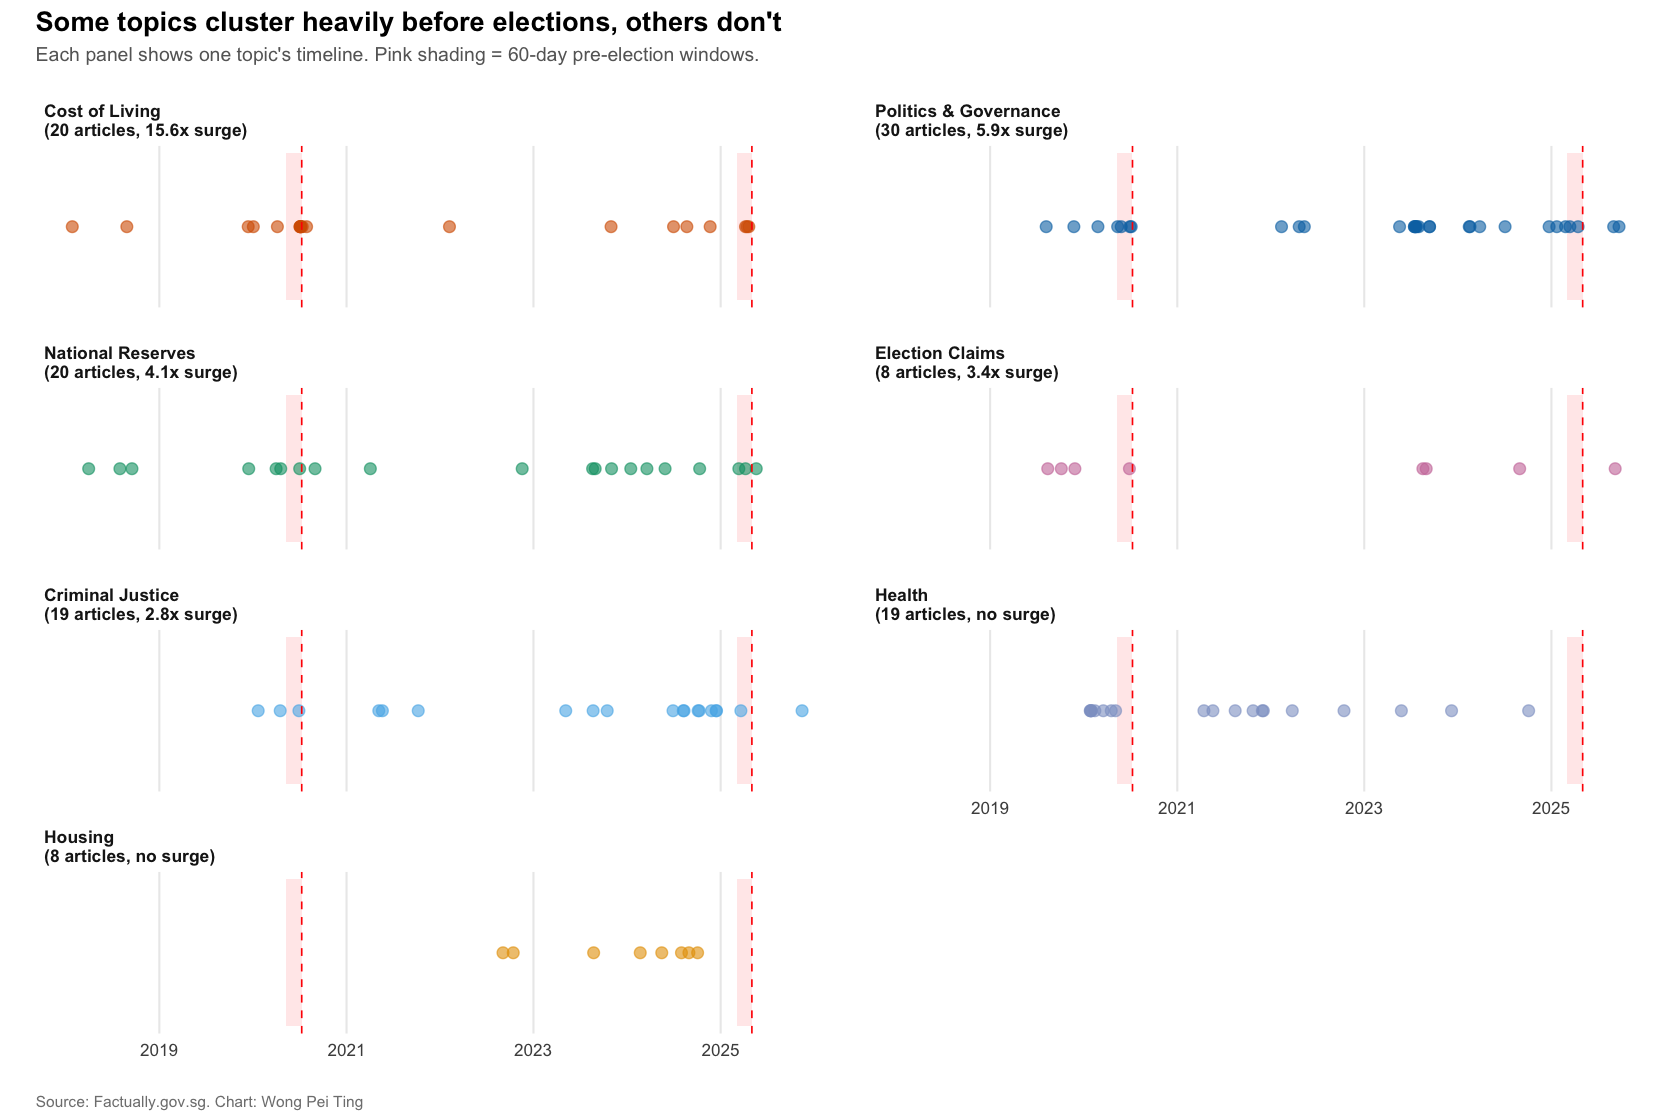

In [45]:
%%R -w 12 -h 8 --units in -r 140
# ============================================================================
# SMALL MULTIPLES - Individual timeline for each topic
# ============================================================================
# Faceted view makes it easy to compare which topics surge before elections
# and which remain flat. Each panel = one topic.

# Topic order (high-surge topics first)
topic_order <- c(
  "Cost of Living", "Politics & Governance", "National Reserves",
  "Election Claims", "Criminal Justice", "Health", "Housing"
)
df$new_topic_merged <- factor(df$new_topic_merged, levels = topic_order)

# Colors
topic_colors <- c(
  "Cost of Living" = "#D55E00",
  "Politics & Governance" = "#0072B2",
  "Election Claims" = "#CC79A7",
  "National Reserves" = "#009E73",
  "Housing" = "#E69F00",
  "Criminal Justice" = "#56B4E9",
  "Health" = "#8DA0CB"
)

# Calculate surge for labels
surge_labels <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    n = n(),
    n_pre = sum(before_ge),
    surge = round((n_pre / before_days) / (sum(!before_ge) / baseline_days), 1),
    .groups = "drop"
  ) %>%
  mutate(
    label = paste0(new_topic_merged, "\n(", n, " articles, ", 
                   ifelse(is.finite(surge) & surge > 0, paste0(surge, "x surge"), "no surge"), ")")
  )

# Create facet labels
facet_labels <- setNames(surge_labels$label, surge_labels$new_topic_merged)

# Create the small multiples plot
ggplot(df, aes(x = date, y = 1, color = new_topic_merged)) +
  # Shaded pre-election windows
  annotate("rect", 
           xmin = ge2020 - 60, xmax = ge2020, ymin = 0.5, ymax = 1.5,
           fill = "red", alpha = 0.1) +
  annotate("rect", 
           xmin = ge2025 - 60, xmax = ge2025, ymin = 0.5, ymax = 1.5,
           fill = "red", alpha = 0.1) +
  
  # Points for each article
  geom_point(size = 2.5, alpha = 0.6) +
  
  # Election lines
  geom_vline(xintercept = ge2020, linetype = "dashed", color = "red", linewidth = 0.4) +
  geom_vline(xintercept = ge2025, linetype = "dashed", color = "red", linewidth = 0.4) +
  
  # Facet by topic
  facet_wrap(~ new_topic_merged, ncol = 2, scales = "free_y",
             labeller = labeller(new_topic_merged = facet_labels)) +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_date(date_breaks = "2 years", date_labels = "%Y") +
  
  labs(
    title = "Some topics cluster heavily before elections, others don't",
    subtitle = "Each panel shows one topic's timeline. Pink shading = 60-day pre-election windows.",
    x = "",
    y = "",
    caption = "Source: Factually.gov.sg. Chart: Wong Pei Ting"
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(color = "grey40", size = 10, margin = margin(b = 15)),
    strip.text = element_text(size = 9, face = "bold", hjust = 0),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    panel.spacing = unit(1, "lines"),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )

# INTERPRETATION:
# - Top panels (Cost of Living, Politics) show clear clustering in pink zones
# - Bottom panels (Health, Housing) show dots spread evenly with empty pink zones
# - This side-by-side comparison makes the selective targeting obvious

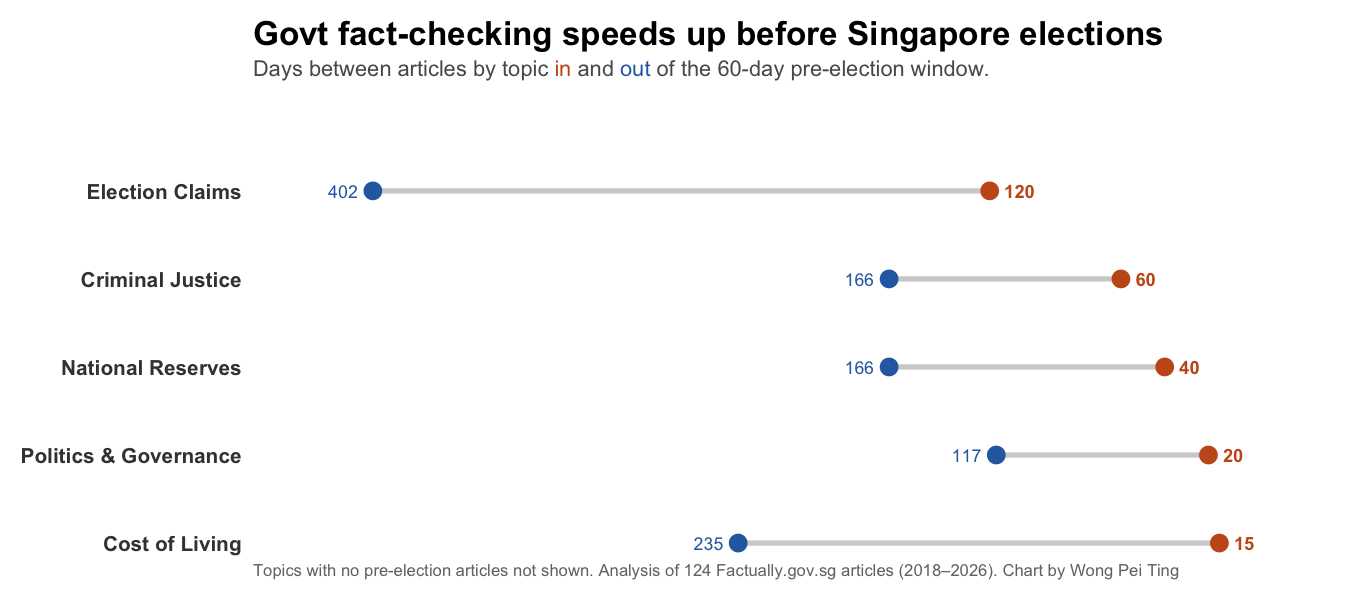

In [46]:
%%R -w 9 -h 4 --units in -r 150

# ============================================================================
# TEMPO CHART - NYT-style restrained dumbbell
# ============================================================================
# Key idea: Publication pace accelerated sharply before elections.
# Biggest shift: Cost of living coverage moved from 235 days to 15 days.
#
# Design updates requested:
# - Standardise vertical spacing (avoid weird gaps)
# - Force topic order:
#   1) Cost of Living
#   2) Politics & Governance
#   3) National Reserves
#   4) Criminal Justice
#   5) Election Claims
# ============================================================================

library(dplyr)
library(ggplot2)
library(ggtext)

# ----------------------------------------------------------------------------
# Calculate rates for each topic
# ----------------------------------------------------------------------------
rate_data <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    n_window   = sum(before_ge),
    n_baseline = sum(!before_ge),
    .groups = "drop"
  ) %>%
  mutate(
    days_baseline = ifelse(n_baseline > 0, baseline_days / n_baseline, NA_real_),
    days_window   = ifelse(n_window > 0,   before_days   / n_window,   NA_real_),
    surge = (n_window / before_days) / (n_baseline / baseline_days)
  ) %>%
  filter(n_window > 0, !is.na(days_baseline), !is.na(days_window)) %>%
  mutate(
    days_baseline = round(days_baseline),
    days_window   = round(days_window),
    surge = round(surge, 1)
  )

# ----------------------------------------------------------------------------
# Force topic order + remove spacing weirdness
# (Those gaps usually happen when factor levels are inconsistent / dropped.)
# ----------------------------------------------------------------------------
topic_order <- c(
  "Cost of Living",
  "Politics & Governance",
  "National Reserves",
  "Criminal Justice",
  "Election Claims"
)

rate_data <- rate_data %>%
  # keep only the topics we want, in exactly the order we want
  filter(new_topic_merged %in% topic_order) %>%
  mutate(new_topic_merged = factor(new_topic_merged, levels = topic_order)) %>%
  arrange(new_topic_merged)

# ----------------------------------------------------------------------------
# Axis spacing + label positions
# ----------------------------------------------------------------------------
max_days <- max(rate_data$days_baseline, rate_data$days_window, na.rm = TRUE)
x_left   <- ceiling(max_days / 50) * 50

pad_left  <- x_left * 0.015
pad_right <- x_left * 0.015

rate_data <- rate_data %>%
  mutate(
    x_baseline_lab = days_baseline + pad_left,
    x_window_lab   = pmax(days_window - pad_right, -pad_right * 0.2)
  )

# ----------------------------------------------------------------------------
# Subtitle with colored words (match dot colors)
# ----------------------------------------------------------------------------
subtitle_html <- paste0(
  "Days between articles by topic ",
  "<span style='color:#C65A1E; font-weight:600;'>in</span> and ",
  "<span style='color:#2B6CB0; font-weight:600;'>out</span> of the 60-day pre-election window."
)

# ----------------------------------------------------------------------------
# Plot base
# ----------------------------------------------------------------------------
tempo_plot <- ggplot(rate_data) +

  # Connector
  geom_segment(
    aes(y = new_topic_merged, yend = new_topic_merged,
        x = days_baseline, xend = days_window),
    linewidth = 1.2,
    color = "grey82",
    lineend = "round"
  ) +

  # Baseline (blue)
  geom_point(aes(x = days_baseline, y = new_topic_merged),
             size = 3.5, color = "#2B6CB0") +

  # Pre-election (orange)
  geom_point(aes(x = days_window, y = new_topic_merged),
             size = 3.5, color = "#C65A1E") +

  # Baseline labels (blue)
  geom_text(
    aes(x = x_baseline_lab, y = new_topic_merged, label = days_baseline),
    hjust = 1, size = 3.0, color = "#2B6CB0"
  ) +

  # Window labels (orange)
  geom_text(
    aes(x = x_window_lab, y = new_topic_merged, label = days_window),
    hjust = 0, size = 3.1, color = "#C65A1E", fontface = "bold"
  ) +

  # Keep reversed scale for correct geometry; hide ticks/labels for clean look
  scale_x_reverse(
    limits = c(x_left + pad_left, -pad_right),
    breaks = NULL,
    expand = c(0, 0)
  ) +

  labs(
    title = "Govt fact-checking speeds up before Singapore elections",
    subtitle = subtitle_html,
    x = NULL,
    y = NULL,
    caption = "Topics with no pre-election articles not shown. Analysis of 124 Factually.gov.sg articles (2018–2026). Chart by Wong Pei Ting"
  ) +

  # Standardised, consistent vertical spacing:
  # - NO extra expansion between categories
  scale_y_discrete(drop = FALSE, expand = expansion(mult = c(0.00, 0.22))) +

  coord_cartesian(clip = "off") +

  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 16, margin = margin(b = 4)),
    plot.subtitle = ggtext::element_markdown(
      size = 10.5, color = "grey35", margin = margin(b = 16), lineheight = 1.05
    ),

    # Remove gridlines + bottom scale elements
    panel.grid = element_blank(),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.line.x = element_blank(),

    axis.text.y = element_text(face = "bold", size = 10, color = "grey25"),

    plot.caption = element_text(size = 8, color = "grey45",
                                hjust = 0, margin = margin(t = 10)),
    plot.margin = margin(10, 40, 10, 10)
  )

# ----------------------------------------------------------------------------
# Arrow guide under subtitle (consistent spacing)
# ----------------------------------------------------------------------------
# Put the guide at a stable "above top row" location in y-space.
y_top <- length(topic_order) + 0.55
x_left_anchor  <- x_left * 0.80
x_right_anchor <- x_left * 0.08

tempo_plot +
  annotate(
    "segment",
    x = x_left_anchor, xend = x_right_anchor,
    y = y_top, yend = y_top,
    linewidth = 0.6, color = "grey55",
    arrow = arrow(ends = "both", length = unit(0.12, "in"))
  ) +
  annotate(
    "text",
    x = x_left_anchor, y = y_top + 0.18,
    label = "Less frequent",
    hjust = 0, vjust = 0,
    size = 3.0, color = "grey45"
  ) +
  annotate(
    "text",
    x = (x_left_anchor + x_right_anchor) / 2, y = y_top + 0.18,
    label = "Days between articles",
    hjust = 0.5, vjust = 0,
    size = 3.1, color = "grey25", fontface = "bold"
  ) +
  annotate(
    "text",
    x = x_right_anchor, y = y_top + 0.18,
    label = "More frequent",
    hjust = 1, vjust = 0,
    size = 3.0, color = "grey45"
  )

# ----------------------------------------------------------------------------
# INTERPRETATION FOR READERS:
# - Orange dots (right) = pre-election publishing
# - Blue dots (left) = baseline pace
# - The gap between dots = acceleration
# - Topics shown in fixed editorial order (not auto-sorted)
# ----------------------------------------------------------------------------

# Print the plot
print(tempo_plot)


In [47]:
%%R
library(stringr)

subtitle_txt <- str_wrap(
  "Days between articles by topic. Cost of living coverage moved from 235 days to 15 days in the pre-election window. Smaller values (right) mean articles were published more frequently.",
  width = 95
)

tempo_plot <- tempo_plot +
  labs(subtitle = subtitle_txt) +
  theme(
    plot.subtitle = ggtext::element_markdown(lineheight = 1.1),
    plot.margin = margin(10, 70, 10, 10)  # more space on right
  )


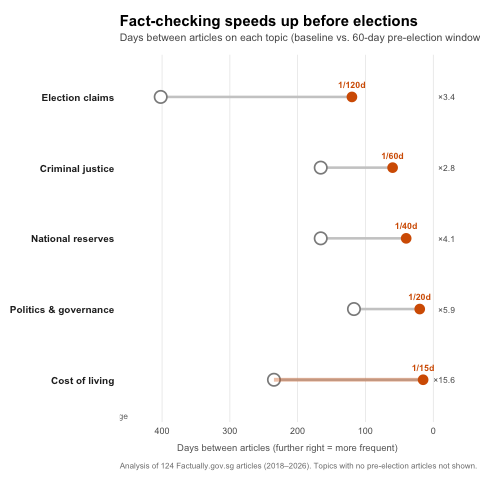

In [48]:
%%R 
# Clean theme helper (optional)
theme_tempo <- function(base_size = 12) {
  theme_minimal(base_size = base_size) +
    theme(
      plot.title = element_text(face = "bold", size = 15, margin = margin(b = 4)),
      plot.subtitle = element_text(color = "grey35", size = 10.5, margin = margin(b = 12)),
      axis.title.x = element_text(size = 9.5, color = "grey40", margin = margin(t = 8)),
      axis.text.y = element_text(size = 10, face = "bold", color = "grey15"),
      axis.text.x = element_text(size = 9, color = "grey35"),
      panel.grid.minor = element_blank(),
      panel.grid.major.y = element_blank(),
      panel.grid.major.x = element_line(color = "grey90", linewidth = 0.3),
      plot.caption = element_text(size = 8, color = "grey50", hjust = 0, margin = margin(t = 10)),
      plot.margin = margin(15, 25, 10, 10)
    )
}

# Prep: add a highlight flag + nice labels + pad for right-side text
rate_data2 <- rate_data %>%
  mutate(
    topic_label = forcats::fct_relabel(new_topic_merged, ~ dplyr::recode(.x,
      "Cost of Living" = "Cost of living",
      "Politics & Governance" = "Politics & governance",
      "National Reserves" = "National reserves",
      "Election Claims" = "Election claims",
      "Criminal Justice" = "Criminal justice"
    )),
    highlight = (as.character(new_topic_merged) == "Cost of Living")
  )

# Range + padding for right-side labels (remember: reversed axis => "right" is smaller x)
x_max <- max(rate_data2$days_baseline, na.rm = TRUE)
x_pad_right <- -0.08 * x_max   # creates room to the RIGHT (smaller than 0) visually

tempo_plot <- ggplot(rate_data2, aes(y = topic_label)) +

  # Dumbbell line
  geom_segment(
    aes(x = days_baseline, xend = days_window, yend = topic_label),
    color = "grey80", linewidth = 1.2
  ) +

  # Baseline: hollow point (quiet)
  geom_point(
    aes(x = days_baseline),
    shape = 21, stroke = 1.2, size = 5,
    fill = "white", color = "grey55"
  ) +

  # Pre-election: filled point (loud)
  geom_point(
    aes(x = days_window),
    shape = 21, stroke = 0, size = 5,
    fill = "#D55E00", color = "#D55E00"
  ) +

  # Label ONLY the pre-election value (the story)
  geom_text(
    aes(x = days_window, label = paste0("1/", days_window, "d")),
    nudge_y = 0.18, size = 3.1, color = "#D55E00", fontface = "bold"
  ) +

  # Optional: show surge as a small right-margin label (cleaner than dot labels)
  geom_text(
    aes(x = x_pad_right, label = paste0("×", surge)),
    size = 3, color = "grey35", hjust = 1
  ) +

  # Subtle highlight: make the key topic slightly darker line (no floating annotation box)
  geom_segment(
    data = subset(rate_data2, highlight),
    aes(x = days_baseline, xend = days_window, y = topic_label, yend = topic_label),
    color = "#D55E00", linewidth = 1.8, alpha = 0.35
  ) +

  # Reverse axis (keep your concept), but simplify the axis story
  scale_x_reverse(
    limits = c(x_max * 1.15, x_pad_right),  # room for × labels
    breaks = scales::pretty_breaks(n = 5),
    expand = c(0, 0)
  ) +

  labs(
    title = "Fact-checking speeds up before elections",
    subtitle = "Days between articles on each topic (baseline vs. 60-day pre-election window).",
    x = "Days between articles (further right = more frequent)",
    y = NULL,
    caption = "Analysis of 124 Factually.gov.sg articles (2018–2026). Topics with no pre-election articles not shown."
  ) +

  theme_tempo() +

  # Legend: use a proper legend instead of manual annotate calls
  guides() +
  annotate("text", x = x_max * 1.12, y = 0.5, label = "× = surge", size = 3, color = "grey45", hjust = 1)

tempo_plot


In addition: Warning message:
In annotate("label", x = 1.5, y = 6.2, label = "Cost of living surges\n16x before elections",  :
  Ignoring unknown parameters: `label.size`


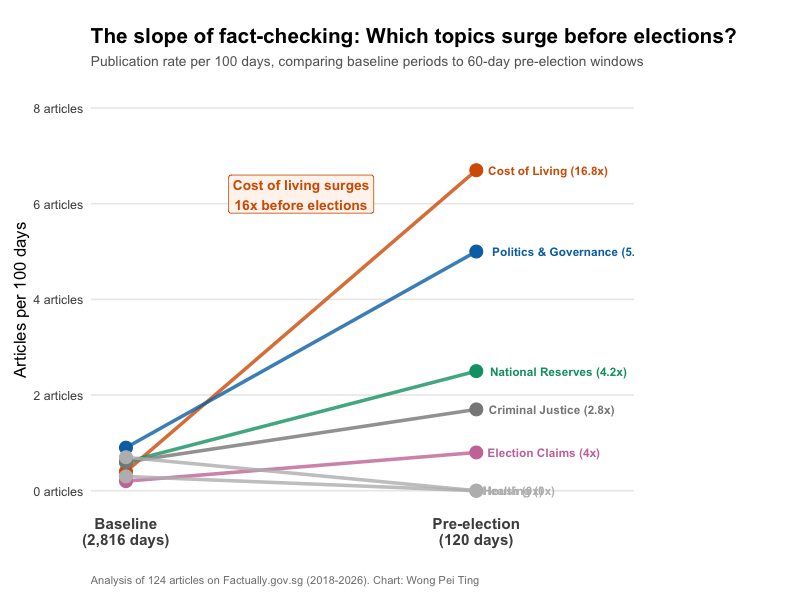

In [49]:
%%R -w 8 -h 6 --units in -r 100
# ============================================================================
# SLOPE CHART - Before/After comparison
# ============================================================================
# Shows the "jump" from baseline to pre-election rate for each topic.
# Steep upward slopes = dramatic surge. Flat/downward = no change.
# 
# Why this can work:
# - Immediately shows which topics surge and by how much
# - The angle of each line tells the story
# - Cost of Living's steep slope is the visual headline

# Calculate rates for slope chart
slope_data <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    n_window = sum(before_ge),
    n_baseline = sum(!before_ge),
    .groups = "drop"
  ) %>%
  mutate(
    # Articles per 100 days (easier to read than per day)
    rate_baseline = round(n_baseline / baseline_days * 100, 1),
    rate_preelection = round(n_window / before_days * 100, 1),
    surge = ifelse(rate_baseline > 0, round(rate_preelection / rate_baseline, 1), 0)
  ) %>%
  arrange(desc(surge))

# Reshape for plotting
slope_long <- slope_data %>%
  select(new_topic_merged, rate_baseline, rate_preelection, surge) %>%
  tidyr::pivot_longer(
    cols = c(rate_baseline, rate_preelection),
    names_to = "period",
    values_to = "rate"
  ) %>%
  mutate(
    period = ifelse(period == "rate_baseline", "Baseline\n(2,816 days)", "Pre-election\n(120 days)"),
    period = factor(period, levels = c("Baseline\n(2,816 days)", "Pre-election\n(120 days)"))
  )

# Colors - highlight high-surge topics
topic_colors <- c(
 "Cost of Living" = "#D55E00",
  "Politics & Governance" = "#0072B2",
  "National Reserves" = "#009E73",
  "Election Claims" = "#CC79A7",
  "Criminal Justice" = "#888888",
  "Health" = "#BBBBBB",
  "Housing" = "#BBBBBB"
)

ggplot(slope_long, aes(x = period, y = rate, group = new_topic_merged, color = new_topic_merged)) +
  # Connecting lines (the slopes)
  geom_line(linewidth = 1.2, alpha = 0.8) +
  # Points at each end
  geom_point(size = 4) +
  
  # Label the right side with topic names and surge
  geom_text(
    data = slope_long %>% filter(period == "Pre-election\n(120 days)"),
    aes(label = paste0(new_topic_merged, " (", 
                       slope_data$surge[match(new_topic_merged, slope_data$new_topic_merged)], "x)")),
    hjust = -0.1, size = 3, fontface = "bold"
  ) +
  
  # Annotation for the headline

  annotate("label",
           x = 1.5, y = 6.2,
           label = "Cost of living surges\n16x before elections",
           size = 3.5, fontface = "bold",
           fill = "#FFF5EE", label.size = 0, color = "#D55E00") +
  
  scale_color_manual(values = topic_colors, guide = "none") +
  scale_x_discrete(expand = expansion(mult = c(0.1, 0.45))) +
  scale_y_continuous(
    limits = c(0, 8),
    breaks = seq(0, 8, 2),
    labels = function(x) paste0(x, " articles")
  ) +
  
  labs(
    title = "The slope of fact-checking: Which topics surge before elections?",
    subtitle = "Publication rate per 100 days, comparing baseline periods to 60-day pre-election windows",
    x = "",
    y = "Articles per 100 days",
    caption = "Analysis of 124 articles on Factually.gov.sg (2018-2026). Chart: Wong Pei Ting"
  ) +
  
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 15),
    plot.subtitle = element_text(color = "grey40", size = 10, margin = margin(b = 15)),
    axis.text.x = element_text(size = 11, face = "bold"),
    axis.text.y = element_text(size = 9),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank(),
    plot.margin = margin(20, 120, 10, 10),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )

In addition: Warning message:
In annotate("label", x = 2, y = 10, label = "4x\noverrepresentation",  :
  Ignoring unknown parameters: `label.size`


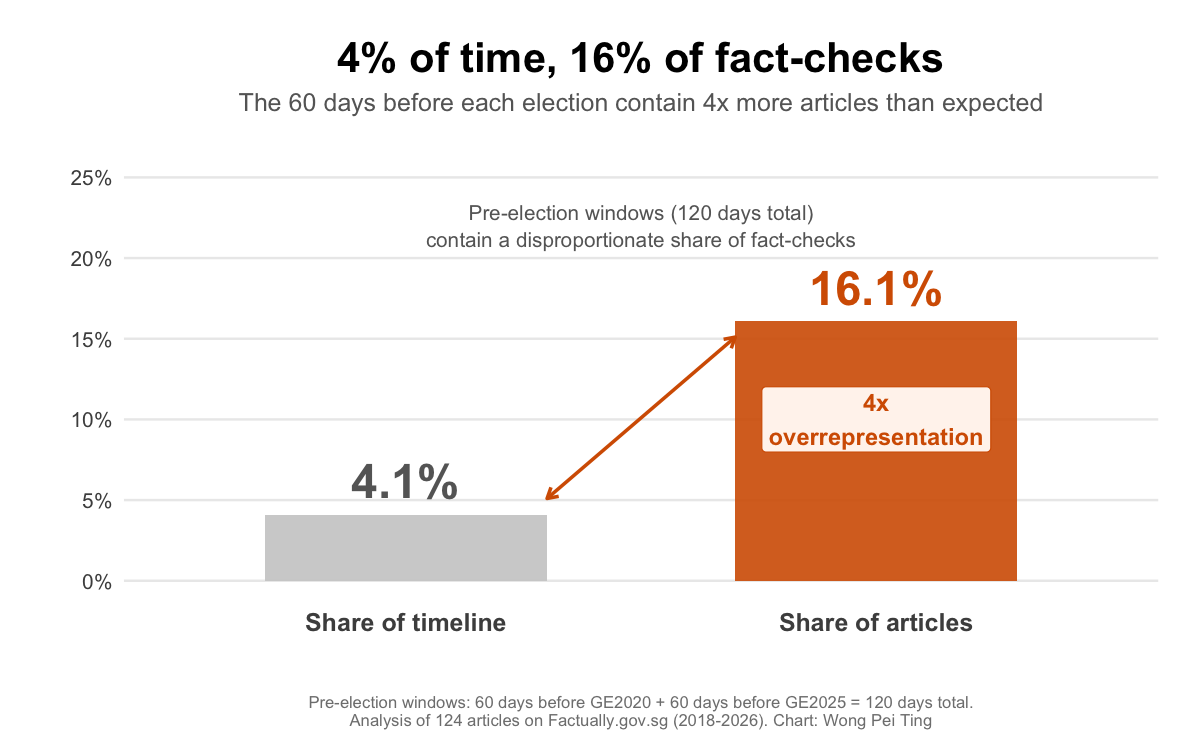

In [50]:
%%R -w 8 -h 5 --units in -r 150
# ============================================================================
# PROPORTIONAL COMPARISON - "The Imbalance"
# ============================================================================
# The simplest, most powerful visual: 4% of time contains 16% of articles.
# Side-by-side bars make the disproportionate concentration impossible to miss.
#
# Why this can work:
# - One glance tells the whole story
# - The visual imbalance IS the finding
# - No interpretation needed - the bars speak for themselves

# Calculate the key stats
pct_time_preelection <- round(before_days / total_days * 100, 1)
pct_articles_preelection <- round(sum(df$before_ge) / nrow(df) * 100, 1)

# Data for the comparison
imbalance_data <- data.frame(
  metric = factor(c("Share of timeline", "Share of articles"), 
                  levels = c("Share of timeline", "Share of articles")),
  value = c(pct_time_preelection, pct_articles_preelection),
  label = c(paste0(pct_time_preelection, "%"), paste0(pct_articles_preelection, "%"))
)

ggplot(imbalance_data, aes(x = metric, y = value, fill = metric)) +
  geom_col(width = 0.6, alpha = 0.9) +
  
  # Add percentage labels on bars
  geom_text(aes(label = label), 
            vjust = -0.5, size = 8, fontface = "bold",
            color = c("#666666", "#D55E00")) +
  
  # Annotation explaining the imbalance
  annotate("segment",
           x = 1.3, xend = 1.7,
           y = pct_time_preelection + 1, yend = pct_articles_preelection - 1,
           arrow = arrow(length = unit(0.2, "cm"), ends = "both"),
           color = "#D55E00", linewidth = 0.8) +
  
  annotate("label",
           x = 2, y = 10,
           label = "4x\noverrepresentation",
           size = 4, fontface = "bold",
           fill = "#FFF5EE", label.size = 0, color = "#D55E00") +
  
  # Context annotation
  annotate("text",
           x = 1.5, y = 22,
           label = "Pre-election windows (120 days total)\ncontain a disproportionate share of fact-checks",
           size = 3.5, color = "grey40", lineheight = 1.1) +
  
  scale_fill_manual(values = c("Share of timeline" = "#CCCCCC", 
                                "Share of articles" = "#D55E00"),
                    guide = "none") +
  scale_y_continuous(
    limits = c(0, 25),
    breaks = seq(0, 25, 5),
    labels = function(x) paste0(x, "%")
  ) +
  
  labs(
    title = "4% of time, 16% of fact-checks",
    subtitle = "The 60 days before each election contain 4x more articles than expected",
    x = "",
    y = "",
    caption = "Pre-election windows: 60 days before GE2020 + 60 days before GE2025 = 120 days total.\nAnalysis of 124 articles on Factually.gov.sg (2018-2026). Chart: Wong Pei Ting"
  ) +
  
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 20, hjust = 0.5),
    plot.subtitle = element_text(color = "grey40", size = 12, hjust = 0.5, margin = margin(b = 20)),
    axis.text.x = element_text(size = 12, face = "bold"),
    axis.text.y = element_text(size = 10),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank(),
    plot.margin = margin(20, 20, 10, 20),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0.5, margin = margin(t = 15))
  )

# This is perhaps the MOST powerful "one chart" option because:
# - The headline IS the chart title
# - No legend needed, no complex decoding
# - The visual disparity makes the argument instantly

In addition: Warning message:
In annotate("label", x = as.Date("2022-01-01"), y = 1.55, label = "These shaded windows represent just 4% of the timeline\nbut contain 16% of all fact-checks",  :
  Ignoring unknown parameters: `label.size`


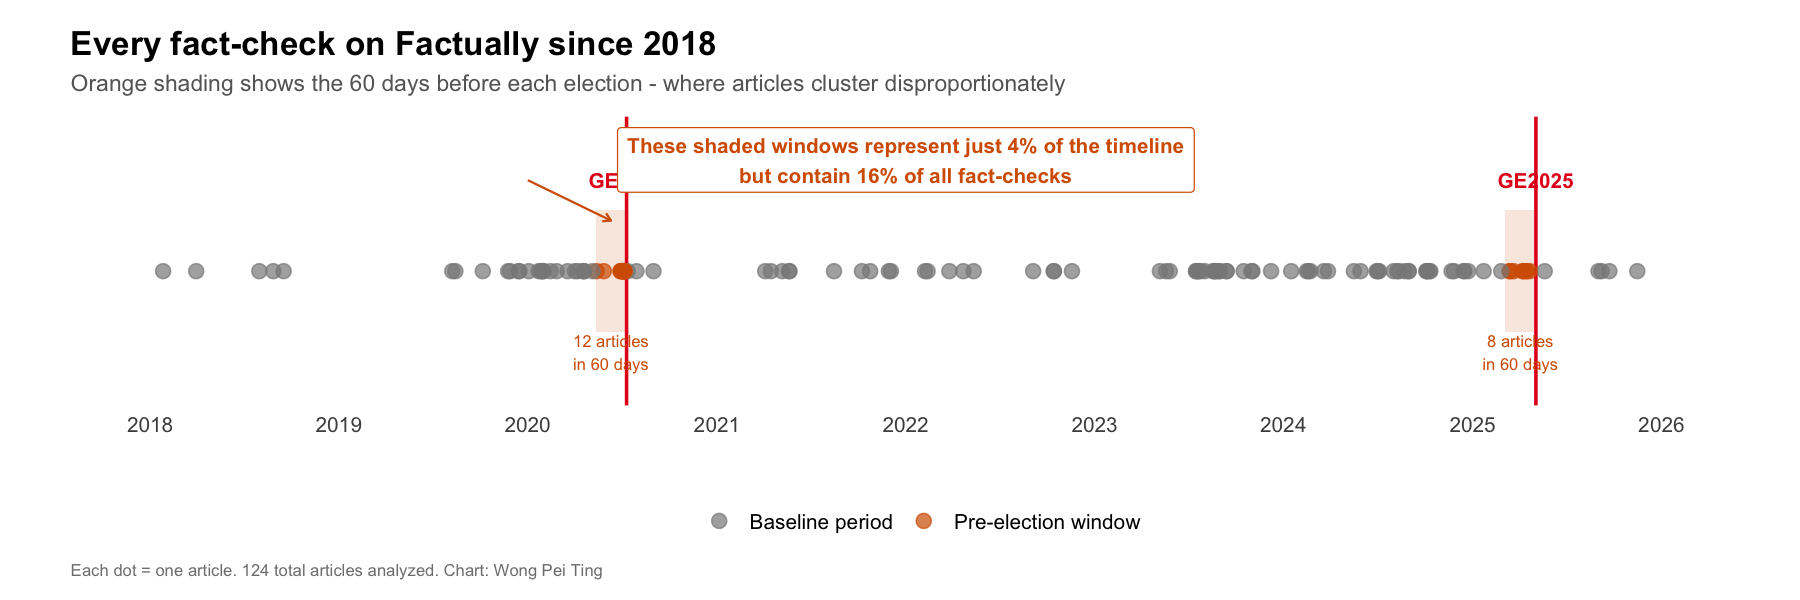

In [ ]:
%%R -w 12 -h 4 --units in -r 150
# ============================================================================
# SINGLE ANNOTATED TIMELINE - Minimalist but powerful
# ============================================================================
# One row, all 124 dots, pre-election windows highlighted.
# The clustering in the shaded areas tells the story visually.
#
# Why this can work:
# - Shows the RAW DATA - every single article
# - Shaded windows make the pattern undeniable
# - Annotation delivers the key stat

# Create a single-row timeline
ggplot(df, aes(x = date, y = 1)) +
  # Shaded pre-election windows (THE KEY VISUAL)
  annotate("rect",
           xmin = ge2020 - 60, xmax = ge2020,
           ymin = 0.7, ymax = 1.3,
           fill = "#D55E00", alpha = 0.15) +
  annotate("rect",
           xmin = ge2025 - 60, xmax = ge2025,
           ymin = 0.7, ymax = 1.3,
           fill = "#D55E00", alpha = 0.15) +
  
  # Election day lines
  geom_vline(xintercept = ge2020, color = "#E31A1C", linewidth = 0.8) +
  geom_vline(xintercept = ge2025, color = "#E31A1C", linewidth = 0.8) +
  
  # All article dots - color by whether in pre-election window
  geom_point(aes(color = before_ge), size = 3, alpha = 0.7) +
  
  # Election labels
  annotate("text", x = ge2020, y = 1.45, label = "GE2020", 
           color = "#E31A1C", size = 3.5, fontface = "bold") +
  annotate("text", x = ge2025, y = 1.45, label = "GE2025", 
           color = "#E31A1C", size = 3.5, fontface = "bold") +
  
  # KEY ANNOTATION - the headline stat
  annotate("label",
           x = as.Date("2022-01-01"), y = 1.55,
           label = "These shaded windows represent just 4% of the timeline\nbut contain 16% of all fact-checks",
           size = 3.5, fontface = "bold",
           fill = "white", label.size = 0.3, color = "#D55E00",
           label.padding = unit(0.4, "lines")) +
  
  # Arrow pointing to the clustering
  annotate("segment",
           x = as.Date("2020-01-01"), xend = ge2020 - 30,
           y = 1.45, yend = 1.25,
           arrow = arrow(length = unit(0.15, "cm")),
           color = "#D55E00", linewidth = 0.5) +
  
  # Count annotations in each window
  annotate("text", x = ge2020 - 30, y = 0.6, 
           label = "12 articles\nin 60 days", size = 2.8, color = "#D55E00") +
  annotate("text", x = ge2025 - 30, y = 0.6, 
           label = "8 articles\nin 60 days", size = 2.8, color = "#D55E00") +
  
  scale_color_manual(
    values = c("FALSE" = "#888888", "TRUE" = "#D55E00"),
    labels = c("FALSE" = "Baseline period", "TRUE" = "Pre-election window"),
    name = ""
  ) +
  scale_x_date(
    date_breaks = "1 year",
    date_labels = "%Y",
    limits = c(min(df$date) - 30, ANALYSIS_END_DATE)
  ) +
  scale_y_continuous(limits = c(0.4, 1.7)) +
  
  labs(
    title = "Every fact-check on Factually since 2018",
    subtitle = "Orange shading shows the 60 days before each election - where articles cluster disproportionately",
    x = "",
    y = "",
    caption = "Each dot = one article. 124 total articles analyzed. Chart: Wong Pei Ting"
  ) +
  
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(color = "grey40", size = 11, margin = margin(b = 10)),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.text.x = element_text(size = 10),
    panel.grid = element_blank(),
    legend.position = "bottom",
    legend.text = element_text(size = 10),
    plot.margin = margin(15, 20, 10, 20),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0)
  )

# This option works because:
# - Every single data point is visible (transparency)
# - The clustering in shaded areas is immediately apparent
# - Clean, minimalist design focuses attention on the pattern

In addition: Warning message:
In annotate("label", x = 12, y = 6.5, label = "Cost of living: 16x surge\nThe opposition's key issue",  :
  Ignoring unknown parameters: `label.size`


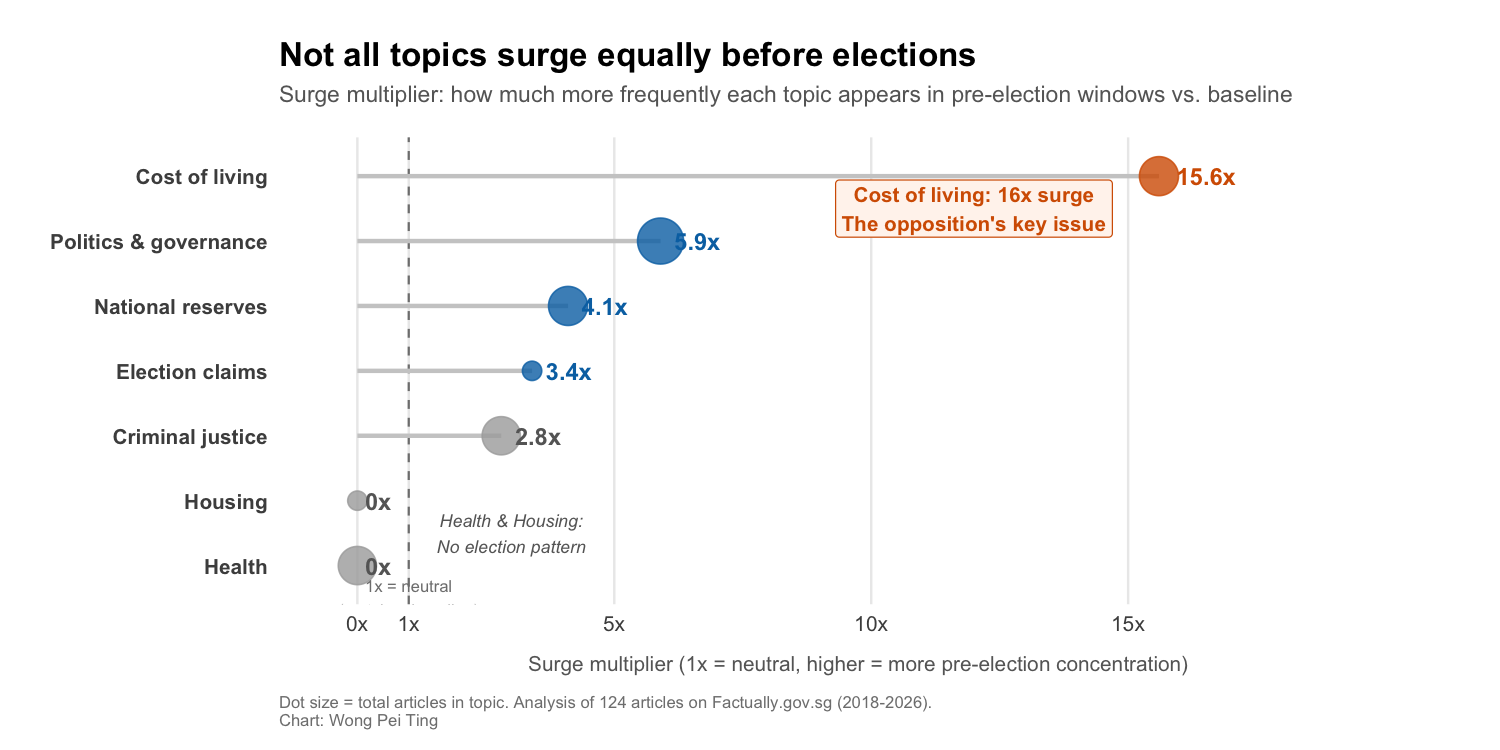

In [ ]:
%%R -w 10 -h 5 --units in -r 150
# ============================================================================
# SURGE MULTIPLIER DOT PLOT - selective targeting
# ============================================================================
# One dot per topic on a horizontal axis showing surge multiplier.
# 1x = neutral (matches baseline), >1x = over-represented before elections.
# Shows both the MAGNITUDE of surge and the SELECTIVITY across topics.
#
# Why this can work:
# - Immediately shows Cost of Living as the outlier
# - The spread from 0x to 16x shows selective targeting
# - Reference line at 1x gives clear benchmark

# Calculate surge multipliers
surge_data <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    n_total = n(),
    n_window = sum(before_ge),
    n_baseline = sum(!before_ge),
    .groups = "drop"
  ) %>%
  mutate(
    surge = ifelse(n_baseline > 0 & n_window > 0,
                   round((n_window / before_days) / (n_baseline / baseline_days), 1),
                   0)
  ) %>%
  arrange(surge)

# Order by surge
surge_data$new_topic_merged <- factor(surge_data$new_topic_merged, 
                                       levels = surge_data$new_topic_merged)

# Colors based on surge level
surge_data <- surge_data %>%
  mutate(
    color_group = case_when(
      surge >= 10 ~ "high",
      surge >= 3 ~ "medium",
      TRUE ~ "low"
    )
  )

ggplot(surge_data, aes(x = surge, y = new_topic_merged)) +
  # Reference line at 1x (neutral)
  geom_vline(xintercept = 1, linetype = "dashed", color = "grey50", linewidth = 0.5) +
  
  # Connecting line from 0 to dot
  geom_segment(aes(x = 0, xend = surge, yend = new_topic_merged),
               color = "grey80", linewidth = 1) +
  
  # The dots
  geom_point(aes(color = color_group, size = n_total), alpha = 0.8) +
  
  # Labels showing the surge multiplier
  geom_text(aes(label = paste0(surge, "x")),
            hjust = -0.3, size = 4, fontface = "bold",
            color = ifelse(surge_data$surge >= 10, "#D55E00", 
                          ifelse(surge_data$surge >= 3, "#0072B2", "#666666"))) +
  
  # Annotation for neutral line
  annotate("text", x = 1, y = 0.5, label = "1x = neutral\n(matches baseline)", 
           size = 2.8, color = "grey50", hjust = 0.5) +
  
  # KEY ANNOTATION for Cost of Living
  annotate("label",
           x = 12, y = 6.5,
           label = "Cost of living: 16x surge\nThe opposition's key issue",
           size = 3.5, fontface = "bold",
           fill = "#FFF5EE", label.size = 0, color = "#D55E00") +
  
  # Annotation for zero-surge topics
  annotate("text",
           x = 3, y = 1.5,
           label = "Health & Housing:\nNo election pattern",
           size = 3, color = "#666666", fontface = "italic") +
  
  scale_color_manual(
    values = c("high" = "#D55E00", "medium" = "#0072B2", "low" = "#AAAAAA"),
    guide = "none"
  ) +
  scale_size_continuous(range = c(4, 10), guide = "none") +
  scale_x_continuous(
    limits = c(-0.5, 20),
    breaks = c(0, 1, 5, 10, 15),
    labels = c("0x", "1x", "5x", "10x", "15x")
  ) +
  scale_y_discrete(
    labels = c(
      "Cost of Living" = "Cost of living",
      "Politics & Governance" = "Politics & governance",
      "National Reserves" = "National reserves",
      "Election Claims" = "Election claims",
      "Criminal Justice" = "Criminal justice",
      "Health" = "Health",
      "Housing" = "Housing"
    )
  ) +
  
  labs(
    title = "Not all topics surge equally before elections",
    subtitle = "Surge multiplier: how much more frequently each topic appears in pre-election windows vs. baseline",
    x = "Surge multiplier (1x = neutral, higher = more pre-election concentration)",
    y = "",
    caption = "Dot size = total articles in topic. Analysis of 124 articles on Factually.gov.sg (2018-2026).\nChart: Wong Pei Ting"
  ) +
  
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 16),
    plot.subtitle = element_text(color = "grey40", size = 11, margin = margin(b = 15)),
    axis.text.y = element_text(size = 10, face = "bold"),
    axis.text.x = element_text(size = 10),
    axis.title.x = element_text(size = 10, color = "grey40", margin = margin(t = 10)),
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    plot.margin = margin(20, 30, 10, 10),
    plot.caption = element_text(size = 8, color = "grey50", hjust = 0, margin = margin(t = 10))
  )

# This option works because:
# - Shows both the MAGNITUDE (Cost of Living at 16x) and SELECTIVITY (0x to 16x range)
# - The reference line at 1x makes interpretation easy
# - Visual spread from left to right tells the story of selective targeting

### Distance-to-election curve

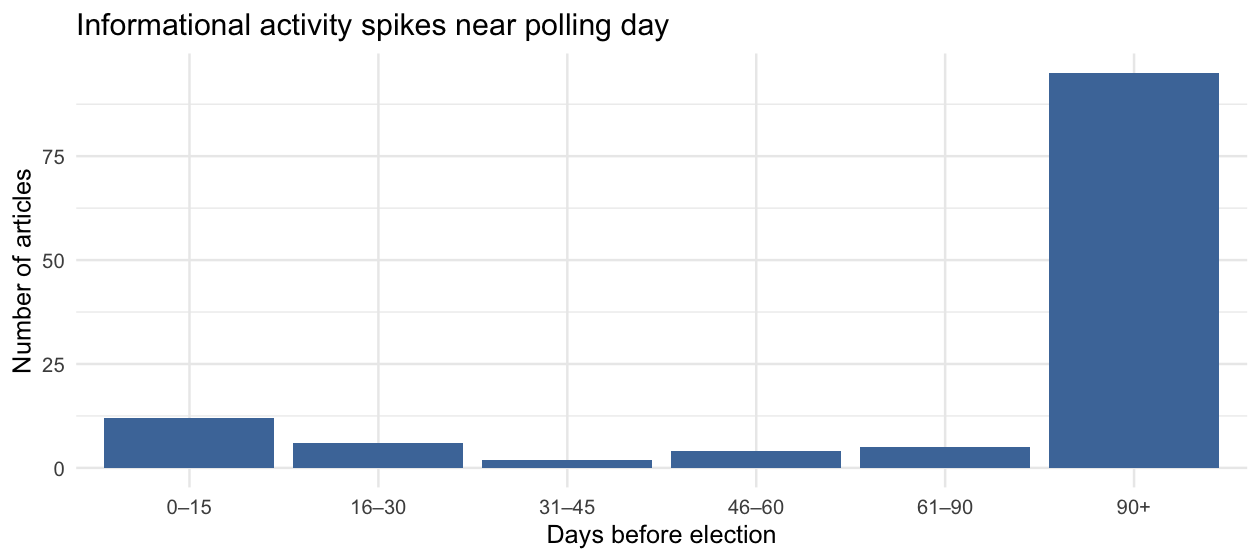

In [53]:
%%R -w 9 -h 4 --units in -r 140

library(tidyverse)

df_curve <- df %>%
  mutate(
    date = as.Date(date),

    # distance to the closest election
    days_to_election = pmin(
      abs(as.numeric(ge2020 - date)),
      abs(as.numeric(ge2025 - date))
    ),

    # bucket into simple intervals
    bucket = case_when(
      days_to_election <= 15  ~ "0–15",
      days_to_election <= 30  ~ "16–30",
      days_to_election <= 45  ~ "31–45",
      days_to_election <= 60  ~ "46–60",
      days_to_election <= 90  ~ "61–90",
      TRUE ~ "90+"
    )
  )

df_curve %>%
  count(bucket) %>%
  mutate(bucket = factor(bucket, levels = c("0–15","16–30","31–45","46–60","61–90","90+"))) %>%
  ggplot(aes(bucket, n)) +
  geom_col(fill = "#4c78a8") +
  labs(
    title = "Informational activity spikes near polling day",
    x = "Days before election",
    y = "Number of articles"
  ) +
  theme_minimal(base_size = 13)


In [54]:
%%R # FINDING OUT THE LIFT FOR NON-POFMA RELATED EXPLAINERS IN THE PRE-ELECTION WINDOW

# 1) Define your pre-election window (set this once and keep it fixed)
window_days <- 60

df <- df %>%
  mutate(
    date = as.Date(date),
    # pre-election flag
    before_ge = (date >= ge2020 - window_days & date < ge2020) |
                (date >= ge2025 - window_days & date < ge2025),
    # define "these releases" = explainers/clarifications without a POFMA order
    explainer_no_order = (pofma_ed == "No")
  )

# 2) Baseline share of days that are "pre-election"
total_days  <- as.numeric(max(df$date, na.rm = TRUE) - min(df$date, na.rm = TRUE))
before_days <- window_days * 2
baseline    <- before_days / total_days

# 3) Observed share: among explainer_no_order releases, what fraction are pre-election?
observed_share <- df %>%
  filter(explainer_no_order) %>%
  summarise(before_rate = mean(before_ge)) %>%
  pull(before_rate)

# 4) Lift = "how much more concentrated than expected"
lift <- observed_share / baseline
lift

# The 6.7× figure uses a proportion-based calculation
# Lift shows how much more concentrated explainers are in pre-election windows.


[1] 6.698718


The rate-based surge multiplier for non-POFMA articles is 9.2× surge.
                                
  Breakdown:                                                                                                         
  - Pre-election windows: 11 articles / 120 days = 1 article every 10.9 days                                         
  - Baseline period: 28 articles / 2,816 days = 1 article every 100.6 days                                           
  - Surge: 9.2 times more frequent  

# Calculating surge

In [ ]:
%%R
# ============================================================================
# COMPUTED SURGE TABLE - Rate-based calculation with full breakdown
# ============================================================================
# Rate-based surge = (articles/day in windows) / (articles/day in baseline)
#
# Formula:
# Surge Multiplier = (Articles in windows / 120 days) / (Articles in baseline / 2,816 days)

computed_surge <- df %>%
  group_by(new_topic_merged) %>%
  summarise(
    total = n(),
    in_window = sum(before_ge),
    in_baseline = sum(!before_ge),
    .groups = "drop"
  ) %>%
  mutate(
    # Rate-based calculation
    rate_window = in_window / before_days,
    rate_baseline = in_baseline / baseline_days,
    surge = ifelse(rate_baseline > 0, round(rate_window / rate_baseline, 1), 0),
    
    # Format for display
    breakdown = paste0(total, " total: ", in_window, " windows, ", in_baseline, " baseline")
  ) %>%
  arrange(desc(surge)) %>%
  transmute(
    Topic = new_topic_merged,
    `Surge` = paste0(surge, "x"),
    `Articles` = breakdown
  )

cat("=== RATE-BASED SURGE MULTIPLIERS ===\n\n")
cat("Formula: (Articles per day in windows) / (Articles per day in baseline)\n")
cat("Window days:", before_days, "(2 elections x 60 days)\n")
cat("Baseline days:", baseline_days, "\n\n")

print(computed_surge)

cat("\n--- Timeline Breakdown ---\n")
cat("Period 1 (pre-GE2020): Jan 26, 2018 to May 10, 2020\n")
cat("Period 2 (between elections): Jul 11, 2020 to Mar 3, 2025\n")
cat("Period 3 (post-GE2025): May 4, 2025 to Feb 9, 2026\n")
cat("Total baseline days:", baseline_days, "(", round(baseline_days/total_days*100, 1), "% of timeline)\n")

# INTERPRETATION:
# These rate-based surges show how much MORE FREQUENTLY articles are published during pre-election windows compared to normal periods.
# Example: "15.6x" means Cost of Living articles appear 15.6 times more often during the 120 pre-election days compared to the 2,816 baseline days.

=== RATE-BASED SURGE MULTIPLIERS ===

Formula: (Articles per day in windows) / (Articles per day in baseline)
Window days: 120 (2 elections x 60 days)
Baseline days: 2816 

# A tibble: 7 × 3
  Topic                 Surge Articles                        
  <fct>                 <chr> <chr>                           
1 Cost of Living        15.6x 20 total: 8 windows, 12 baseline
2 Politics & Governance 5.9x  30 total: 6 windows, 24 baseline
3 National Reserves     4.1x  20 total: 3 windows, 17 baseline
4 Election Claims       3.4x  8 total: 1 windows, 7 baseline  
5 Criminal Justice      2.8x  19 total: 2 windows, 17 baseline
6 Health                0x    19 total: 0 windows, 19 baseline
7 Housing               0x    8 total: 0 windows, 8 baseline  

--- Timeline Breakdown ---
Period 1 (pre-GE2020): Jan 26, 2018 to May 10, 2020
Period 2 (between elections): Jul 11, 2020 to Mar 3, 2025
Period 3 (post-GE2025): May 4, 2025 to Feb 9, 2026
Total baseline days: 2816 ( 98.8 % of timeline)
